In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from scipy.optimize import curve_fit
from scipy import ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

# Different order SZ spectrum with cluster parameters : T_e = 5 keV, tau = 0.01 and peculiar velocity  = 300 km/s

In [415]:

h = 6.62 * 1e-27  # in  cm^2 g s^-1
k = 1.38 * 1e-16  # in erg K^−1
c = 2.99 * 1e10  # in cm s^-1
t_cmb = 2.72  # in K
t_e = 5 # in keV
tau = 0.01
mu = 0.7 # mu = cos (theta)
v = 0.001 # peculiar velocity = 300km/s / c

# computing y parameter
y = (t_e/511) * tau

print("y_value =",y)

y_value = 9.784735812133073e-05


In [416]:
h = 6.62 * 1e-27  # in  cm^2 g s^-1
k = 1.38 * 1e-16  # in erg K^−1
c = 2.99 * 1e10  # in cm s^-1
t_cmb = 2.72  # in K
t_e = 5 # in keV
tau = 0.01
mu = 0.7 # mu = cos (theta)
v = 0.001 # peculiar velocity = 300km/s / c

nu_planck = np.array([100.0, 143.0, 217.0, 353.0, 545.0, 857.0])  # Planck HFI frequencies
nu_CORE = np.array([70, 90, 145, 220, 340, 450, 600]) # CORE frequencies
nu_cmbs4 = np.array([93, 145, 225, 280]) # CMBS4 frequencies

def calculate_kSZ_SED(nu):
    
    I_o = 270.33
    ksz_SED = []
    
    for i in range(len(nu)):
        
        x = (h * nu[i] * 1e9 )/(k * t_cmb)
        spec = -(I_o * (np.power(x,4) * np.exp(x))/((np.exp(x) - 1) ** 2) * v * mu * tau)
        ksz_SED.append(spec)
        
    return ksz_SED

kSZ_spec_cmbs4 = calculate_kSZ_SED(nu_cmbs4)

def calculate_tSZ_SED(nu):
    
    tSED = []
    
    for i in range(len(nu)):
        
        x = (h * nu[i] * 1e9 )/(k * t_cmb)
        F = x * (1 / np.tanh(x / 2))
        spec = (-4 + F) 
        tSED.append(spec)
        
    return tSED

tSZ_spec_planck = calculate_tSZ_SED(nu_planck)
tSZ_spec_CORE = calculate_tSZ_SED(nu_CORE)
tSZ_spec_cmbs4 = calculate_tSZ_SED(nu_cmbs4)

print("tSZ_SED_planck  =",tSZ_spec_planck,'\n')
print("tSZ_SED_CORE = ",tSZ_spec_CORE,'\n')
print("tSZ_SED_CMBS4 = ", tSZ_spec_cmbs4,'\n')

def calculate_rksz_SED(nu):
    
    rkSZSED = []
    
    for i in range(len(nu)):
        
        x = (h * nu[i] * 1e9)/(k * t_cmb)
        F = x * (1 / np.tanh(x / 2))
        spec = (-1 - mu ** 2 + ( (3 + 11 * mu ** 2) / (20)) * F) 
        rkSZSED.append(spec)
        
    return rkSZSED

rkSZ_spec_planck = calculate_rksz_SED(nu_planck)
rkSZ_spec_CORE = calculate_rksz_SED(nu_CORE)
rkSZ_spec_cmbs4 = calculate_rksz_SED(nu_cmbs4)

print("rkSZ_SED_planck  = ",rkSZ_spec_planck, '\n')
print("rkSZ_SED_CORE = ", rkSZ_spec_CORE, '\n')
print("rkSZ_SED_CMBS4 = ", rkSZ_spec_cmbs4, '\n')

def calculate_tkSZ_SED(nu):
     
    tkSZSED = []
    
    for i in range(len(nu)):
        
        x = (h * nu[i] *1e9 )/(k * t_cmb)
        F = x * (1 / np.tanh(x / 2))
        G = x / np.sinh(x / 2)
        spec =  (10 - 9.4 * F + 0.7 * ( 2 * np.power(F, 2) + np.power(G, 2)) ) 
        tkSZSED.append(spec)
        
    return tkSZSED

tkSZ_spec_planck = calculate_tkSZ_SED(nu_planck)
tkSZ_spec_CORE = calculate_tkSZ_SED(nu_CORE)
tkSZ_spec_cmbs4 = calculate_tkSZ_SED(nu_cmbs4)

print("tkSZ_SED_planck  = ",tkSZ_spec_planck, '\n') 
print("tkSZ_SED_CORE  = ",tkSZ_spec_CORE, '\n')
print("tkSZ_SED_CMBS4 = ", tkSZ_spec_cmbs4, '\n')


def calculate_rtsz_SED(nu):
    
    rtSZSED = []
    
    for i in range(len(nu)):
        
        x = (h * nu[i] * 1e9)/(k * t_cmb)
        F = x * (1 / np.tanh(x / 2))
        G = x / np.sinh(x / 2)
        spec = (-10 + 23.5 * F - 8.4 * np.power(F, 2) + 0.7 * np.power(F, 3) + 1.4 * np.power(G, 2) * (-3 + F)) 
        rtSZSED.append(spec)
        
    return rtSZSED

rtSZ_spec_planck = calculate_rtsz_SED(nu_planck)
rtSZ_spec_CORE = calculate_rtsz_SED(nu_CORE)
rtSZ_spec_cmbs4 = calculate_rtsz_SED(nu_cmbs4)

print("rtSZ_SED_planck  = ", rtSZ_spec_planck, '\n')
print("rtSZ_SED_CORE = ", rtSZ_spec_CORE, '\n')
print("rtSZ_SED_CMBS4 = ", rtSZ_spec_cmbs4, '\n')



tSZ_SED_planck  = [-1.5066230806146135, -1.0376059260138728, -0.0025390368924740336, 2.2503279961409683, 5.613126058699526, 11.114405093184613] 

tSZ_SED_CORE =  [-1.7522087681986758, -1.5967295456881212, -1.0129507508478115, 0.043636947647115676, 2.026286184879874, 3.9420575826200643, 6.582378423119982] 

tSZ_SED_CMBS4 =  [-1.5705287737955254, -1.0129507508478115, 0.12114049240971259, 1.0094931120319508] 

rkSZ_SED_planck  =  [-0.44402838231783015, -0.24727568596281957, 0.1869348740236072, 1.1320125943811365, 2.542706381624451, 4.850492936590946] 

rkSZ_SED_CORE =  [-0.5470515782593444, -0.48182804441616667, -0.23693283998065673, 0.2063056995379653, 1.0380270545571075, 1.8416931559091172, 2.949307748498833] 

rkSZ_SED_CMBS4 =  [-0.4708368206072229, -0.23693283998065673, 0.23881843656587454, 0.6114823604974038] 

tkSZ_SED_planck  =  [-2.559492095866309, -3.8697274967439252, -4.271457767738099, 6.155674043624224, 49.0310012282287, 187.74810449151877] 

tkSZ_SED_CORE  =  [-1.585726617041

# Different spectral distortion terms plotted with dimensionless frequency

<ipython-input-417-03d7b0dac55e>:12: RuntimeWarning: invalid value encountered in true_divide
  h_x = (np.power(x,4) * np.exp(x))/((np.exp(x) - 1) ** 2)
<ipython-input-417-03d7b0dac55e>:13: RuntimeWarning: divide by zero encountered in true_divide
  F = x * (1 / np.tanh(x / 2))
<ipython-input-417-03d7b0dac55e>:13: RuntimeWarning: invalid value encountered in multiply
  F = x * (1 / np.tanh(x / 2))
<ipython-input-417-03d7b0dac55e>:14: RuntimeWarning: invalid value encountered in true_divide
  G = x / np.sinh(x / 2)


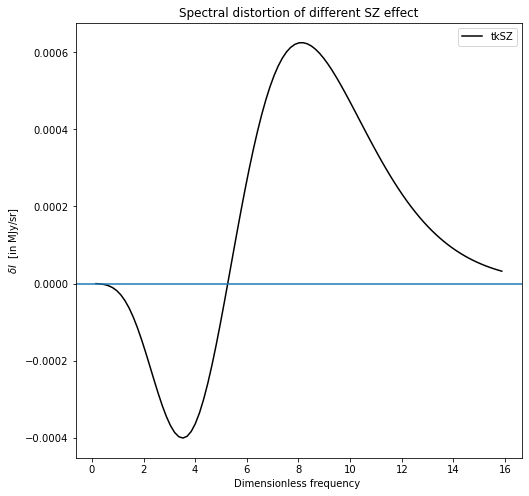

In [417]:
h = 6.62 * 1e-27  # in  cm^2 g s^-1
k = 1.38 * 1e-16  # in erg K^−1
c = 2.99 * 1e10  # in cm s^-1
t_cmb = 2.72  # in K
t_e = 5 # in keV
tau = 1e-2
mu = 0.7 # mu = cos (theta)
v = 0.001 # peculiar velocity in km/s / c

nu =  np.linspace(0,900,100) # frequency input
x = (h * nu * 1e9)/(k * t_cmb)# dimensionless frequency
h_x = (np.power(x,4) * np.exp(x))/((np.exp(x) - 1) ** 2)
F = x * (1 / np.tanh(x / 2))
G = x / np.sinh(x / 2)
theta_e = t_e / 511 #kT_e/m_e c^2
I_o = 270.33 # I_o = 2 (kT_CMB)^3/(hc)^2 = 270.33 MJy/sr
factor = tau * I_o * h_x 

def ksz():
    return factor * v * mu

def tsz():
    return factor * theta_e * (-4 + F)

def rksz():
    return factor  * v ** 2 * (-1 - mu ** 2 + ( (3 + 11 * mu ** 2) / (20)) * F)

def tksz():
    return factor * v * theta_e * mu * (10 - 9.4 * F + 0.7 * ( 2 * np.power(F, 2) + np.power(G, 2)))

def rtsz():
    return factor * theta_e ** 2 * (-10 + 23.5 * F - 8.4 * np.power(F, 2) + 0.7 * np.power(F, 3) + 1.4 * np.power(G, 2) * (-3 + F))

y_1 = ksz() #* 1e1
y_2 = tsz() 
y_3 = rksz() #* 1e3
y_4 = tksz() #* 1e2
y_5 = rtsz() 

plt.rcParams['figure.figsize'] = [8,8]
#plt.plot(x, y_1, "r-", label = "kSZ") 
# plt.plot(x, y_2, "g-", label = "tSZ" )
# plt.plot(x, y_3, "y-", label = "rkSZ")
plt.plot(x, y_4, "k-", label = "tkSZ")
# plt.plot(x, y_5, "c-", label = "rtSZ")
plt.axhline(0.0)
#plt.xlim(0,17)
plt.legend()
plt.title("Spectral distortion of different SZ effect")
plt.xlabel("Dimensionless frequency ")
plt.ylabel("$\delta I$  [in MJy/sr]")
plt.savefig("/users/kmukherjee/Masters_thesis/Codes_jupyter_notebook/Plots", dpi = 300)

# CMB temperature map from TT power spectrum

In [2]:
ell, DlTT = np.loadtxt("CAMB_fiducial_cosmo_scalCls.txt", usecols=(0, 1), unpack=True) 


#Setting size of the map

N = 256      # number of pixels in a linear dimension
            
pix_size  = 0.25 # size of a pixel in arcminutes

## Setting up the map plots

c_min = -400              # minimum for color bar
c_max = 400               # maximum for color bar
X_width = N * pix_size/60.  # horizontal map width in degrees
Y_width = N * pix_size/60.  # vertical map width in degrees

In [6]:
def make_CMB_T_map(N,pix_size,ell,DlTT):  # makes a realization of a simulated CMB sky map given an input D_l(TT) as a function of l
     
# convert D_l to C_l       
    ClTT = (DlTT * 2 * np.pi) / (ell * (ell + 1)) 
    ClTT[0] = 0.                          # set the monopole and the dipole of the C_l spectrum to zero
    ClTT[1] = 0.
   
    
# make a 2D real space coordinate system

    onesvec = np.ones(N)
    inds  = (np.arange(N) + .5 - N/2.) / (N-1.) # create an array of size N between -0.5 and +0.5
   
# compute the outer product matrix: X[i, j] = onesvec[i] * inds[j] for i,j 
# in range(N), which is just N rows copies of inds - for the x dimension
    X = np.outer(onesvec,inds) 

# compute the transpose for the y dimension
    Y = np.transpose(X)

# radial component 
    R = np.sqrt( X**2. + Y**2.)
   

# 2D CMB power spectrum

    pix_to_rad = (pix_size/60. * np.pi/180.) 
    ell_scale_factor = 2. * np.pi /pix_to_rad 
    ell2d = R * ell_scale_factor            # making a fourier space analogue to the real space R vector
    ClTT_expanded = np.zeros(int(ell2d.max())+1) 
    ClTT_expanded[0:(ClTT.size)] = ClTT     # fill in the Cls until the max of the ClTT vector

# the 2D Cl spectrum is defined on the multiple vector set by the pixel scale
    CLTT2d = ClTT_expanded[ell2d.astype(int)] 
#plt.imshow(np.log(CLTT2d))

#realization of the CMB with the given power spectrum in real space
    random_array_for_T = np.random.normal(0,1,(N,N))
    FT_random_array_for_T = np.fft.fft2(random_array_for_T)   # take FFT since we are in Fourier space 
    FT_2d = np.sqrt(CLTT2d) * FT_random_array_for_T 

# move back from ell space to real space
    CMB_T = np.fft.ifft2(np.fft.fftshift(FT_2d))

# move back to pixel space for the map
    CMB_T = CMB_T/(pix_size /60.* np.pi/180.)
    
# only plot the real component
    CMB_T = np.real(CMB_T)

    return(CMB_T)


In [4]:

def plot_map(x,y,map_title,map_plot,cbar_label):
    
    plt.gcf().set_size_inches(x,y)

    plt.title(map_title)
    image = plt.imshow(map_plot, cmap = 'jet', origin = 'lower')
    plt.colorbar(label=cbar_label)
    image.set_extent([0,X_width,0,Y_width])
    plt.ylabel('angle $[^\circ]$')
    plt.xlabel('angle $[^\circ]$') 
    

In [5]:
# make a CMB T map

cmb_temp_map = make_CMB_T_map(N,pix_size,ell,DlTT)

print("Variance of CMB temp map = ",np.var(cmb_temp_map),'\n')


Variance of CMB temp map =  8915.777636029965 



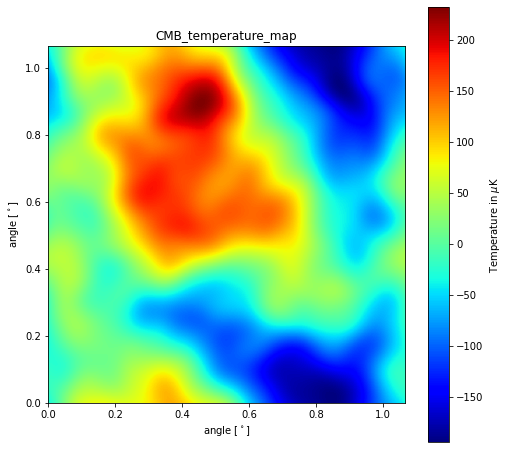

In [7]:
plot_map(8,8,"CMB_temperature_map",cmb_temp_map,"Temperature in $\mu$K")

# Polyfitting CMB Map

In [423]:
def poly_filtering(input_map, order, N):

    y = input_map.flatten()
    #cmb_shape = y.shape[0]
    x = np.linspace(0,y.shape[0],y.shape[0])



    fit = np.polyfit(x,y,order)
    coef_a = fit[0]
    coef_b = fit[1]
    coef_c = fit[2]

    fit_eqn = coef_a * np.square(x) + coef_b * x + coef_c
    
    filtered_map = input_map - fit_eqn.reshape(N,N)
    
    return filtered_map

In [13]:
y = cmb_temp_map.flatten()
    #cmb_shape = y.shape[0]
x = np.linspace(0,y.shape[0],y.shape[0]).reshape(N,N)




fit = np.polyfit(x,y,2)
coef_a = fit[0]
coef_b = fit[1]    
coef_c = fit[2]
fit_eqn = coef_a * np.square(x) + coef_b * x + coef_c
    
# filtered_map = cmb_temp_map - fit_eqn.reshape(N,N)
# plt.plot(y[:10],'-o') 
# plt.plot([:10])

TypeError: expected 1D vector for x

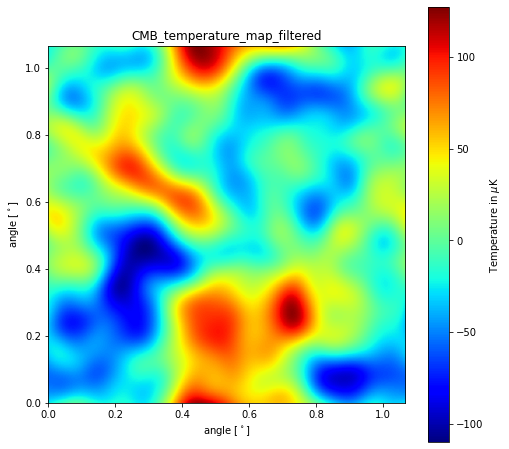

In [424]:
def cmb_poly_filtering(cmb_map, order, N):

    y = cmb_map.flatten()
    #cmb_shape = y.shape[0]
    x = np.linspace(0,y.shape[0],y.shape[0])



    fit = np.polyfit(x,y,order)
    coef_a = fit[0]
    coef_b = fit[1]
    coef_c = fit[2]

    fit_eqn = coef_a * np.square(x) + coef_b * x + coef_c
    
    filtered_map = cmb_map - fit_eqn.reshape(N,N)
    
    return filtered_map

cmb_map_filtered = cmb_poly_filtering(cmb_temp_map, 2, N)

plot_map(8,8,"CMB_temperature_map_filtered",cmb_map_filtered,"Temperature in $\mu$K")

(4, 256, 256)


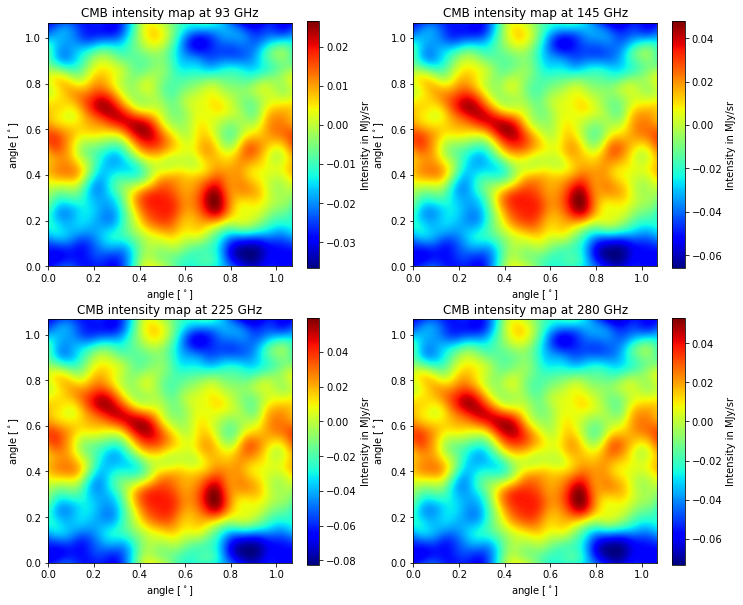

In [425]:
# CMB maps in intensity unit

def calculate_cmb_I_maps(nu, cmb_temp_map):
    
    I_o = 270.33 # I_o = 2 (kT_CMB)^3/(hc)^2 = 270.33 MJy/sr
    cmb_I_maps =[]
    
    for i in range(len(nu)):
        
        x = (h * nu[i] * 1e9)/(k * t_cmb)# dimensionless frequency
        h_x = (np.power(x,4) * np.exp(x))/((np.exp(x) - 1) ** 2)
        
        #cmb_temp_map =  make_CMB_T_map(N,0.25,ell,DlTT)
        cmb_I_map = (I_o * h_x * cmb_temp_map) / (t_cmb * 1e6 )
        cmb_I_maps.append(cmb_I_map)
        
    return cmb_I_maps

cmb_I_maps_cmbs4 = calculate_cmb_I_maps(nu_cmbs4, cmb_temp_map)
print(np.array(cmb_I_maps_cmbs4).shape)

for i in range(len(nu_cmbs4)):
    
    plt.subplot(2, 2, i + 1)
    plot_map(12,10,f"CMB intensity map at {str(nu_cmbs4[i])} GHz",
             cmb_I_maps_cmbs4[i],"Intensity in MJy/sr")
plt.show()



# White noise map

In [426]:
noises_planck = np.array([7.73, 3.34, 4.65, 15.6, 80.6, 1920]) # reduced by factor of 10
fwhm_planck = np.array([9.68, 7.30, 5.02, 4.94, 4.83, 4.64])

noises_CORE = np.array([7.1, 5.1, 3.6, 3.8, 11.1, 45.9, 358.3])
fwhm_CORE = np.array([15.39, 12.08, 7.68, 5.23, 3.49, 2.65, 1.98])

noises_cmbs4 = np.array([1.5, 1.5, 4.8, 11.5])
fwhm_cmbs4 = np.array([2.2, 1.4, 1.0, 0.9])

63.96445029908611 

63.964530767019006 



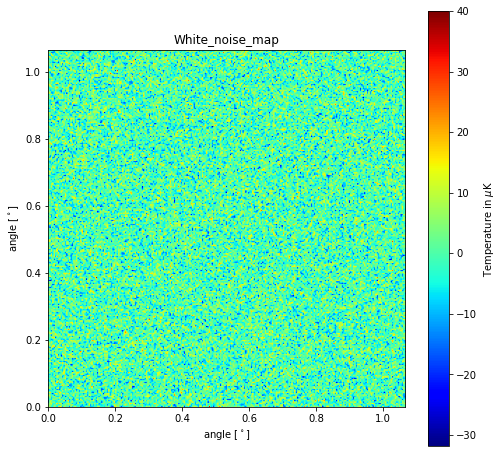

In [427]:
noise = 2 #7.73, 3.34, 4.65, 15.6, 80.6, 1920 in muK arcmin

def create_noise_map(N,noise,pix_size):
    
    mu = 0 
    #sigma = noise / pix_size
    gaussian_random_noise_generation = mu + np.random.randn(N,N) * noise /pix_size
    #gaussian_random_noise = np.random.normal(0,1,(N,N)) * (noise/pix_size) # generates Gausssian random variables    
    #np.random.randn(npix,npix)*(sigma_noise/pixel_size)
    return gaussian_random_noise_generation

Noise_Map = create_noise_map(N,noise ,0.25) 

print(np.var(Noise_Map),'\n')
print(np.mean(Noise_Map ** 2),'\n')

#plt.plot(Noise_Map[200,:])

plot_white_noise_map = plot_map(8,8,"White_noise_map",Noise_Map,"Temperature in $\mu$K")

In [428]:
#Noise maps in Intensity unit

def calculate_noise_I_maps(nu, noise):
    
    I_o = 270.33 # I_o = 2 (kT_CMB)^3/(hc)^2 = 270.33 MJy/sr
    noise_I_maps =[]
    
    for i in range(len(nu)):
        
        x = (h * nu[i] * 1e9)/(k * t_cmb)# dimensionless frequency
        h_x = (np.power(x,4) * np.exp(x))/((np.exp(x) - 1) ** 2)
        
        noise_I_map = (I_o * h_x *  create_noise_map(N,noise[i] ,0.25))/(t_cmb*1e6)
        noise_I_maps.append(noise_I_map)
        
    return noise_I_maps

#noise_I_maps_cmbs4 = calculate_noise_I_maps(nu_cmbs4, noises_cmbs4)

#print(np.array(noise_I_maps_cmbs4).shape)


# Simulated y signal map from isothermal beta model

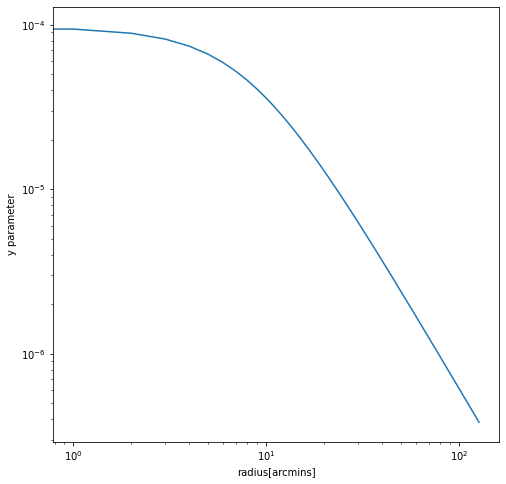

In [429]:
SZ_beta = 1
SZ_Theta_core = 2.0

def beta_function(N,pix_size,SZ_beta,SZ_Theta_core):
    
    SZ_beta = 1
    SZ_Theta_core = 2.0
    y_0 = 9.8e-5
    
    N = int(N)
    ones = np.ones(N)
    inds = (np.arange(N) + .5 - N/2.) * pix_size
    X = np.outer(ones,inds)
    Y = np.transpose(X)
    R = np.sqrt(X ** 2. + Y ** 2.)
    
    beta_y = y_0 * (1 + ( R / SZ_Theta_core ) ** 2 ) ** ((1-3 * SZ_beta) / 2) 
    
    return(beta_y)
    
beta_map = beta_function(N, 0.25, 1, 2)


plt.plot(beta_map[N//2,N//2:])
plt.ylabel('y parameter')
plt.xlabel('radius[arcmins]')
plt.xscale('log')
plt.yscale('log')


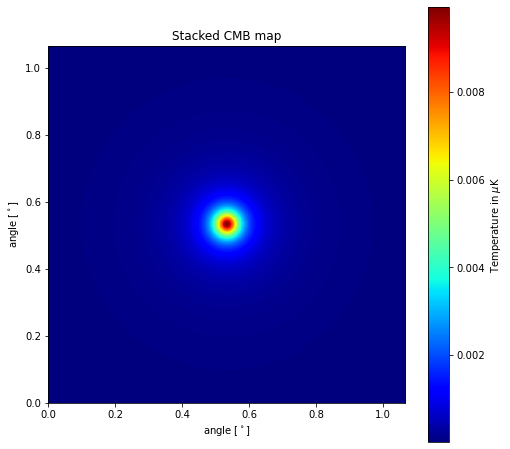

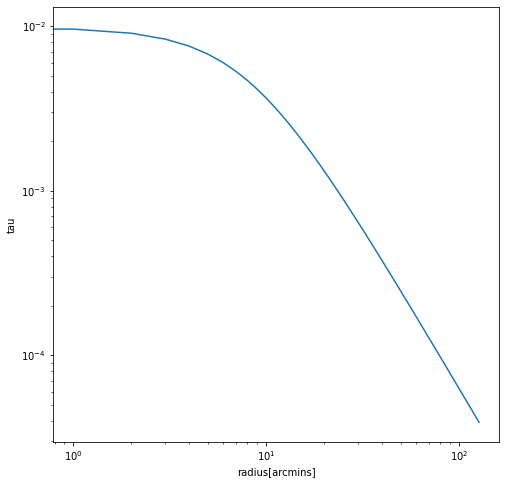

In [430]:
# tau map

tau_map = beta_map * (511/5)
plot_map(8,8,"Stacked CMB map",tau_map,"Temperature in $\mu$K")
plt.show()

plt.plot(tau_map[N//2,N//2:])

plt.ylabel('tau')
plt.xlabel('radius[arcmins]')
plt.xscale('log')
plt.yscale('log')

# All channel noise maps of Planck, CORE and CMBS4

In [431]:
noises_planck = np.array([7.73, 3.34, 4.65, 15.6, 80.6, 1920]) # reduced by factor of 10
fwhm_planck = np.array([9.68, 7.30, 5.02, 4.94, 4.83, 4.64])

noises_CORE = np.array([7.1, 5.1, 3.6, 3.8, 11.1, 45.9, 358.3])
fwhm_CORE = np.array([15.39, 12.08, 7.68, 5.23, 3.49, 2.65, 1.98])

noises_cmbs4 = np.array([1.5, 1.5, 4.8, 11.5])
fwhm_cmbs4 = np.array([2.2, 1.4, 1.0, 0.9])

In [432]:
def all_channel_noise_maps( N, pix_size, noises):

    all_noises = []

    for i in range(len(noises)):
        
        all_noise = create_noise_map(N, noises[i], pix_size)
        all_noises.append(all_noise)
      
    return all_noises

planck_noise_maps = all_channel_noise_maps( N, pix_size, noises_planck)
CORE_noise_maps = all_channel_noise_maps( N, pix_size, noises_CORE)
cmbs4_noise_maps = all_channel_noise_maps( N, pix_size, noises_cmbs4)

print(np.array(planck_noise_maps).shape,'\n')
print("Var of planck noises = ", np.var(planck_noise_maps),'\n')
print("Var of CORE noises = ", np.var(CORE_noise_maps),'\n')
print("Var of CMBS4 noises = ", np.var(cmbs4_noise_maps),'\n')

(6, 256, 256) 

Var of planck noises =  9823698.780410355 

Var of CORE noises =  300282.58418657834 

Var of CMBS4 noises =  637.3130772676611 



# Gaussian velocity distribution

In [433]:

def create_gaussian_vel(realisations, sd_vel):
    
    mu = 0 
    gaussian_vel_generation = mu + np.random.randn(realisations) * sd_vel
    
    return gaussian_vel_generation

realisations_1 = 500
realisations_2 = 1000
realisations_3 = 10000

gaussian_vel_1 = create_gaussian_vel(realisations_1,150)/(3*1e5)
gaussian_vel_2 = create_gaussian_vel(realisations_2,150)/(3*1e5)
gaussian_vel_3 = create_gaussian_vel(realisations_3,150)/(3*1e5)
#print("gaussian velocities = ",gaussian_vel,'\n')

abs_gaussian_vel_1 = np.absolute(gaussian_vel_1)
abs_gaussian_vel_2 = np.absolute(gaussian_vel_2)
abs_gaussian_vel_3 = np.absolute(gaussian_vel_3)
# #print("abs velocities = ", abs_gaussian_vel,'\n')

mean_gaussian_vel_1 = np.mean(abs_gaussian_vel_1)
mean_gaussian_vel_2 = np.mean(abs_gaussian_vel_2)
mean_gaussian_vel_3 = np.mean(abs_gaussian_vel_3)

print("mean 1 = ", mean_gaussian_vel_1,'\n')
print("mean 2 = ", mean_gaussian_vel_2,'\n')
print("mean 3 = ", mean_gaussian_vel_3,'\n')
# print(np.var(abs_gaussian_vel),'\n')
# print(abs_gaussian_vel)

# print("gaussian velocities = ",gaussian_vel[0:20],'\n')

# print("abs velocities = ", abs_gaussian_vel[0:20],'\n')

# print("mean = ", mean_gaussian_vel,'\n')



mean 1 =  0.0003857781105546348 

mean 2 =  0.00038427314269018456 

mean 3 =  0.00040386498453827 



# CMB temperature maps stacked

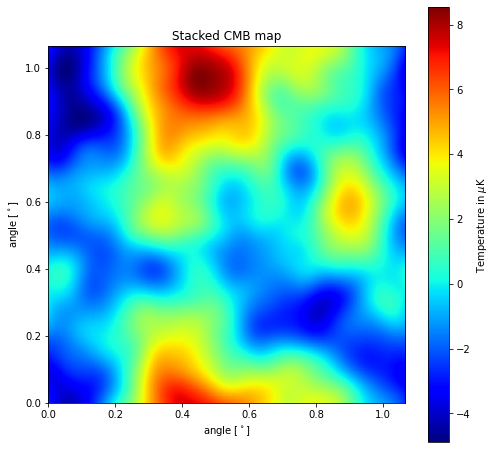

CPU times: user 1min 43s, sys: 1.95 s, total: 1min 45s
Wall time: 1min 45s


In [434]:
%%time

def cmb_stacking(no_realisations):
    
    cmb_maps = []

    for i in range(no_realisations):
    
         cmb_temp_map = make_CMB_T_map(N,pix_size,ell,DlTT)
         cmb_maps.append(cmb_temp_map)
    
    stacked_cmb = np.sum(cmb_maps, axis = 0)/no_realisations
    
    return stacked_cmb

realisations_1 = 500
realisations_2 = 1000
realisations_3 = 10000

stacked_cmb_maps_1 = cmb_stacking(realisations_1)
stacked_cmb_maps_2 = cmb_stacking(realisations_2)
stacked_cmb_maps_3 = cmb_stacking(realisations_3)
    
plot_map(8,8,"Stacked CMB map",stacked_cmb_maps_2,"Temperature in $\mu$K")
plt.show()

#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/stacked_cmb.png", dpi =150)


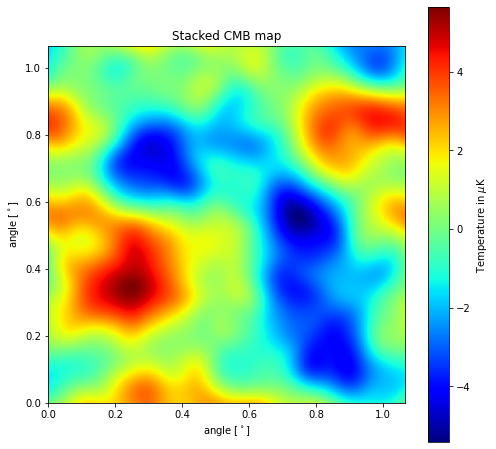

CPU times: user 3h 11min 42s, sys: 9min 27s, total: 3h 21min 10s
Wall time: 3min 10s


In [435]:
%%time

def cmb_filtered_stacking(no_realisations):
    
    cmb_maps = []

    for i in range(no_realisations):
    
         cmb_temp_map = make_CMB_T_map(N,pix_size,ell,DlTT)
         cmb_map_filtered = cmb_poly_filtering(cmb_temp_map, 2, N)
         cmb_maps.append(cmb_map_filtered)
    
    stacked_cmb = np.sum(cmb_maps, axis = 0)/no_realisations
    
    return stacked_cmb

realisations_1 = 500
realisations_2 = 1000
realisations_3 = 10000

stacked_cmb_filtered_maps_1 = cmb_filtered_stacking(realisations_1)
stacked_cmb_filtered_maps_2 = cmb_filtered_stacking(realisations_2)
stacked_cmb_filtered_maps_3 = cmb_filtered_stacking(realisations_3)
    
plot_map(8,8,"Stacked CMB map",stacked_cmb_filtered_maps_2,"Temperature in $\mu$K")
plt.show()

#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/stacked_cmb.png", dpi =150)


In [436]:
# SD of CMB maps

sd_cmb_map = np.std(cmb_temp_map)
sd_cmb_map_1 = np.std(stacked_cmb_maps_1)
sd_cmb_map_2 = np.std(stacked_cmb_maps_2)
sd_cmb_map_3 = np.std(stacked_cmb_maps_3)

ratio_cmb_1 = sd_cmb_map/sd_cmb_map_1
ratio_cmb_2 = sd_cmb_map/sd_cmb_map_2
ratio_cmb_3 = sd_cmb_map/sd_cmb_map_3


print("SD of single realisation :",sd_cmb_map,'\n')
print("SD of 500 stackings:",sd_cmb_map_1,'\n')
print("SD of 1000 stackings:",sd_cmb_map_2,'\n')
print("SD of 10000 stackings:",sd_cmb_map_3,'\n')
print(ratio_cmb_1)
print(ratio_cmb_2)
print(ratio_cmb_3)

SD of single realisation : 60.98349513556168 

SD of 500 stackings: 4.0194536691774 

SD of 1000 stackings: 2.731863803755887 

SD of 10000 stackings: 0.9642171734004682 

15.172085600390124
22.32303640163865
63.24663863898368


In [437]:
# SD of CMB maps

sd_cmb_filtered_map = np.std(cmb_map_filtered)
sd_cmb_filtered_map_1 = np.std(stacked_cmb_filtered_maps_1)
sd_cmb_filtered_map_2 = np.std(stacked_cmb_filtered_maps_2)
sd_cmb_filtered_map_3 = np.std(stacked_cmb_filtered_maps_3)

ratio_filtered_cmb_1 = sd_cmb_map/sd_cmb_filtered_map_1
ratio_filtered_cmb_2 = sd_cmb_map/sd_cmb_filtered_map_2
ratio_filtered_cmb_3 = sd_cmb_map/sd_cmb_filtered_map_3


print("SD of single realisation :",sd_cmb_filtered_map,'\n')
print("SD of 500 stackings:",sd_cmb_filtered_map_1,'\n')
print("SD of 1000 stackings:",sd_cmb_filtered_map_2,'\n')
print("SD of 10000 stackings:",sd_cmb_filtered_map_3,'\n')
print(ratio_filtered_cmb_1)
print(ratio_filtered_cmb_2)
print(ratio_filtered_cmb_3)

SD of single realisation : 43.83016555295435 

SD of 500 stackings: 2.8509141865392587 

SD of 1000 stackings: 2.1902079104254826 

SD of 10000 stackings: 0.8777921807397346 

21.390856106261797
27.843701433675616
69.4737279206219


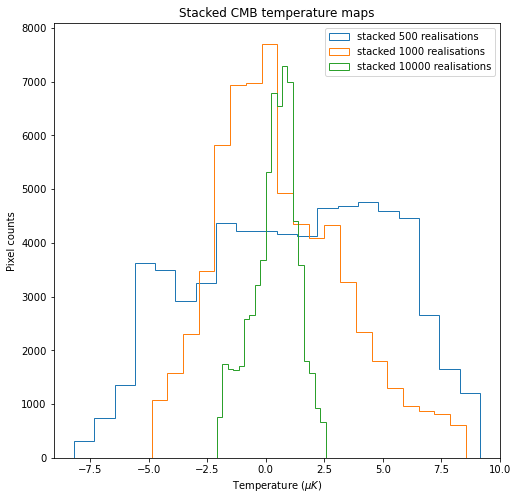

In [438]:
#plt.hist(cmb_temp_map.flatten())
plt.hist(stacked_cmb_maps_1.flatten(), bins = 20,  histtype = 'step', label = 'stacked 500 realisations')
plt.hist(stacked_cmb_maps_2.flatten(), bins = 20,  histtype = 'step', label = 'stacked 1000 realisations')
plt.hist(stacked_cmb_maps_3.flatten(), bins = 20,  histtype = 'step', label = 'stacked 10000 realisations')
plt.title("Stacked CMB temperature maps")
plt.xlabel("Temperature ($\mu K $)")
plt.ylabel("Pixel counts")
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_cmb.pdf", dpi =150)

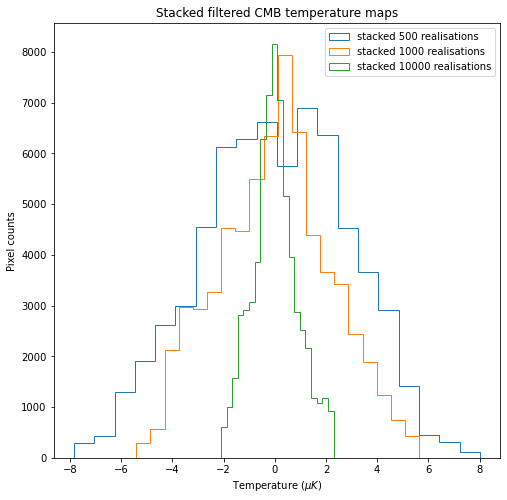

In [439]:
#plt.hist(cmb_temp_map.flatten())
plt.hist(stacked_cmb_filtered_maps_1.flatten(), bins = 20,  histtype = 'step', label = 'stacked 500 realisations')
plt.hist(stacked_cmb_filtered_maps_2.flatten(), bins = 20,  histtype = 'step', label = 'stacked 1000 realisations')
plt.hist(stacked_cmb_filtered_maps_3.flatten(), bins = 20,  histtype = 'step', label = 'stacked 10000 realisations')
plt.title("Stacked filtered CMB temperature maps")
plt.xlabel("Temperature ($\mu K $)")
plt.ylabel("Pixel counts")
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_filtered_cmb.pdf", dpi =150)

# Stacked noise maps

In [ ]:
%%time
def noise_map_stacking(no_realisations, noises):
    
    noise_maps = []

    for i in range(len(noises)):
        
        f_noise_maps = []
        
        for j in range(no_realisations):
        
             all_noise = create_noise_map(N, noises[i], pix_size)
             f_noise_maps.append(all_noise)
            
        noise_maps.append(f_noise_maps)
        
    stacked_noise_maps = []
        
    for k in range(len(noises)):
    
        stacked_noise_map = np.sum(noise_maps[k], axis = 0)/no_realisations
        stacked_noise_maps.append(stacked_noise_map)
    
    return stacked_noise_maps

no_realisations_1 = 500
no_realisations_2 = 1000
no_realisations_3 = 10000

#stacked_noise_maps_CORE =  noise_map_stacking(500, 1, noises_CORE)
stacked_noise_maps_cmbs4_1 =  noise_map_stacking(no_realisations_1, noises_cmbs4)
stacked_noise_maps_cmbs4_2 =  noise_map_stacking(no_realisations_2, noises_cmbs4)
stacked_noise_maps_cmbs4_3 =  noise_map_stacking(no_realisations_3, noises_cmbs4)

print(np.array(stacked_noise_maps_cmbs4_1).shape)

In [ ]:
sd_noise_map = np.std(cmbs4_noise_maps)
sd_noise_map_1 = np.std(stacked_noise_maps_cmbs4_1)
sd_noise_map_2 = np.std(stacked_noise_maps_cmbs4_2)
sd_noise_map_3 = np.std(stacked_noise_maps_cmbs4_3)

ratio_noise_1 = sd_noise_map/sd_noise_map_1
ratio_noise_2 = sd_noise_map/sd_noise_map_2
ratio_noise_3 = sd_noise_map/sd_noise_map_3


print("SD of single realisation :",sd_noise_map,'\n')
print("SD of 500 stackings:",sd_noise_map_1,'\n')
print("SD of 1000 stackings:",sd_noise_map_2,'\n')
print("SD of 10000 stackings:",sd_noise_map_3,'\n')
print(ratio_noise_1)
print(ratio_noise_2)
print(ratio_noise_3)

In [ ]:
plt.hist(np.array(stacked_noise_maps_cmbs4_1).flatten(), bins = 30,  histtype = 'step', label = 'stacked 500 realisations')
plt.hist(np.array(stacked_noise_maps_cmbs4_2).flatten(), bins = 30,  histtype = 'step', label = 'stacked 1000 realisations')
plt.hist(np.array(stacked_noise_maps_cmbs4_3).flatten(), bins = 30,  histtype = 'step', label = 'stacked 10000 realisations')
plt.title("Stacked instrumental noise maps")
plt.xlabel("Temperature ($\mu K $)")
plt.ylabel("Pixel counts")
plt.legend()

# Smoothing maps

# For smoothing each map to a common resolution

# $\sigma$ = $\frac{\sqrt{(FWHM_{\text{lowest freq channel}})^2 - (FWHM_{\text{other freq channel}}})^2}{\sqrt{8log2}  \times \text{pix size}}$

fwhm_CORE = (15.39, 12.08, 7.68, 5.23, 3.49, 2.65, 1.98) arcmins

# $\sigma_{\text{CORE}}$ = $\frac{\sqrt{15.39^2 - FWHM[i\neq 0]^2}}{\sqrt{8log2}  \times \text{pix size}}$

fwhm_cmbs4 = (2.2, 1.4, 1.0, 0.9) arcmins

# $\sigma_{\text{CMB S4}}$ = $\frac{\sqrt{2.2^2 - FWHM[i\neq 0]^2}}{\sqrt{8log2}  \times \text{pix size}}$

In [ ]:

def calculate_smoothed_maps( N, pix_size, fwhm_beam, total_maps):
    
    maps_smoothed = []

    for i in range(len(fwhm_beam)):
        
        sigma_beam = fwhm_beam[i] /(np.sqrt(8*np.log(2)))/pix_size
        
        map_smoothing = ndimage.gaussian_filter(total_maps[i], 
                    sigma = sigma_beam, order = 0, mode = 'reflect', truncate = 10)
        
        sigma_beam_cs = (np.sqrt(fwhm_beam[0]**2 - fwhm_beam[i]**2))/(np.sqrt(8*np.log(2)))/pix_size
        
        map_smoothing_cs = ndimage.gaussian_filter(map_smoothing, 
                    sigma = sigma_beam_cs, order = 0, mode = 'reflect', truncate = 10)
        
        maps_smoothed.append(map_smoothing_cs)
        
    return maps_smoothed

# Noise maps smoothed

In [ ]:

noise_map_smoothed_cmbs4 = calculate_smoothed_maps( N, pix_size, fwhm_cmbs4, 
                                                          cmbs4_noise_maps)
noise_maps_smoothed_cmbs4_1 = calculate_smoothed_maps( N, pix_size, fwhm_cmbs4, 
                                                          stacked_noise_maps_cmbs4_1)
noise_maps_smoothed_cmbs4_2 = calculate_smoothed_maps( N, pix_size, fwhm_cmbs4, 
                                                          stacked_noise_maps_cmbs4_2)
noise_maps_smoothed_cmbs4_3 = calculate_smoothed_maps( N, pix_size, fwhm_cmbs4, 
                                                          stacked_noise_maps_cmbs4_3)


In [ ]:
sd_noise_map_smoothed = np.std(noise_map_smoothed_cmbs4)
sd_noise_map_smoothed_1 = np.std(noise_maps_smoothed_cmbs4_1)
sd_noise_map_smoothed_2 = np.std(noise_maps_smoothed_cmbs4_2)
sd_noise_map_smoothed_3 = np.std(noise_maps_smoothed_cmbs4_3)

ratio_noise_smoothed_1 = sd_noise_map_smoothed/sd_noise_map_smoothed_1
ratio_noise_smoothed_2 = sd_noise_map_smoothed/sd_noise_map_smoothed_2
ratio_noise_smoothed_3 = sd_noise_map_smoothed/sd_noise_map_smoothed_3


print("SD of single realisation :",sd_noise_map_smoothed,'\n')
print("SD of 500 stackings:",sd_noise_map_smoothed_1,'\n')
print("SD of 1000 stackings:",sd_noise_map_smoothed_2,'\n')
print("SD of 10000 stackings:",sd_noise_map_smoothed_3,'\n')
print(ratio_noise_smoothed_1)
print(ratio_noise_smoothed_2)
print(ratio_noise_smoothed_3)


# CMB maps smoothed

In [ ]:
cmb_map_smoothed_cmbs4 = ndimage.gaussian_filter(cmb_temp_map, 
            sigma = 2.2/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)

cmb_maps_smoothed_cmbs4_1 = ndimage.gaussian_filter(stacked_cmb_maps_1, 
            sigma = 2.2/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)

cmb_maps_smoothed_cmbs4_2 = ndimage.gaussian_filter(stacked_cmb_maps_2, 
            sigma = 2.2/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)

cmb_maps_smoothed_cmbs4_3 = ndimage.gaussian_filter(stacked_cmb_maps_3, 
            sigma = 2.2/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)

print(cmb_maps_smoothed_cmbs4_1.shape)

In [ ]:
# Filtered CMB maps

cmb_filtered_map_smoothed_cmbs4 = ndimage.gaussian_filter(cmb_map_filtered, 
            sigma = 2.2/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)

cmb_filtered_maps_smoothed_cmbs4_1 = ndimage.gaussian_filter(stacked_cmb_filtered_maps_1, 
            sigma = 2.2/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)

cmb_filtered_maps_smoothed_cmbs4_2 = ndimage.gaussian_filter(stacked_cmb_filtered_maps_2, 
            sigma = 2.2/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)

cmb_filtered_maps_smoothed_cmbs4_3 = ndimage.gaussian_filter(stacked_cmb_filtered_maps_3, 
            sigma = 2.2/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)

print(cmb_filtered_maps_smoothed_cmbs4_1.shape)

In [ ]:
sd_cmb_map_smoothed = np.std(cmb_map_smoothed_cmbs4)
sd_cmb_map_smoothed_1 = np.std(cmb_maps_smoothed_cmbs4_1)
sd_cmb_map_smoothed_2 = np.std(cmb_maps_smoothed_cmbs4_2)
sd_cmb_map_smoothed_3 = np.std(cmb_maps_smoothed_cmbs4_3)

ratio_cmb_smoothed_1 = sd_cmb_map_smoothed/sd_cmb_map_smoothed_1
ratio_cmb_smoothed_2 = sd_cmb_map_smoothed/sd_cmb_map_smoothed_2
ratio_cmb_smoothed_3 = sd_cmb_map_smoothed/sd_cmb_map_smoothed_3


print("SD of single realisation :",sd_cmb_map_smoothed,'\n')
print("SD of 500 stackings:",sd_cmb_map_smoothed_1,'\n')
print("SD of 1000 stackings:",sd_cmb_map_smoothed_2,'\n')
print("SD of 10000 stackings:",sd_cmb_map_smoothed_3,'\n')
print(ratio_cmb_smoothed_1)
print(ratio_cmb_smoothed_2)
print(ratio_cmb_smoothed_3)

# Smoothing input maps

In [ ]:
tau_map_smoothed = ndimage.gaussian_filter(tau_map, 
            sigma = 2.2/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)

beta_map_smoothed = ndimage.gaussian_filter(beta_map, 
            sigma = 2.2/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)


# Simulating non relativistic SZ signals

# Simulated kSZ signal map 

# $\Delta T_{ksz} = \tau \mu \frac{V}{c} T_{CMB}$

$ \tau $ is optical depth

ksz map = $\tau (p) \mu \frac{V}{c} T_{CMB} \times 10^6$



In [ ]:
def calculate_ksz_map(N, pix_size, vel, mu, t_cmb):
    
    mu = 0.7 # mu = cos (theta)
    #v = 0.001 # peculiar velocity = 300km/s / c
    t_cmb = 2.72  # in K
    
    beta_map = beta_function(N, pix_size, SZ_beta, SZ_Theta_core)
    ksz_map =  (beta_map * (511/5) * vel * mu * t_cmb * 1e6) 
    
    return ksz_map

ksz_map = calculate_ksz_map(N, pix_size, 0.001, mu, t_cmb)

ksz_map_gaussian_vel = calculate_ksz_map(N, pix_size, abs_gaussian_vel_1[36],mu, t_cmb)

print(ksz_map.shape,'\n')

plot_map(8,8,"kSZ signal",ksz_map,"Temperature in $\mu$K")
plt.show()

ksz_map_smoothed = ndimage.gaussian_filter(ksz_map, 
            sigma = 2.2/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)
# def calculate_ksz_I_maps(vel, mu, t_cmb, nu):
    
#     ksz_I_maps = []
#     mu = 0.7 # mu = cos (theta)
#     #v = 0.001 # peculiar velocity = 300km/s / c
#     t_cmb = 2.72  # in K
    
#     for i in range(len(nu)):
        
#         x = (h * nu[i] * 1e9)/(k * t_cmb)# dimensionless frequency
#         h_x = (np.power(x,4) * np.exp(x))/((np.exp(x) - 1) ** 2)
    
#         beta_map = beta_function(N, pix_size, SZ_beta, SZ_Theta_core)
#         ksz_I_map = -( beta_map * (511/5) * vel * mu * I_o * h_x )
#         ksz_I_maps.append(ksz_I_map)
    
#     return ksz_I_maps

# ksz_I_map = calculate_ksz_I_maps(0.001, mu, t_cmb, nu_cmbs4)

# ksz_I_map_gaussian_vel = calculate_ksz_I_maps(abs_gaussian_vel[36],mu, t_cmb, nu_cmbs4)

# print(np.array(ksz_I_map).shape,'\n')



# plot_map(8,8,"kSZ signal",ksz_I_map[0],"Intensity in MJy/sr")

#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/ksz.png", dpi =150)

# kSZ maps with Gaussian distributed velocities stacked

In [ ]:
%%time
def ksz_signal_stacking(realisations, vel):
    
    ksz_maps = [] 

    for i in range(realisations):
    
         ksz_map_gaussian_vel = calculate_ksz_map(N, pix_size, vel[i], mu, t_cmb)
         ksz_maps.append(ksz_map_gaussian_vel)
    
    stacked_ksz = np.sum(ksz_maps, axis = 0)/realisations
    
    return stacked_ksz

realisations_1 = 500
realisations_2 = 1000
realisations_3 = 10000

stacked_ksz_map_1 = ksz_signal_stacking(realisations_1, abs_gaussian_vel_1)
stacked_ksz_map_2 = ksz_signal_stacking(realisations_2, abs_gaussian_vel_2)
stacked_ksz_map_3 = ksz_signal_stacking(realisations_3, abs_gaussian_vel_3)

print(np.array(stacked_ksz_map_1).shape)
    
plot_map(8,8,"kSZ signal stacked",stacked_ksz_map_1,"Temperature in $\mu$K")
plt.show()


In [ ]:
def calculate_cmb_ksz_map(cmb_map, vel, mu, t_cmb ):

    beta_map = beta_function(N, pix_size, SZ_beta, SZ_Theta_core)
    cmb_ksz_map =  (beta_map * (511/5) * vel * mu * t_cmb * 1e6) + cmb_map 
    
    return cmb_ksz_map

cmb_ksz_map = calculate_cmb_ksz_map(cmb_temp_map, v, mu, t_cmb)

plot_map(8,8,"kSZ + CMB signal map ",cmb_ksz_map,"Temperature in $\mu$K")
plt.show()

# def calculate_cmb_ksz_stacked_map(no_realisations, vel ):
    
#     cmb_ksz_maps = []

#     for i in range(no_realisations):
    
#          cmb_temp_map = make_CMB_T_map(N,pix_size,ell,DlTT)
#          cmb_ksz_map = (beta_map * (511/5) * vel[i] * mu * t_cmb * 1e6) + cmb_temp_map
#          cmb_ksz_maps.append(cmb_ksz_map)
    
#     stacked_cmb_ksz = np.sum(cmb_ksz_maps, axis = 0)/no_realisations
    
#     return stacked_cmb_ksz

# cmb_ksz_map_stacked = calculate_cmb_ksz_stacked_map(500, abs_gaussian_vel_1)

# plot_map(8,8,"Stacked kSZ + CMB signal map ",cmb_ksz_map_stacked,"Temperature in $\mu$K")
# plt.show()

# print(np.std(cmb_ksz_map))
# print(np.std(cmb_ksz_map_stacked))
# print(np.std(cmb_ksz_map)/np.std(cmb_ksz_map_stacked))

# cmb_ksz_map_smoothed = ndimage.gaussian_filter(cmb_ksz_map, 
#             sigma = 2.2/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)

# Filteres kSZ+CMB

In [ ]:
cmb_ksz_filtered = poly_filtering(cmb_ksz_map, 2, N)

plot_map(8,8,"kSZ + CMB filtered map ",cmb_ksz_filtered,"Temperature in $\mu$K")
plt.show()

def calculate_cmb_ksz_filtered_stacked_map(no_realisations, vel ):
    
    cmb_ksz_filtered_maps = []

    for i in range(no_realisations):
    
         cmb_temp_map = make_CMB_T_map(N,pix_size,ell,DlTT)
         cmb_ksz_map = (beta_map * (511/5) * vel * mu * t_cmb * 1e6) + cmb_temp_map
         cmb_ksz_filtered = poly_filtering(cmb_ksz_map, 2, N)
         cmb_ksz_filtered_maps.append(cmb_ksz_filtered)
    
    stacked_cmb_ksz_filtered = np.sum(cmb_ksz_filtered_maps, axis = 0)/no_realisations
    
    return stacked_cmb_ksz_filtered

cmb_ksz_map_filtered_stacked = calculate_cmb_ksz_filtered_stacked_map(500, v)

plot_map(8,8,"Stacked kSZ + CMB filtered signal map ",cmb_ksz_map_filtered_stacked,"Temperature in $\mu$K")
plt.show()

# Stacked kSZ + Noises + CMB at CMBS4 and CORE


In [ ]:
def calculate_total_ksz_map( N, pix_size, nu, cmb_map, ksz_signal, noise_map):
    
    total_ksz_maps = []

    for i in range(len(nu)):
        
        total_ksz_map =  ksz_signal + cmb_map + noise_map[i]  
        total_ksz_maps.append(total_ksz_map)
        
    return total_ksz_maps


total_ksz_map_cmbs4 = calculate_total_ksz_map(N, pix_size, nu_cmbs4, cmb_temp_map, 
                                               ksz_map, cmbs4_noise_maps)

def calculate_total_filtered_ksz_map( N, pix_size, nu, input_map, noise_map):
    
    total_filtered_ksz_maps = []

    for i in range(len(nu)):
        
        total_filtered_ksz_map =  input_map + noise_map[i]  
        total_filtered_ksz_maps.append(total_filtered_ksz_map)
        
    return total_filtered_ksz_maps

total_filtered_ksz_map_cmbs4 = calculate_total_filtered_ksz_map(N, pix_size, nu_cmbs4, cmb_ksz_filtered, 
                                                                cmbs4_noise_maps)

print(np.array(total_ksz_map_cmbs4).shape,'\n')

 

In [ ]:
for i in range(len(nu_cmbs4)):
    
    plt.subplot(2, 2, i + 1)
    plot_map(12,10,f"Stacked kSZ + CMB + noise at {str(nu_cmbs4[i])} GHz",
             total_filtered_ksz_map_cmbs4[i],"Temperature in $\mu$K")
plt.show()

# for i in range(len(nu_cmbs4)):
    
#     plt.subplot(2, 2, i + 1)
#     plot_map(12,10,f"Stacked kSZ + CMB + noise at {str(nu_cmbs4[i])} GHz",
#              total_ksz_maps_avg_sub_cmbs4[i],"Temperature in $\mu$K")
    
# #plt.savefig("/users/kmukherjee/Masters_thesis/Codes_jupyter_notebook/Maps/Stacked_ksz_noise_cmb_cmbs4.png", dpi =150)


In [ ]:


total_ksz_map_smoothed_cmbs4 = calculate_smoothed_maps( N, pix_size, fwhm_cmbs4, 
                                        total_ksz_map_cmbs4)
total_filtered_ksz_map_smoothed_cmbs4 = calculate_smoothed_maps( N, pix_size, fwhm_cmbs4, 
                                        total_filtered_ksz_map_cmbs4)


for i in range(len(nu_cmbs4)):
    
    plt.subplot(2, 2, i + 1)
    plot_map(12,10,f"Stacked kSZ + CMB + noise at {str(nu_cmbs4[i])} GHz",
             total_filtered_ksz_map_smoothed_cmbs4[i],"Temperature in $\mu$K")
plt.show()

In [ ]:
# signal_sm = ndimage.gaussian_filter(stacked_ksz_map_3, 
#             sigma = 2.2/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)
# cmb_sm = ndimage.gaussian_filter(stacked_cmb_maps_3, 
#             sigma = 2.2/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)
# noise_sm = ndimage.gaussian_filter(stacked_noise_maps_cmbs4_3[1],
#             sigma = 2.2/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10) 

# total_sm = signal_sm + cmb_smoothed_cmbs4_3[2] + noise_maps_smoothed_cmbs4_3[2]
# np.allclose(total_ksz_maps_smoothed_cmbs4_3[2],total_sm)

In [ ]:
# for i in range(len(nu_cmbs4)):
    
#     plt.subplot(2, 2, i + 1)
#     plot_map(12,10,f"kSZ + CMB + noise each smoothed at {str(nu_cmbs4[i])} GHz",
#              total_ksz_maps_smoothed_cmbs4[i],"Temperature in $\mu$K")

# # #plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/ksz_cmb_noise_smoothed_cmbs4.png", dpi =150)    
    

# tSZ Map at different CORE and CMBS4 frequencies 

# $\Delta T = \tau \frac{kT_e}{m_ec^2}f(x)T_{CMB}$
$f(x) = xcoth(x/2)-4$

$x = h\nu/k_BT_{CMB}$

tSZ temp. map at different frequencies :

$\Delta T = beta(p)f(x)T_{CMB}\times10^6$

In [ ]:
def calculate_tsz_map(nu):
    
    h = 6.62 * 1e-27  # in  cm^2 g s^-1
    k = 1.38 * 1e-16  # in erg K^−1
    c = 2.99 * 1e10  # in cm s^-1
    y = 9.784735812133073e-05 #1e-4
    t_cmb = 2.72  # in K
    
    tsz_maps = []
    
    for i in range(len(nu)):
        
        x = (h * nu[i] * 1e9) / (k * t_cmb)
        F = x * (1 / np.tanh(x / 2))
        tSZ_spec = (F - 4)  
    
        beta_map = beta_function(N, pix_size, SZ_beta, SZ_Theta_core)
        tsz_map = tSZ_spec * t_cmb * 1e6 * beta_map
        tsz_maps.append(tsz_map)
    
    return tsz_maps

# tsz_maps_planck = calculate_tsz_map(nu_planck)
# tsz_maps_CORE = calculate_tsz_map(nu_CORE)
tsz_maps_cmbs4 = calculate_tsz_map(nu_cmbs4)

print(np.array(tsz_maps_cmbs4).shape)

# Smoothed signal 

tsz_maps_smoothed_cmbs4 = calculate_smoothed_maps(N, pix_size, fwhm_cmbs4, 
                                         tsz_maps_cmbs4)


In [ ]:
for i in range(len(nu_cmbs4)):
    
    plt.subplot(2, 2, i + 1)
    plot_map(12,10,f"tSZ signal at {str(nu_cmbs4[i])} GHz",
             tsz_maps_cmbs4[i],"Temperature in $\mu$K")

# #plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/ksz_cmb_noise_smoothed_cmbs4.png", dpi =150)    
plt.show()

# tSZ + Noise + CMB at CMBS4 and CORE

In [ ]:
def calculate_total_tsz_map( N, pix_size, nu, cmb_map, tsz_signal, noise_map):
    
    total_tsz_maps = []

    for i in range(len(nu)):
        
        total_tsz_map =  tsz_signal[i] + noise_map[i] + cmb_map 
        total_tsz_maps.append(total_tsz_map)
        
    return total_tsz_maps


total_tsz_map_cmbs4 = calculate_total_tsz_map(N, pix_size, nu_cmbs4, cmb_temp_map, 
                                                tsz_maps_cmbs4, cmbs4_noise_maps)

# total_tsz_maps_cmbs4_1 = calculate_total_tsz_map(N, pix_size, nu_cmbs4, stacked_cmb_maps_1, 
#                                                 tsz_maps_cmbs4, stacked_noise_maps_cmbs4_1)

# total_tsz_maps_cmbs4_2 = calculate_total_tsz_map(N, pix_size, nu_cmbs4, stacked_cmb_maps_2, 
#                                                tsz_maps_cmbs4, stacked_noise_maps_cmbs4_2)

# total_tsz_maps_cmbs4_3 = calculate_total_tsz_map(N, pix_size, nu_cmbs4, stacked_cmb_maps_3, 
#                                                tsz_maps_cmbs4, stacked_noise_maps_cmbs4_3)

print(np.array(total_tsz_map_cmbs4).shape,'\n')


In [ ]:
# Smoothed map

total_tsz_map_smoothed_cmbs4 = calculate_smoothed_maps(N, pix_size, fwhm_cmbs4, 
                                         total_tsz_map_cmbs4)



In [ ]:
# for i in range(len(nu_cmbs4)):
    
#     plt.subplot(2, 2, i + 1)
#     plot_map(12,10,f"tSZ + CMB + noise each smoothed at {str(nu_cmbs4[i])} GHz",
#              total_tsz_map_smoothed_cmbs4_1[i],"Temperature in $\mu$K")

# # #plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/ksz_cmb_noise_smoothed_cmbs4.png", dpi =150)    
# plt.show()

# for i in range(len(nu_cmbs4)):
    
#     plt.subplot(2, 2, i + 1)
#     plot_map(12,10,f"tSZ + CMB + noise each smoothed at {str(nu_cmbs4[i])} GHz",
#              total_tsz_maps_smoothed_cmbs4[i],"Temperature in $\mu$K")

# # #plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/ksz_cmb_noise_smoothed_cmbs4.png", dpi =150)    
# plt.show()


# Simulating higher order SZ signals

# rkSZ Map at different CMB S4 and CORE frequencies

In [ ]:
def calculate_rksz_map(nu, vel):
    
     h = 6.62 * 1e-27  # in  cm^2 g s^-1
     k = 1.38 * 1e-16  # in erg K^−1
     c = 2.99 * 1e10  # in cm s^-1
     y = 9.784735812133073e-05 #1e-4
     t_cmb = 2.72  # in K
     mu = 0.7
    
     rksz_maps = []
    
     for i in range(len(nu)):
        
         x = (h * nu[i] * 1e9) / (k * t_cmb)
         F = x * (1 / np.tanh(x / 2))
    
         rksz_spec = (-1 - mu ** 2 + ( (3 + 11 * mu ** 2) / (20)) * F) 
         rksz_map =  (vel ** 2) * rksz_spec * t_cmb * 1e6 * beta_map * (511/5)
         rksz_maps.append(rksz_map)
    
     return rksz_maps
    
rksz_maps_cmbs4 = calculate_rksz_map(nu_cmbs4, gaussian_vel_1[5])
rksz_map_cmbs4 = calculate_rksz_map(nu_cmbs4,v)
rksz_maps_CORE = calculate_rksz_map(nu_CORE, v)

print(np.array(rksz_maps_cmbs4).shape)

#plot_map(8,8,"rkSZ signal",rksz_maps_CORE,"Temperature in $\mu$K")

# Smoothed signal 

rksz_maps_smoothed_cmbs4 = calculate_smoothed_maps(N, pix_size, fwhm_cmbs4, 
                                         rksz_map_cmbs4)



# Stacked rkSZ maps at different CORE and CMBS4 frequencies

In [ ]:
%%time
def rksz_signal_stacking(realisations, vel, nu):
    
    rksz_maps_stacked = []
    
    for i in range(len(nu)):
        
        f_rksz_maps = []

        for j in range(realisations):
            
              rksz_map = calculate_rksz_map(nu, vel[j])[i]
              f_rksz_maps.append(rksz_map)
        
        rksz_maps_stacked.append(f_rksz_maps)
   
    
    stacked_list = []
        
    for t in range(len(nu)):
    
        stacked = np.sum(rksz_maps_stacked[t], axis = 0)/realisations
        stacked_list.append(stacked)
    
    return stacked_list

realisations_1 = 500
realisations_2 = 1000
realisations_3 = 10000


stacked_rksz_map_cmbs4_1 = rksz_signal_stacking(realisations_1, abs_gaussian_vel_1, nu_cmbs4)
# stacked_rksz_map_cmbs4_2 = rksz_signal_stacking(realisations_2, abs_gaussian_vel_2, nu_cmbs4)
# stacked_rksz_map_cmbs4_3 = rksz_signal_stacking(realisations_3, abs_gaussian_vel_3, nu_cmbs4)

print(np.array(stacked_rksz_map_cmbs4_1).shape)


In [ ]:
# for i in range(len(nu_CORE)):
    
#     plt.subplot(4, 2, i + 1)
#     plot_map(14,22,f"rkSZ + CMB + noise each at {str(nu_CORE[i])} GHz",stacked_rksz_map_CORE[i],"Temperature in $\mu$K")


# Stacked rkSZ + noise + CMB map at CMBS4  and CORE frequencies

In [ ]:
def calculate_total_rksz_map( N, pix_size, nu, cmb_map, rksz_signal, noise_map):
    
    total_rksz_maps = []

    for i in range(len(nu)):
        
        total_rksz_map =  rksz_signal[i] + noise_map[i] + cmb_map 
        total_rksz_maps.append(total_rksz_map)
        
    return total_rksz_maps

total_rksz_map_cmbs4 = calculate_total_rksz_map( N, pix_size, nu_cmbs4, cmb_temp_map, 
                                        rksz_map_cmbs4, cmbs4_noise_maps)
# total_rksz_maps_cmbs4_1 = calculate_total_rksz_map( N, pix_size, nu_cmbs4, stacked_cmb_maps_1, 
#                                         stacked_rksz_map_cmbs4_1, stacked_noise_maps_cmbs4_1)
# total_rksz_maps_cmbs4_2 = calculate_total_rksz_map( N, pix_size, nu_cmbs4, stacked_cmb_maps_2, 
#                                         stacked_rksz_map_cmbs4_2, stacked_noise_maps_cmbs4_2)
# total_rksz_maps_cmbs4_3 = calculate_total_rksz_map( N, pix_size, nu_cmbs4, stacked_cmb_maps_3, 
#                                         stacked_rksz_map_cmbs4_3, stacked_noise_maps_cmbs4_3)




print(np.array(total_rksz_map_cmbs4).shape,'\n')

In [ ]:
# for i in range(len(nu_CORE)):
    
#     plt.subplot(4, 2, i + 1)
#     plot_map(14,22,f"rkSZ + CMB + noise  at {str(nu_CORE[i])} GHz",total_rksz_maps_CORE[i],
#              "Temperature in $\mu$K")
    
# #plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/rksz_cmb_noise_CORE.png", dpi =150)

In [ ]:
# for i in range(len(nu_cmbs4)):
    
#     plt.subplot(2, 2, i + 1)
#     plot_map(12,10,f"rkSZ + CMB + noise  at {str(nu_cmbs4[i])} GHz",total_rksz_map_cmbs4_1[i],
#              "Temperature in $\mu$K")

# #plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/rksz_cmb_noise_cmbs4.png", dpi =150)

In [ ]:
# Smoothed maps

total_rksz_map_smoothed_cmbs4 = calculate_smoothed_maps( N, pix_size, fwhm_cmbs4, 
                                            total_rksz_map_cmbs4)


In [ ]:
# for i in range(len(nu_CORE)):
    
#     plt.subplot(4, 2, i + 1)
#     plot_map(14,22,f"rkSZ + CMB + noise each smoothed at {str(nu_CORE[i])} GHz",
#              total_rksz_maps_each_smoothed_CORE[i],"Temperature in $\mu$K")

# #plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/rksz_cmb_noise_smoothed_CORE.png", dpi =150)


In [ ]:
for i in range(len(nu_cmbs4)):
    
    plt.subplot(2, 2, i + 1)
    plot_map(12,10,f"rkSZ + CMB + noise each smoothed at {str(nu_cmbs4[i])} GHz",
             rksz_map_cmbs4[i],"Temperature in $\mu$K")

#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/rksz_cmb_noise_smoothed_cmbs4.png", dpi =150)

# tkSZ Map at different CMB S4 and CORE frequencies                                                                   

In [ ]:
def calculate_tksz_map(nu, vel):
    
    h = 6.62 * 1e-27  # in  cm^2 g s^-1
    k = 1.38 * 1e-16  # in erg K^−1
    c = 2.99 * 1e10  # in cm s^-1
    y = 9.784735812133073e-05 #1e-4
    t_cmb = 2.72  # in K
    mu = 0.7 # mu = cos (theta)
    
    tksz_maps = []
    
    for i in range(len(nu)):
            
        x = (h * nu[i] * 1e9) / (k * t_cmb)
        F = x * (1 / np.tanh(x / 2))
        G = x / np.sinh(x / 2)
    
        tksz_spec = (10 - 9.4 * F + 0.7 * ( 2 * np.power(F, 2) + np.power(G, 2)) ) 
        tksz_map = vel * mu * tksz_spec * t_cmb * 1e6 * beta_map
        tksz_maps.append(tksz_map)

    return tksz_maps

tksz_maps_cmbs4 = calculate_tksz_map(nu_cmbs4, abs_gaussian_vel_1[5])
tksz_map_cmbs4 = calculate_tksz_map(nu_cmbs4, v)
#tksz_maps_CORE = calculate_tksz_map(nu_CORE, abs_gaussian_vel[5])

# Smoothed signal 

tksz_maps_smoothed_cmbs4 = calculate_smoothed_maps(N, pix_size, fwhm_cmbs4, 
                                         tksz_map_cmbs4)



print(np.array(tksz_maps_cmbs4).shape)

# Stacked tksz signal at CORE and CMBS4 frequencies

In [ ]:
%%time
def tksz_signal_stacking(realisations, vel, nu):
    
    tksz_maps_stacked = []
    
    for i in range(len(nu)):
        
        f_tksz_maps = []

        for j in range(realisations):
            
              tksz_map = calculate_tksz_map(nu, vel[j])[i]
              f_tksz_maps.append(tksz_map)
        
        tksz_maps_stacked.append(f_tksz_maps)
   
    
    stacked_list = []
        
    for t in range(len(nu)):
    
        stacked = np.sum(tksz_maps_stacked[t], axis = 0)/realisations
        stacked_list.append(stacked)
    
    return stacked_list

realisations_1 = 500
realisations_2 = 1000
realisations_3 = 10000
#stacked_tksz_map_CORE = tksz_signal_stacking(10000, abs_gaussian_vel, nu_CORE)

stacked_tksz_map_cmbs4_1 = tksz_signal_stacking(realisations_1, abs_gaussian_vel_1, nu_cmbs4)
# stacked_tksz_map_cmbs4_2 = tksz_signal_stacking(realisations_2, abs_gaussian_vel_2, nu_cmbs4)
# stacked_tksz_map_cmbs4_3 = tksz_signal_stacking(realisations_3, abs_gaussian_vel_3, nu_cmbs4)

print(np.array(stacked_tksz_map_cmbs4_1).shape)


# tkSZ + noise + CMB map for CMB S4 and CORE frequencies

In [ ]:
def calculate_total_tksz_map( N, pix_size, nu, cmb_map, tksz_signal, noise_map):
    
    total_tksz_maps = []

    for i in range(len(nu)):
        
        total_tksz_map = tksz_signal[i] + noise_map[i] + cmb_map 
        total_tksz_maps.append(total_tksz_map)
        
    return total_tksz_maps

total_tksz_map_cmbs4 = calculate_total_tksz_map( N, pix_size, nu_cmbs4, cmb_temp_map, 
                                        tksz_map_cmbs4, cmbs4_noise_maps)
# total_tksz_maps_cmbs4_1 = calculate_total_tksz_map( N, pix_size, nu_cmbs4, stacked_cmb_maps_1, 
#                                         stacked_tksz_map_cmbs4_1, stacked_noise_maps_cmbs4_1)
# total_tksz_maps_cmbs4_2 = calculate_total_tksz_map( N, pix_size, nu_cmbs4, stacked_cmb_maps_2, 
#                                           stacked_tksz_map_cmbs4_2, stacked_noise_maps_cmbs4_2)
# total_tksz_maps_cmbs4_3 = calculate_total_tksz_map( N, pix_size, nu_cmbs4, stacked_cmb_maps_3, 
#                                         stacked_tksz_map_cmbs4_3, stacked_noise_maps_cmbs4_3)


#print(np.array(total_rksz_maps_CORE).shape,'\n')

In [ ]:
# for i in range(len(nu_CORE)):
    
#     plt.subplot(4, 2, i + 1)
#     plot_map(14,22,f"tkSZ + CMB + noise  at {str(nu_CORE[i])} GHz",total_tksz_maps_CORE[i],
#              "Temperature in $\mu$K")

# #plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/tksz_cmb_noise_CORE.png", dpi =150)

In [ ]:

# for i in range(len(nu_cmbs4)):
    
#      plt.subplot(2, 2, i + 1)
#      plot_map(12,10,f"tkSZ + CMB + noise  at {str(nu_cmbs4[i])} GHz",tksz_maps_cmbs4[i],
#               "Temperature in $\mu$K")

#  #plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/tksz_cmb_noise_cmbs4.png", dpi =150)


In [ ]:
# Smoothed map

total_tksz_map_smoothed_cmbs4 = calculate_smoothed_maps( N, pix_size, fwhm_cmbs4, 
                                             total_tksz_map_cmbs4)
# total_tksz_maps_smoothed_cmbs4_1 = calculate_total_tksz_smoothed( N, pix_size, fwhm_cmbs4, 
#                                             total_tksz_maps_cmbs4_1)
# total_tksz_maps_smoothed_cmbs4_2 = calculate_total_tksz_smoothed( N, pix_size, fwhm_cmbs4, 
#                                             total_tksz_maps_cmbs4_2)
# total_tksz_maps_smoothed_cmbs4_3 = calculate_total_tksz_smoothed( N, pix_size, fwhm_cmbs4, 
#                                             total_tksz_maps_cmbs4_3)




In [ ]:
# for i in range(len(nu_CORE)):
    
#     plt.subplot(4, 2, i + 1)
#     plot_map(14,22,f"tkSZ + CMB + noise each smoothed at {str(nu_CORE[i])} GHz",
#              total_tksz_maps_each_smoothed_CORE[i],"Temperature in $\mu$K")

# #plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/tksz_cmb_noise_smoothed_CORE.png", dpi =150)



In [ ]:
# for i in range(len(nu_cmbs4)):
    
#     plt.subplot(2, 2, i + 1)
#     plot_map(12,10,f"rkSZ + CMB + noise each smoothed at {str(nu_cmbs4[i])} GHz",
#              total_rksz_maps_smoothed_cmbs4[i],"Temperature in $\mu$K")

# # #plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/tksz_cmb_noise_smoothed_cmbs4.png", dpi =150)

# rtSZ Map at different Planck HFI and CORE frequencies

In [ ]:
def calculate_rtsz_map(nu):
    
    h = 6.62 * 1e-27  # in  cm^2 g s^-1
    k = 1.38 * 1e-16  # in erg K^−1
    c = 2.99 * 1e10  # in cm s^-1
    y = 9.784735812133073e-05 #1e-4
    t_cmb = 2.72  # in K
    mu = 0.7 # mu = cos (theta)
    
    rtsz_maps = []
    
    for i in range(len(nu)):
            
        x = (h * nu[i] * 1e9) / (k * t_cmb)
        F = x * (1 / np.tanh(x / 2))
        G = x / np.sinh(x / 2)
        
        rtsz_spec = (-10 + 23.5 * F - 8.4 * np.power(F, 2) + 0.7 * np.power(F, 3) + 1.4 * np.power(G, 2) * (-3 + F))
        rtsz_map = rtsz_spec * t_cmb * 1e6 * tau_map * ((5/511) ** 2)
        rtsz_maps.append(rtsz_map)

    return rtsz_maps

#rtsz_maps_planck = calculate_rtsz_map(nu_planck)
rtsz_maps_CORE = calculate_rtsz_map(nu_CORE)
rtsz_maps_cmbs4 = calculate_rtsz_map(nu_cmbs4)

rtsz_maps_smoothed_cmbs4 = calculate_smoothed_maps(N, pix_size, fwhm_cmbs4, 
                                         rtsz_maps_cmbs4)

print(np.array(rtsz_maps_cmbs4).shape)

# rtSZ + noise + CMB map for CMBS4 and CORE frequencies

In [ ]:
def calculate_total_rtsz_map( N, pix_size, nu, cmb_map, rtsz_signal, noise_map):
    
    total_rtsz_maps = []

    for i in range(len(nu)):
        
        total_rtsz_map =  rtsz_signal[i] + noise_map[i]  + cmb_map 
        total_rtsz_maps.append(total_rtsz_map)
        
    return total_rtsz_maps


total_rtsz_map_cmbs4 = calculate_total_rtsz_map( N, pix_size, nu_cmbs4, cmb_temp_map, 
                                        rtsz_maps_cmbs4, cmbs4_noise_maps)
# total_rtsz_maps_cmbs4_1 = calculate_total_rtsz_map( N, pix_size, nu_cmbs4, stacked_cmb_maps_1, 
#                                         rtsz_maps_cmbs4, stacked_noise_maps_cmbs4_1)
# total_rtsz_maps_cmbs4_2 = calculate_total_rtsz_map( N, pix_size, nu_cmbs4, stacked_cmb_maps_2, 
#                                         rtsz_maps_cmbs4, stacked_noise_maps_cmbs4_2)
# total_rtsz_maps_cmbs4_3 = calculate_total_rtsz_map( N, pix_size, nu_cmbs4, stacked_cmb_maps_3, 
#                                         rtsz_maps_cmbs4, stacked_noise_maps_cmbs4_3)





# print(np.array(total_rtsz_maps_cmbs4).shape,'\n')

# for i in range(len(nu_cmbs4)):
    
#     plt.subplot(2, 2, i + 1)
#     plot_map(12,10,f"rtSZ + CMB + noise  at {str(nu_cmbs4[i])} GHz",total_rtsz_maps_cmbs4[i],
#              "Temperature in $\mu$K")

#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/tksz_cmb_noise_cmbs4.png", dpi =150)

In [ ]:
# Smoothed map

total_rtsz_map_smoothed_cmbs4 = calculate_smoothed_maps( N, pix_size, fwhm_cmbs4, 
                                             total_rtsz_map_cmbs4)
# total_rtsz_maps_smoothed_cmbs4_1 = calculate_total_rtsz_smoothed( N, pix_size, fwhm_cmbs4, 
#                                             total_rtsz_maps_cmbs4_1)
# total_rtsz_maps_smoothed_cmbs4_2 = calculate_total_rtsz_smoothed( N, pix_size, fwhm_cmbs4, 
#                                             total_rtsz_maps_cmbs4_2)
# total_rtsz_maps_smoothed_cmbs4_3 = calculate_total_rtsz_smoothed( N, pix_size, fwhm_cmbs4, 
#                                             total_rtsz_maps_cmbs4_3)



# for i in range(len(nu_cmbs4)):
    
#     plt.subplot(2, 2, i + 1)
#     plot_map(12,10,f"rtSZ + CMB + noise each smoothed at {str(nu_cmbs4[i])} GHz",
#              total_rtsz_maps_smoothed_cmbs4[i],"Temperature in $\mu$K")

# #plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/tksz_cmb_noise_smoothed_cmbs4.png", dpi =150)


# All signal map 

In [ ]:
def calculate_all_signal_maps(signal_1, signal_2, signal_3, signal_4, signal_5, cmb, noise, nu):
    
    all_maps = []
    
    for i in range(len(nu)):

        all_map = signal_1 + signal_2[i] + signal_3[i] + signal_4[i] + signal_5[i] + cmb + noise[i]
        all_maps.append(all_map)
    
    return all_maps

all_signal_maps = calculate_all_signal_maps(ksz_map, tsz_maps_cmbs4, rksz_map_cmbs4, tksz_map_cmbs4, rtsz_maps_cmbs4, cmb_temp_map, cmbs4_noise_maps, nu_cmbs4 )

def calculate_all_signal_filtered_maps(filtered_signal_1, signal_2, signal_3, signal_4, signal_5, noise, nu):
    
    all_filtered_maps = []
    
    for i in range(len(nu)):

        all_filtered_map = filtered_signal_1 + signal_2[i] + signal_3[i] + signal_4[i] + signal_5[i] + noise[i]
        all_filtered_maps.append(all_filtered_map)
    
    return all_filtered_maps

all_signal_filtered_maps = calculate_all_signal_filtered_maps(cmb_ksz_filtered, tsz_maps_cmbs4, rksz_map_cmbs4, tksz_map_cmbs4, rtsz_maps_cmbs4, cmbs4_noise_maps, nu_cmbs4 )

for i in range(len(nu_cmbs4)):
    
    plt.subplot(2, 2, i + 1)
    plot_map(12,10,f"All signal maps at {str(nu_cmbs4[i])} GHz",
             all_signal_maps[i],"Temperature in $\mu$K")
plt.show()

In [ ]:
all_signal_maps_smoothed = calculate_smoothed_maps( N, pix_size, fwhm_cmbs4, 
                                             all_signal_maps)

all_signal_filtered_maps_smoothed = calculate_smoothed_maps( N, pix_size, fwhm_cmbs4, 
                                             all_signal_filtered_maps)

for i in range(len(nu_cmbs4)):
    
    plt.subplot(2, 2, i + 1)
    plot_map(12,10,f"All signal maps smoothed at {str(nu_cmbs4[i])} GHz",
             all_signal_maps_smoothed[i],"Temperature in $\mu$K")
plt.show()

# Defining ILC function

In [ ]:
def ilc_run(image,a,factor):

    nf = np.array(image).shape[0]
    npix = np.array(image).shape[1]
    
    image_reshaped = np.array(image).reshape(nf, npix*npix)
    cov_image = np.cov(image_reshaped)
    corr_image = np.corrcoef(image_reshaped)
    # print(corr_image,'\n')
#     plt.imshow(corr_image, cmap = 'jet', origin = 'lower')
#     plt.colorbar()
#     plt.gcf().set_size_inches(8,8)
#     plt.show()
    cov_inverse = np.linalg.inv(cov_image)

    
    weights = (cov_inverse @  a.T) / (a.T @ cov_inverse @ a)
    #weights = (a.T @ cov_inverse) / (a.T @ cov_inverse @ a)

    print("weights =",weights,'\n')
    print("sum weights X a =",np.sum(weights * a),'\n')
          
    reconstructed_map = np.zeros(image[0].shape)
    
    for i in range(nf):
    
        reconstructed_map = reconstructed_map +  (weights[i] * image[i])  / factor 
        #plt.subplot(2, 2, i + 1)
        #plot_map(12,10,f"weight temperature{str(nu_cmbs4[i])} GHz",reconstructed_map,"tau")
        
    return reconstructed_map


In [ ]:
def ilc_weights(image,a):

    nf = np.array(image).shape[0]
    npix = np.array(image).shape[1]
    
    image_reshaped = np.array(image).reshape(nf, npix*npix)
    cov_image = np.cov(image_reshaped)
    corr_image = np.corrcoef(image_reshaped)
    cov_inverse = np.linalg.inv(cov_image)

    weights = (cov_inverse @  a.T) / (a.T @ cov_inverse @ a)
    #weights = (a.T @ cov_inverse) / (a.T @ cov_inverse @ a)

    print("weights =",weights,'\n')
    print("sum weights X a =",np.sum(weights * a),'\n')
    
    return weights

In [ ]:
def ilc_noise(weights, noise_maps, nu):

    reconstructed_map = np.zeros((N,N))
        
    for i in range(len(nu)):
    
        reconstructed_map = reconstructed_map +  (weights[i] * np.array(noise_maps)[i])
    
    return reconstructed_map


In [ ]:
def ilc_cmb(weights, cmb_maps, nu):

    reconstructed_map = np.zeros((N,N))
        
    for i in range(len(nu)):
    
        reconstructed_map = reconstructed_map +  (weights[i] * np.array(cmb_maps))
    
    return reconstructed_map


# Implementing ILC for extracting desired signals from non relativistic SZ terms

# Extracting the tau signal from ksz + CMB + noises

In [ ]:
#weights

a_ksz_cmbs4 = np.ones(4, dtype = int)

ilc_weights_ksz = ilc_weights(total_ksz_map_smoothed_cmbs4,a_ksz_cmbs4)
ilc_weights_filtered_ksz = ilc_weights(total_filtered_ksz_map_smoothed_cmbs4,a_ksz_cmbs4)


plt.plot(['$93$','$145$','$225$','$280$'],ilc_weights_ksz*a_ksz_cmbs4,'-o')
plt.plot(['$93$','$145$','$225$','$280$'],ilc_weights_filtered_ksz*a_ksz_cmbs4,'--')

plt.xlabel("Frequency(GHz)")
plt.ylabel("weight X mixing vector")
plt.title("weight X mixing vector vs frequency for ksz")


plt.savefig("/users/kmukherjee/Masters_thesis/Plots/weights_ksz.png", dpi =150)


In [ ]:
#CMBS4 
#Single cluster

# for i in range(len(nu_cmbs4)):
    
#     plt.subplot(2, 2, i + 1)
#     plot_map(12,10,f"kSZ + CMB + noise each smoothed at {str(nu_cmbs4[i])} GHz",
#              total_ksz_map_smoothed_cmbs4[i],"Temperature in $\mu$K")
# plt.show()

# a_ksz_cmbs4 = np.ones(4, dtype = int) #np.array ([1, 1, 1, 1])
# print(a_ksz_cmbs4,'\n')


extracted_tau_signal_ksz_cmbs4 = ilc_run(total_ksz_map_smoothed_cmbs4, a_ksz_cmbs4, 
                                                  factor = v * mu * 1e6*t_cmb)

extracted_tau_signal_filtered_ksz_cmbs4 = ilc_run(total_filtered_ksz_map_smoothed_cmbs4, a_ksz_cmbs4, 
                                                  factor = v * mu * 1e6*t_cmb)

#print("input tau = ", tau_map_smoothed[N//2,N//2:N//2 + 10],'\n')
print("extracted tau = ", extracted_tau_signal_ksz_cmbs4[N//2,N//2:N//2 + 10],'\n')

plt.plot(extracted_tau_signal_ksz_cmbs4[N//2,N//2:N//2 + 10],'-o')
plt.plot(extracted_tau_signal_filtered_ksz_cmbs4[N//2,N//2:N//2 + 10],'--')
plt.plot(tau_map_smoothed[N//2,N//2:N//2 + 10],'--' )
plt.xscale('log')
plt.yscale('log')
plt.show()
#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/all_ilc_ksz_smoothed_cmbs4.png", dpi =150)

plot_map(8,8," Extracted tau signal by ILC at CMBS4",extracted_tau_signal_ksz_cmbs4,"tau")
plt.show()
#plot_map(8,8," Extracted tau signal by ILC at CMBS4",extracted_tau_signal_filtered_ksz_cmbs4,"tau")

In [ ]:
# No stacking

res_ilc_noise_ksz = ilc_noise(ilc_weights_ksz, noise_map_smoothed_cmbs4, nu_cmbs4)/(v*mu*t_cmb*1e6)
res_ilc_noise_ksz_filtered = ilc_noise(ilc_weights_filtered_ksz, noise_map_smoothed_cmbs4, nu_cmbs4)/(v*mu*t_cmb*1e6)

res_cmb_ksz = cmb_map_smoothed_cmbs4/(v*mu*t_cmb*1e6)
res_cmb_ksz_filtered = cmb_filtered_map_smoothed_cmbs4/(v*mu*t_cmb*1e6)

total_ilc_res_ksz = res_ilc_noise_ksz #+ res_cmb_ksz
total_ilc_res_ksz_filtered = res_ilc_noise_ksz_filtered

# 500 stacking

res_ilc_noise_ksz_1 = ilc_noise(ilc_weights_ksz, noise_maps_smoothed_cmbs4_1, nu_cmbs4)/(v*mu*t_cmb*1e6)
res_ilc_noise_ksz_filtered_1 = ilc_noise(ilc_weights_filtered_ksz, noise_maps_smoothed_cmbs4_1, nu_cmbs4)/(v*mu*t_cmb*1e6)

res_cmb_ksz_1 = cmb_maps_smoothed_cmbs4_1/(v*mu*t_cmb*1e6)
res_cmb_ksz_filtered_1 = cmb_filtered_maps_smoothed_cmbs4_1/(v*mu*t_cmb*1e6)

total_ilc_res_ksz_1 = res_ilc_noise_ksz_1 #+ res_cmb_ksz_1
total_ilc_res_ksz_filtered_1 = res_ilc_noise_ksz_filtered_1

# 1000 stacking

res_ilc_noise_ksz_2 = ilc_noise(ilc_weights_ksz, noise_maps_smoothed_cmbs4_2, nu_cmbs4)/(v*mu*t_cmb*1e6)
res_ilc_noise_ksz_filtered_2 = ilc_noise(ilc_weights_filtered_ksz, noise_maps_smoothed_cmbs4_2, nu_cmbs4)/(v*mu*t_cmb*1e6)

res_cmb_ksz_2 = cmb_maps_smoothed_cmbs4_2/(v*mu*t_cmb*1e6)
res_cmb_ksz_filtered_2 = cmb_filtered_maps_smoothed_cmbs4_2/(v*mu*t_cmb*1e6)

total_ilc_res_ksz_2 = res_ilc_noise_ksz_2 #+ res_cmb_ksz_1
total_ilc_res_ksz_filtered_2 = res_ilc_noise_ksz_filtered_2

# 10000 stacking

res_ilc_noise_ksz_3 = ilc_noise(ilc_weights_ksz, noise_maps_smoothed_cmbs4_3, nu_cmbs4)/(v*mu*t_cmb*1e6)
res_ilc_noise_ksz_filtered_3 = ilc_noise(ilc_weights_filtered_ksz, noise_maps_smoothed_cmbs4_3, nu_cmbs4)/(v*mu*t_cmb*1e6)

res_cmb_ksz_3 = cmb_maps_smoothed_cmbs4_3/(v*mu*t_cmb*1e6)
res_cmb_ksz_filtered_3 = cmb_filtered_maps_smoothed_cmbs4_3/(v*mu*t_cmb*1e6)

total_ilc_res_ksz_3 = res_ilc_noise_ksz_3 #+ res_cmb_ksz_1
total_ilc_res_ksz_filtered_3 = res_ilc_noise_ksz_filtered_3

In [ ]:
#checking

signal_a = extracted_tau_signal_ksz_cmbs4 - res_ilc_noise_ksz 
signal_b = tau_map_smoothed + res_cmb_ksz #(cmb_map_smoothed_cmbs4/(mean_gaussian_vel_1 * mu * 1e6))
np.allclose(signal_a,signal_b)
#plot_map(8,8," Extracted tau signal by ILC at CMBS4",signal_a,"tau")

In [ ]:
#checking

signal_a_filtered = extracted_tau_signal_filtered_ksz_cmbs4 - res_ilc_noise_ksz_filtered 

tau_map_filtered = poly_filtering(tau_map, 2, N)
tau_map_filtered_smoothed = ndimage.gaussian_filter(tau_map_filtered, 
            sigma = 2.2/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)

signal_b_filtered = tau_map_filtered_smoothed + res_cmb_ksz_filtered #(cmb_map_smoothed_cmbs4/(mean_gaussian_vel_1 * mu * 1e6))

np.allclose(signal_a_filtered,signal_b_filtered)

In [ ]:
ilc_extracted_tau_ksz_1 = tau_map_smoothed + res_cmb_ksz_1 + total_ilc_res_ksz_1
ilc_extracted_tau_ksz_2 = tau_map_smoothed + res_cmb_ksz_2 + total_ilc_res_ksz_2
ilc_extracted_tau_ksz_3 = tau_map_smoothed + res_cmb_ksz_3 + total_ilc_res_ksz_3

plot_map(8,8," Extracted tau signal by ILC at CMBS4",ilc_extracted_tau_ksz_1,"tau")
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/tau_ksz_500_cmbs4.png", dpi =150)

In [ ]:
ilc_extracted_tau_filtered_ksz_1 = tau_map_filtered_smoothed + res_cmb_ksz_filtered_1 + total_ilc_res_ksz_filtered_1
ilc_extracted_tau_filtered_ksz_2 = tau_map_filtered_smoothed + res_cmb_ksz_filtered_2 + total_ilc_res_ksz_filtered_2
ilc_extracted_tau_filtered_ksz_3 = tau_map_filtered_smoothed + res_cmb_ksz_filtered_3 + total_ilc_res_ksz_filtered_3

plot_map(8,8," Extracted tau signal by ILC at CMBS4",ilc_extracted_tau_filtered_ksz_1,"tau")

In [ ]:
plt.plot(ilc_extracted_tau_ksz_1[N//2,N//2:N//2 + 10],'-o')
plt.plot(tau_map_smoothed[N//2,N//2:N//2 + 10],'--' )
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.plot(ilc_extracted_tau_filtered_ksz_1[N//2,N//2:N//2 + 10],'-o')
plt.plot(tau_map_filtered_smoothed[N//2,N//2:N//2 + 10],'--' )
plt.xscale('log')
plt.yscale('log')
plt.show()

# Extracting the y signal from the tsz + CMB + noises

In [ ]:
#weights

a_tsz_cmbs4 = np.array(tSZ_spec_cmbs4) * t_cmb

plt.rcParams['figure.figsize'] = [8,8]
ilc_weights_tsz = ilc_weights(total_tsz_map_smoothed_cmbs4,a_tsz_cmbs4)


plt.plot(['$93$','$145$','$225$','$280$'],weights_tsz*a_tsz_cmbs4,'-o',label ='signal + noise (no stacking)')

plt.xlabel("Frequency(GHz)")
plt.ylabel("weight X mixing vector")
plt.title("weight X mixing vector vs frequency for tsz")

plt.savefig("/users/kmukherjee/Masters_thesis/Plots/weights_tsz.png", dpi =150)


In [ ]:
# Single cluster


extracted_y_signal_tsz_cmbs4 = ilc_run(total_tsz_map_smoothed_cmbs4, a_tsz_cmbs4, 
                                       factor = 1e6 )

plt.plot(extracted_y_signal_tsz_cmbs4[N//2,N//2:],'-o')
plt.plot(beta_map_smoothed[N//2,N//2:])
#plt.plot(beta_map[N//2,N//2:],'--')

plt.xscale('log')
plt.yscale('log')
plt.show()

print("input y = ",(beta_map_smoothed[N//2,N//2:N//2 + 10]),'\n')
print("extracted y signal by ilc = ",extracted_y_signal_tsz_cmbs4[N//2,N//2:N//2 + 10],'\n')

#plot_map(8,8," Extracted y signal by ILC at CMBS4",extracted_y_signal_tsz_cmbs4,"y parameter")
plt.show()

#tau signal 

extracted_tau_signal_tsz_cmbs4 = extracted_y_signal_tsz_cmbs4 * (511/5)

#plot_map(8,8," Extracted tau signal by ILC at CMBS4",extracted_tau_signal_tsz_cmbs4,"tau")


In [ ]:
# No stacking

res_ilc_noise_tsz = ilc_noise(ilc_weights_tsz, noise_map_smoothed_cmbs4, nu_cmbs4)/(1e6 * (5/511))
res_ilc_cmb_tsz = ilc_cmb(ilc_weights_tsz, cmb_map_smoothed_cmbs4, nu_cmbs4)/(1e6 * (5/511))
total_ilc_res_tsz = res_ilc_noise_tsz + res_ilc_cmb_tsz

# 500 stacked 

res_ilc_noise_tsz_1 = ilc_noise(ilc_weights_tsz, noise_maps_smoothed_cmbs4_1, nu_cmbs4)/(1e6 * (5/511))
res_ilc_cmb_tsz_1 = ilc_cmb(ilc_weights_tsz, cmb_maps_smoothed_cmbs4_1, nu_cmbs4)/(1e6 * (5/511))
total_ilc_res_tsz_1 = res_ilc_noise_tsz_1 + res_ilc_cmb_tsz_1

# 1000 stacked

res_ilc_noise_tsz_2 = ilc_noise(ilc_weights_tsz, noise_maps_smoothed_cmbs4_2, nu_cmbs4)/(1e6 * (5/511))
res_ilc_cmb_tsz_2 = ilc_cmb(ilc_weights_tsz, cmb_maps_smoothed_cmbs4_2, nu_cmbs4)/(1e6 * (5/511))
total_ilc_res_tsz_2 = res_ilc_noise_tsz_2 + res_ilc_cmb_tsz_2

# 10000 stacked

res_ilc_noise_tsz_3 = ilc_noise(ilc_weights_tsz, noise_maps_smoothed_cmbs4_3, nu_cmbs4)/(1e6 * (5/511))
res_ilc_cmb_tsz_3 = ilc_cmb(ilc_weights_tsz, cmb_maps_smoothed_cmbs4_3, nu_cmbs4)/(1e6 * (5/511))
total_ilc_res_tsz_3 = res_ilc_noise_tsz_3 + res_ilc_cmb_tsz_3


In [ ]:
# Check
 
np.allclose(extracted_tau_signal_tsz_cmbs4-tau_map_smoothed, total_ilc_res_tsz)

In [ ]:
ilc_extracted_tau_tsz_1 = tau_map_smoothed + total_ilc_res_tsz_1
ilc_extracted_tau_tsz_2 = tau_map_smoothed + total_ilc_res_tsz_2
ilc_extracted_tau_tsz_3 = tau_map_smoothed + total_ilc_res_tsz_3

plot_map(8,8," Extracted tau signal by ILC at CMBS4",ilc_extracted_tau_tsz_1,"tau")
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/tau_tsz_500_cmbs4.png", dpi =150)

# Implementing ILC for extracting desired signals from  higher order SZ terms

# Extracting tau signal from the rksz + CMB + noises

In [ ]:
#weights

a_rksz_cmbs4 = np.array(rkSZ_spec_cmbs4)*t_cmb

plt.rcParams['figure.figsize'] = [8,8]
ilc_weights_rksz = ilc_weights(total_rksz_map_smoothed_cmbs4,a_rksz_cmbs4)


plt.plot(['$93$','$145$','$225$','$280$'],ilc_weights_rksz*a_rksz_cmbs4,'-o')

plt.xlabel("Frequency(GHz)")
plt.ylabel("weight X mixing vector")
plt.title("weight X mixing vector vs frequency for rksz")


plt.savefig("/users/kmukherjee/Masters_thesis/Plots/weights_rksz.png", dpi =150)


In [ ]:
#CMBS4

extracted_tau_signal_rksz_cmbs4 = ilc_run(total_rksz_map_smoothed_cmbs4, a_rksz_cmbs4, 
                                          factor = v ** 2 * 1e6 )

plt.plot(extracted_tau_signal_rksz_cmbs4[N//2,N//2:])
plt.plot(tau_map_smoothed[N//2,N//2:],'--')
plt.xscale('log')
plt.yscale('log')
plt.show()

plot_map(8,8," Extracted tau signal by ILC at CMBS4",extracted_tau_signal_rksz_cmbs4,"tau")

#plt.savefig("/home/kaushik/Workspace/Master's Thesis/Latex/memo/images/ilc_rksz_smoothed_cmbs4.png", dpi =150)


In [ ]:
# No stacking

res_ilc_noise_rksz = ilc_noise(ilc_weights_rksz, noise_map_smoothed_cmbs4, nu_cmbs4)/(v**2 * 1e6)
res_ilc_cmb_rksz = ilc_cmb(ilc_weights_rksz, cmb_map_smoothed_cmbs4, nu_cmbs4)/(v**2 * 1e6)
total_ilc_res_rksz = res_ilc_noise_rksz + res_ilc_cmb_rksz

# 500 stacked 

res_ilc_noise_rksz_1 = ilc_noise(ilc_weights_rksz, noise_maps_smoothed_cmbs4_1, nu_cmbs4)/(v**2 * 1e6)
res_ilc_cmb_rksz_1 = ilc_cmb(ilc_weights_rksz, cmb_maps_smoothed_cmbs4_1, nu_cmbs4)/(v**2 * 1e6)
total_ilc_res_rksz_1 = res_ilc_noise_rksz_1 + res_ilc_cmb_rksz_1

# 1000 stacked

res_ilc_noise_rksz_2 = ilc_noise(ilc_weights_rksz, noise_maps_smoothed_cmbs4_2, nu_cmbs4)/(v**2 * 1e6)
res_ilc_cmb_rksz_2 = ilc_cmb(ilc_weights_rksz, cmb_maps_smoothed_cmbs4_2, nu_cmbs4)/(v**2 * 1e6)
total_ilc_res_rksz_2 = res_ilc_noise_rksz_2 + res_ilc_cmb_rksz_2

# 10000 stacked

res_ilc_noise_rksz_3 = ilc_noise(ilc_weights_rksz, noise_maps_smoothed_cmbs4_3, nu_cmbs4)/(v**2 * 1e6)
res_ilc_cmb_rksz_3 = ilc_cmb(ilc_weights_rksz, cmb_maps_smoothed_cmbs4_3, nu_cmbs4)/(v**2 * 1e6)
total_ilc_res_rksz_3 = res_ilc_noise_rksz_3 + res_ilc_cmb_rksz_3


In [ ]:
np.allclose(extracted_tau_signal_rksz_cmbs4-tau_map_smoothed,total_ilc_res_rksz)

In [ ]:
ilc_extracted_tau_rksz_1 = tau_map_smoothed + total_ilc_res_rksz_1
ilc_extracted_tau_rksz_2 = tau_map_smoothed + total_ilc_res_rksz_2
ilc_extracted_tau_rksz_3 = tau_map_smoothed + total_ilc_res_rksz_3

plot_map(8,8," Extracted tau signal by ILC at CMBS4",ilc_extracted_tau_rksz_1,"tau")
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/tau_rksz_500_cmbs4.png", dpi =150)

# Extracting tau theta_e signal from the tksz + CMB + noises

In [ ]:
#weights

a_tksz_cmbs4 = np.array(tkSZ_spec_cmbs4)*t_cmb

plt.rcParams['figure.figsize'] = [8,8]
ilc_weights_tksz = ilc_weights(total_tksz_map_smoothed_cmbs4,a_tksz_cmbs4)


plt.plot(['$93$','$145$','$225$','$280$'],ilc_weights_tksz*a_tksz_cmbs4,'-o',label ='signal + noise (no stacking)')

plt.xlabel("Frequency(GHz)")
plt.ylabel("weight X mixing vector")
plt.title("weight X mixing vector vs frequency for tksz")
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/weights_tksz.png", dpi =150)


In [ ]:
#CMBS4

extracted_tau_theta_e_signal_tksz_cmbs4 = ilc_run(total_tksz_map_smoothed_cmbs4, a_tksz_cmbs4, 
                                                  factor = v * mu * 1e6)
extracted_tau_signal_tksz_cmbs4 = extracted_tau_theta_e_signal_tksz_cmbs4 * (511/5)

plt.plot(extracted_tau_signal_tksz_cmbs4[N//2,N//2:])
plt.plot(beta_map_smoothed[N//2,N//2:])
plt.xscale('log')
plt.yscale('log')
plt.show()

plot_map(8,8," Extracted tau theta e signal by ILC at CMBS4",extracted_tau_signal_tksz_cmbs4,"tau")


In [ ]:
# No stacking

res_ilc_noise_tksz = ilc_noise(ilc_weights_tksz, noise_map_smoothed_cmbs4, nu_cmbs4)/(v * mu * 1e6 * (5/511))
res_ilc_cmb_tksz = ilc_cmb(ilc_weights_tksz, cmb_map_smoothed_cmbs4, nu_cmbs4)/(v * mu * 1e6 * (5/511))
total_ilc_res_tksz = res_ilc_noise_tksz + res_ilc_cmb_tksz

# 500 stacked 

res_ilc_noise_tksz_1 = ilc_noise(ilc_weights_tksz, noise_maps_smoothed_cmbs4_1, nu_cmbs4)/(v * mu * 1e6 * (5/511))
res_ilc_cmb_tksz_1 = ilc_cmb(ilc_weights_tksz, cmb_maps_smoothed_cmbs4_1, nu_cmbs4)/(v * mu * 1e6 * (5/511))
total_ilc_res_tksz_1 = res_ilc_noise_tksz_1 + res_ilc_cmb_tksz_1

# 1000 stacked

res_ilc_noise_tksz_2 = ilc_noise(ilc_weights_tksz, noise_maps_smoothed_cmbs4_2, nu_cmbs4)/(v * mu * 1e6 * (5/511))
res_ilc_cmb_tksz_2 = ilc_cmb(ilc_weights_tksz, cmb_maps_smoothed_cmbs4_2, nu_cmbs4)/(v * mu * 1e6 * (5/511))
total_ilc_res_tksz_2 = res_ilc_noise_tksz_2 + res_ilc_cmb_tksz_2

# 10000 stacked

res_ilc_noise_tksz_3 = ilc_noise(ilc_weights_tksz, noise_maps_smoothed_cmbs4_3, nu_cmbs4)/(v * mu * 1e6 * (5/511))
res_ilc_cmb_tksz_3 = ilc_cmb(ilc_weights_tksz, cmb_maps_smoothed_cmbs4_3, nu_cmbs4)/(v * mu * 1e6 * (5/511))
total_ilc_res_tksz_3 = res_ilc_noise_tksz_3 + res_ilc_cmb_tksz_3
                                                                                                                   


In [ ]:
ilc_extracted_tau_tksz_1 = tau_map_smoothed + total_ilc_res_tksz_1
ilc_extracted_tau_tksz_2 = tau_map_smoothed + total_ilc_res_tksz_2
ilc_extracted_tau_tksz_3 = tau_map_smoothed + total_ilc_res_tksz_3

plot_map(8,8," Extracted tau signal by ILC at CMBS4",ilc_extracted_tau_tksz_1,"tau")
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/tau_tksz_500_cmbs4.png", dpi =150)

In [ ]:
# CHeck

np.allclose(extracted_tau_signal_tksz_cmbs4-tau_map_smoothed,total_ilc_res_tksz)

# Extracting the tau signal from the rtsz + CMB + noises

In [ ]:
#weights

a_rtsz_cmbs4 = np.array(rtSZ_spec_cmbs4)*t_cmb

plt.rcParams['figure.figsize'] = [8,8]
ilc_weights_rtsz = ilc_weights(total_rtsz_map_smoothed_cmbs4,a_rtsz_cmbs4)


plt.plot(['$93$','$145$','$225$','$280$'],ilc_weights_rtsz*a_rtsz_cmbs4,'-o')

plt.xlabel("Frequency(GHz)")
plt.ylabel("weight X mixing vector")
plt.title("weight X mixing vector vs frequency for rtsz")
#plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/weights_rtsz.png", dpi =150)

In [ ]:
# CMBS4

extracted_tau_signal_rtsz_cmbs4 = ilc_run(total_rtsz_map_smoothed_cmbs4, a_rtsz_cmbs4, 
                                          factor = ((5/511) ** 2) * 1e6 )

print("Extracted tau = ", extracted_tau_signal_rtsz_cmbs4[N//2,N//2:N//2+10])

plot_map(8,8," Extracted tau signal by ILC at CMBS4",extracted_tau_signal_rtsz_cmbs4,"tau")
plt.show()

plt.plot(extracted_tau_signal_rtsz_cmbs4[N//2,N//2:],'-o')
plt.plot(tau_map_smoothed[N//2,N//2:],'--')
plt.xscale('log')
plt.yscale('log')
plt.show()


In [ ]:
# No stacking

res_ilc_noise_rtsz = ilc_noise(ilc_weights_rtsz, noise_map_smoothed_cmbs4, nu_cmbs4)/(((5/511) ** 2) * 1e6)
res_ilc_cmb_rtsz = ilc_cmb(ilc_weights_rtsz, cmb_map_smoothed_cmbs4, nu_cmbs4)/(((5/511) ** 2) * 1e6)
total_ilc_res_rtsz = res_ilc_noise_rtsz + res_ilc_cmb_rtsz

# 500 stacked 

res_ilc_noise_rtsz_1 = ilc_noise(ilc_weights_rtsz, noise_maps_smoothed_cmbs4_1, nu_cmbs4)/(((5/511) ** 2) * 1e6)
res_ilc_cmb_rtsz_1 = ilc_cmb(ilc_weights_rtsz, cmb_maps_smoothed_cmbs4_1, nu_cmbs4)/(((5/511) ** 2) * 1e6)
total_ilc_res_rtsz_1 = res_ilc_noise_rtsz_1 + res_ilc_cmb_rtsz_1

# 1000 stacked

res_ilc_noise_rtsz_2 = ilc_noise(ilc_weights_rtsz, noise_maps_smoothed_cmbs4_2, nu_cmbs4)/(((5/511) ** 2) * 1e6)
res_ilc_cmb_rtsz_2 = ilc_cmb(ilc_weights_rtsz, cmb_maps_smoothed_cmbs4_2, nu_cmbs4)/(((5/511) ** 2) * 1e6)
total_ilc_res_rtsz_2 = res_ilc_noise_rtsz_2 + res_ilc_cmb_rtsz_2

# 10000 stacked

res_ilc_noise_rtsz_3 = ilc_noise(ilc_weights_rtsz, noise_maps_smoothed_cmbs4_3, nu_cmbs4)/(((5/511) ** 2) * 1e6)
res_ilc_cmb_rtsz_3 = ilc_cmb(ilc_weights_rtsz, cmb_maps_smoothed_cmbs4_3, nu_cmbs4)/(((5/511) ** 2) * 1e6)
total_ilc_res_rtsz_3 = res_ilc_noise_rtsz_3 + res_ilc_cmb_rtsz_3
                                                                                                                                                                                                                   

In [ ]:
np.allclose(extracted_tau_signal_rtsz_cmbs4-tau_map_smoothed,total_ilc_res_rtsz)

In [ ]:
ilc_extracted_tau_rtsz_1 = tau_map_smoothed + total_ilc_res_rtsz_1
ilc_extracted_tau_rtsz_2 = tau_map_smoothed + total_ilc_res_rtsz_2
ilc_extracted_tau_rtsz_3 = tau_map_smoothed + total_ilc_res_rtsz_3

plot_map(8,8," Extracted tau signal by ILC at CMBS4",ilc_extracted_tau_rtsz_1,"tau")
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/tau_rtsz_500_cmbs4.png", dpi =150)

In [ ]:
plt.plot(ilc_extracted_tau_rtsz_1[N//2,N//2:],'-o')
plt.plot(tau_map_smoothed[N//2,N//2:],'--')
plt.xscale('log')
plt.yscale('log')

# Extracting tau signal from all signal map



In [ ]:
ilc_all_signal_weights = ilc_weights(all_signal_maps_smoothed, a_ksz_cmbs4)
ilc_all_signal_filtered_weights = ilc_weights(all_signal_filtered_maps_smoothed, a_ksz_cmbs4)
                                 
extract_tau_all_signal = ilc_run(all_signal_maps_smoothed, a_ksz_cmbs4, factor = v*mu*t_cmb*1e6)

extract_tau_filtered_all_signal = ilc_run(all_signal_filtered_maps_smoothed, a_ksz_cmbs4, factor = v*mu*t_cmb*1e6)

plot_map(8,8," Extracted tau signal by ILC at CMBS4",extract_tau_all_signal,"tau")
plt.show()

# plt.plot(extract_tau_all_signal[N//2,N//2:],'-o')
# plt.plot(tau_map_smoothed[N//2,N//2:],'--')
# plt.xscale('log')
# plt.yscale('log')

In [ ]:
ilc_residual_all_signal = extract_tau_all_signal - tau_map_smoothed

plot_map(8,8,"Residuals",ilc_residual_all_signal,"Temperature")

In [ ]:


def ilc_noise_all_signal(signal_1, signal_2, signal_3, signal_4, weights, nu):
    
    reconstructed_map = np.zeros((N,N))
    
    for i in range(len(nu)):
        
        signal_noise = weights[i] * (signal_1[i] + signal_2[i] + signal_3[i] + signal_4[i])
        reconstructed_map = reconstructed_map + signal_noise
        
    return reconstructed_map

ilc_all_signal_noises = ilc_noise_all_signal(tsz_maps_smoothed_cmbs4, rksz_maps_smoothed_cmbs4, tksz_maps_smoothed_cmbs4, rtsz_maps_smoothed_cmbs4, ilc_all_signal_weights, nu_cmbs4)

# No stacking

res_ilc_noise_all_signal_ksz = (ilc_noise(ilc_all_signal_weights, noise_map_smoothed_cmbs4, nu_cmbs4) + ilc_all_signal_noises)/(v*mu*t_cmb*1e6)
res_ilc_noise_all_signal_ksz_filtered = (ilc_noise(ilc_all_signal_filtered_weights, noise_map_smoothed_cmbs4, nu_cmbs4) + ilc_all_signal_noises )/(v*mu*t_cmb*1e6)

res_cmb_all_signal_ksz = cmb_map_smoothed_cmbs4/(v*mu*t_cmb*1e6)
res_cmb_all_signal_ksz_filtered = cmb_filtered_map_smoothed_cmbs4/(v*mu*t_cmb*1e6)

total_ilc_res_all_signal_ksz = res_ilc_noise_all_signal_ksz #+ res_cmb_ksz
total_ilc_res_all_signal_ksz_filtered = res_ilc_noise_all_signal_ksz_filtered

# 500 stacking

res_ilc_noise_all_signal_ksz_1 = (ilc_noise(ilc_all_signal_weights, noise_maps_smoothed_cmbs4_1, nu_cmbs4) + ilc_all_signal_noises)/(v*mu*t_cmb*1e6)
res_ilc_noise_all_signal_ksz_filtered_1 = (ilc_noise(ilc_all_signal_filtered_weights, noise_maps_smoothed_cmbs4_1, nu_cmbs4) + ilc_all_signal_noises)/(v*mu*t_cmb*1e6)

res_cmb_all_signal_ksz_1 = cmb_maps_smoothed_cmbs4_1/(v*mu*t_cmb*1e6)
res_cmb_all_signal_ksz_filtered_1 = cmb_filtered_maps_smoothed_cmbs4_1/(v*mu*t_cmb*1e6)

total_ilc_res_all_signal_ksz_1 = res_ilc_noise_all_signal_ksz_1 #+ res_cmb_ksz_1
total_ilc_res_all_signal_ksz_filtered_1 = res_ilc_noise_all_signal_ksz_filtered_1

# 1000 stacking

res_ilc_noise_all_signal_ksz_2 = (ilc_noise(ilc_all_signal_weights, noise_maps_smoothed_cmbs4_2, nu_cmbs4) + ilc_all_signal_noises)/(v*mu*t_cmb*1e6)
res_ilc_noise_all_signal_ksz_filtered_2 = (ilc_noise(ilc_all_signal_filtered_weights, noise_maps_smoothed_cmbs4_2, nu_cmbs4) + ilc_all_signal_noises)/(v*mu*t_cmb*1e6)

res_cmb_all_signal_ksz_2 = cmb_maps_smoothed_cmbs4_2/(v*mu*t_cmb*1e6)
res_cmb_all_signal_ksz_filtered_2 = cmb_filtered_maps_smoothed_cmbs4_2/(v*mu*t_cmb*1e6)

total_ilc_res_all_signal_ksz_2 = res_ilc_noise_all_signal_ksz_2 #+ res_cmb_ksz_1
total_ilc_res_all_signal_ksz_filtered_2 = res_ilc_noise_all_signal_ksz_filtered_2

# 10000 stacking

res_ilc_noise_all_signal_ksz_3 = (ilc_noise(ilc_all_signal_weights, noise_maps_smoothed_cmbs4_3, nu_cmbs4) + ilc_all_signal_noises)/(v*mu*t_cmb*1e6)
res_ilc_noise_all_signal_ksz_filtered_3 = (ilc_noise(ilc_all_signal_filtered_weights, noise_maps_smoothed_cmbs4_3, nu_cmbs4) + ilc_all_signal_noises)/(v*mu*t_cmb*1e6)

res_cmb_all_signal_ksz_3 = cmb_maps_smoothed_cmbs4_3/(v*mu*t_cmb*1e6)
res_cmb_all_signal_ksz_filtered_3 = cmb_filtered_maps_smoothed_cmbs4_3/(v*mu*t_cmb*1e6)

total_ilc_res_all_signal_ksz_3 = res_ilc_noise_all_signal_ksz_3 #+ res_cmb_ksz_1
total_ilc_res_all_signal_ksz_filtered_3 = res_ilc_noise_all_signal_ksz_filtered_3


In [ ]:
ilc_extracted_tau_all_signal_1 = tau_map_smoothed + res_cmb_all_signal_ksz_1 + total_ilc_res_all_signal_ksz_1
ilc_extracted_tau_all_signal_2 = tau_map_smoothed + res_cmb_all_signal_ksz_2 + total_ilc_res_all_signal_ksz_2
ilc_extracted_tau_all_signal_3 = tau_map_smoothed + res_cmb_all_signal_ksz_3 + total_ilc_res_all_signal_ksz_3

plot_map(8,8," Extracted tau signal by ILC at CMBS4",ilc_extracted_tau_all_signal_1,"tau")
#plt.savefig("/users/kmukherjee/Masters_thesis/Plots/tau_ksz_500_cmbs4.png", dpi =150)

In [ ]:
ilc_extracted_tau_filtered_all_signal_1 = tau_map_filtered_smoothed + res_cmb_all_signal_ksz_filtered_1 + total_ilc_res_all_signal_ksz_filtered_1
ilc_extracted_tau_filtered_all_signal_2 = tau_map_filtered_smoothed + res_cmb_all_signal_ksz_filtered_2 + total_ilc_res_all_signal_ksz_filtered_2
ilc_extracted_tau_filtered_all_signal_3 = tau_map_filtered_smoothed + res_cmb_all_signal_ksz_filtered_3 + total_ilc_res_all_signal_ksz_filtered_3

plot_map(8,8," Extracted tau signal by ILC at CMBS4",ilc_extracted_tau_filtered_all_signal_1,"tau")

In [ ]:
plt.plot(ilc_extracted_tau_all_signal_1[N//2,N//2:N//2 + 10],'-o')
plt.plot(tau_map_smoothed[N//2,N//2:N//2 + 10],'--' )
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.plot(ilc_extracted_tau_filtered_all_signal_1[N//2,N//2:N//2 + 10],'-o')
plt.plot(tau_map_smoothed[N//2,N//2:N//2 + 10],'--' )
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
# Check

ilc_check_1 = (  ilc_all_signal_weights[0]*tsz_maps_smoothed_cmbs4[0] + ilc_all_signal_weights[1]*tsz_maps_smoothed_cmbs4[1] + ilc_all_signal_weights[2]*tsz_maps_smoothed_cmbs4[2] + ilc_all_signal_weights[3]*tsz_maps_smoothed_cmbs4[3] +
                 ilc_all_signal_weights[0]*rksz_maps_smoothed_cmbs4[0] + ilc_all_signal_weights[1]*rksz_maps_smoothed_cmbs4[1] + ilc_all_signal_weights[2]*rksz_maps_smoothed_cmbs4[2] + ilc_all_signal_weights[3]*rksz_maps_smoothed_cmbs4[3] +
                 ilc_all_signal_weights[0]*tksz_maps_smoothed_cmbs4[0] + ilc_all_signal_weights[1]*tksz_maps_smoothed_cmbs4[1] + ilc_all_signal_weights[2]*tksz_maps_smoothed_cmbs4[2] + ilc_all_signal_weights[3]*tksz_maps_smoothed_cmbs4[3] +
                 ilc_all_signal_weights[0]*rtsz_maps_smoothed_cmbs4[0] + ilc_all_signal_weights[1]*rtsz_maps_smoothed_cmbs4[1] + ilc_all_signal_weights[2]*rtsz_maps_smoothed_cmbs4[2] + ilc_all_signal_weights[3]*rtsz_maps_smoothed_cmbs4[3] +
                 ilc_all_signal_weights[0]*cmb_map_smoothed_cmbs4 + ilc_all_signal_weights[1]*cmb_map_smoothed_cmbs4 + ilc_all_signal_weights[2]*cmb_map_smoothed_cmbs4 + ilc_all_signal_weights[3]*cmb_map_smoothed_cmbs4 + 
                 ilc_all_signal_weights[0]*noise_map_smoothed_cmbs4[0] + ilc_all_signal_weights[1]*noise_map_smoothed_cmbs4[1] + ilc_all_signal_weights[2]*noise_map_smoothed_cmbs4[2] + ilc_all_signal_weights[3]*noise_map_smoothed_cmbs4[3] )/(v*mu*t_cmb*1e6)

ilc_check_2 = ilc_residual

np.allclose(ilc_check_1,ilc_check_2)

In [ ]:
c_1 = extract_tau_all_signal - res_ilc_noise_all_signal_ksz
c_2 = tau_map_smoothed + res_cmb_all_signal_ksz
np.allclose(c_1,c_2)

# Defining CILC function

In [ ]:
def cilc_run_1(image,a,b):

    nf = np.array(image).shape[0]
    npix = np.array(image).shape[1]
    
    image_reshaped = np.array(image).reshape(nf, npix*npix)
    cov_image = np.cov(image_reshaped)
    corr_image = np.corrcoef(image_reshaped)
    # print(corr_image,'\n')
#     plt.imshow(corr_image, cmap = 'jet', origin = 'lower')
#     plt.colorbar()
#     plt.gcf().set_size_inches(8,8)
#     plt.show()
    cov_inverse = np.linalg.inv(cov_image)

    weights = (((b.T @ cov_inverse @ b) * (a.T @ cov_inverse)) - ((a.T @ cov_inverse @ b)*(b.T @ cov_inverse))) / ((a.T @ cov_inverse @ a)*(b.T@cov_inverse@b) - (a.T @ cov_inverse @ b) **2)
    
#     p1 = (np.transpose(mix_vect_b) @ inv_cov @ mix_vect_b)*(np.transpose(mix_vect_a) @ inv_cov)
#     p2 = (np.transpose(mix_vect_a) @ inv_cov @ mix_vect_b)*(np.transpose(mix_vect_b) @ inv_cov)
#     p3 = (np.transpose(mix_vect_a) @ inv_cov  @ mix_vect_a) * (np.transpose(mix_vect_b) @ inv_cov  @ mix_vect_b)
#     p4 = (np.transpose(mix_vect_a) @ inv_cov  @ mix_vect_b)**2

    print("weights =",weights,'\n')
    print("sum weights X a =",np.sum(weights * a),'\n')
          
    reconstructed_map = np.zeros(image[0].shape)
    
    for i in range(nf):
    
        reconstructed_map = reconstructed_map +  weights[i] * image[i]   
        #plt.subplot(2, 2, i + 1)
        #plot_map(12,10,f"weight temperature{str(nu_cmbs4[i])} GHz",reconstructed_map,"tau")
        
    return reconstructed_map


In [ ]:

def cilc_run_2(image,A,e):
    
    nf = np.array(image).shape[0]
    npix = np.array(image).shape[1]
    
    image_reshaped = np.array(image).reshape(nf, npix*npix)
    cov_image = np.cov(image_reshaped)
    corr_image = np.corrcoef(image_reshaped)
    # print(corr_image,'\n')
#     plt.imshow(corr_image, cmap = 'jet', origin = 'lower')
#     plt.colorbar()
#     plt.gcf().set_size_inches(8,8)
#     plt.show()
    cov_inverse = np.linalg.inv(cov_image)

    weights = np.transpose(e)@(np.linalg.inv(A@cov_inverse@np.transpose(A)))@A@cov_inverse
    print("weights = ", weights)
    print(np.sum(weights*A[0]))

    reconstructed_map = np.zeros(image[0].shape)

    for i in range(nf):
    
        reconstructed_map = reconstructed_map +  weights[i] * image[i]   
        #plt.subplot(2, 2, i + 1)
        #plot_map(12,10,f"weight temperature{str(nu_cmbs4[i])} GHz",reconstructed_map,"tau")
        
    return reconstructed_map


In [ ]:
def cilc_weights_1(image, a, b):

    nf = np.array(image).shape[0]
    npix = np.array(image).shape[1]
    
    image_reshaped = np.array(image).reshape(nf, npix*npix)
    cov_image = np.cov(image_reshaped)
    corr_image = np.corrcoef(image_reshaped)

    cov_inverse = np.linalg.inv(cov_image)

    weights = (((b.T @ cov_inverse @ b) * (a.T @ cov_inverse)) - ((a.T @ cov_inverse @ b)*(b.T @ cov_inverse))) / ((a.T @ cov_inverse @ a)*(b.T@cov_inverse@b) - (a.T @ cov_inverse @ b) **2)
    
    print("Weights = ", weights)
    print("Weights X a = ", np.sum(a*weights))
    
    return weights

In [ ]:
def cilc_weights_2(image, A, e):

    nf = np.array(image).shape[0]
    npix = np.array(image).shape[1]
    
    image_reshaped = np.array(image).reshape(nf, npix*npix)
    cov_image = np.cov(image_reshaped)
    corr_image = np.corrcoef(image_reshaped)

    cov_inverse = np.linalg.inv(cov_image)

    weights = np.transpose(e)@(np.linalg.inv(A@cov_inverse@np.transpose(A)))@A@cov_inverse
    
    print("Weights = ", weights)
    print("Weights X a = ", np.sum(weights*A[1]))
    
    return weights

In [ ]:
def cilc_noise(signal_1, signal_2, signal_3, noises, weights, nu):
    
    reconstructed_map = np.zeros((N,N))
    
    for i in range(len(nu)):
        
        cilc_signal_noise = weights[i] * (signal_1[i] + signal_2[i] + signal_3[i] + noises[i] )
        reconstructed_map = reconstructed_map + cilc_signal_noise
        
    return reconstructed_map


In [ ]:
def cilc_cmb(weights, cmb_maps, nu):

    reconstructed_map = np.zeros((N,N))
        
    for i in range(len(nu)):
    
        reconstructed_map = reconstructed_map +  (weights[i] * np.array(cmb_maps))
    
    return reconstructed_map


# Implementing CILC 

In [ ]:
# def calculate_ksz_tsz_map(signal_1, signal_2, cmb, noise, nu):
    
#     all_maps = []
    
#     for i in range(len(nu)):

#         all_map = signal_1 + signal_2[i] + cmb + noise[i]
#         all_maps.append(all_map)
    
#     return all_maps

# ksz_tsz_maps = calculate_ksz_tsz_map(ksz_map, tsz_maps_cmbs4, cmb_temp_map, cmbs4_noise_maps, nu_cmbs4 )

# for i in range(len(nu_cmbs4)):
    
#     plt.subplot(2, 2, i + 1)
#     plot_map(12,10,f"All signal maps at {str(nu_cmbs4[i])} GHz",
#              ksz_tsz_maps[i],"Temperature in $\mu$K")
# plt.show()


# ksz_tsz_maps_smoothed = calculate_smoothed_maps( N, pix_size, fwhm_cmbs4, 
#                                              ksz_tsz_maps)

# for i in range(len(nu_cmbs4)):
    
#     plt.subplot(2, 2, i + 1)
#     plot_map(12,10,f"All signal maps smoothed at {str(nu_cmbs4[i])} GHz",
#              ksz_tsz_maps_smoothed[i],"Temperature in $\mu$K")
# plt.show()

In [ ]:
cilc_weights = cilc_weights_1(all_signal_maps_smoothed, a_ksz_cmbs4, a_tsz_cmbs4)
cilc_weights_filtered = cilc_weights_1(all_signal_filtered_maps_smoothed, a_ksz_cmbs4, a_tsz_cmbs4)

extract_tau_cilc_all_signal_1 = cilc_run_1(all_signal_maps_smoothed,a_ksz_cmbs4,a_tsz_cmbs4)/(v*mu*t_cmb*1e6)

plot_map(8,8," Extracted tau signal by CILC at CMBS4",extract_tau_cilc_all_signal_1,"tau")

cilc_residuals = extract_tau_cilc_all_signal_1 - tau_map_smoothed

In [ ]:

# No stacking

res_cilc_noise_ksz = cilc_noise(rksz_maps_smoothed_cmbs4, tksz_maps_smoothed_cmbs4, rtsz_maps_smoothed_cmbs4, noise_map_smoothed_cmbs4, cilc_weights, nu_cmbs4)/(v*mu*t_cmb*1e6)
res_cilc_noise_ksz_filtered = cilc_noise(rksz_maps_smoothed_cmbs4, tksz_maps_smoothed_cmbs4, rtsz_maps_smoothed_cmbs4, noise_map_smoothed_cmbs4, cilc_weights_filtered, nu_cmbs4)/(v*mu*t_cmb*1e6)

res_cilc_cmb_ksz = cmb_map_smoothed_cmbs4/(v*mu*t_cmb*1e6)
res_cilc_cmb_ksz_filtered = cmb_filtered_map_smoothed_cmbs4/(v*mu*t_cmb*1e6)

total_cilc_res_ksz = res_cilc_noise_ksz #+ res_cmb_ksz
total_cilc_res_ksz_filtered = res_cilc_noise_ksz_filtered

# 500 stacking

res_cilc_noise_ksz_1 = cilc_noise(rksz_maps_smoothed_cmbs4, tksz_maps_smoothed_cmbs4, rtsz_maps_smoothed_cmbs4, noise_maps_smoothed_cmbs4_1, cilc_weights, nu_cmbs4)/(v*mu*t_cmb*1e6)
res_cilc_noise_ksz_filtered_1 = cilc_noise(rksz_maps_smoothed_cmbs4, tksz_maps_smoothed_cmbs4, rtsz_maps_smoothed_cmbs4, noise_maps_smoothed_cmbs4_1, cilc_weights_filtered, nu_cmbs4) /(v*mu*t_cmb*1e6)

res_cilc_cmb_ksz_1 = cmb_maps_smoothed_cmbs4_1/(v*mu*t_cmb*1e6)
res_cilc_cmb_ksz_filtered_1 = cmb_filtered_maps_smoothed_cmbs4_1/(v*mu*t_cmb*1e6)

total_cilc_res_ksz_1 = res_cilc_noise_ksz_1 #+ res_cmb_ksz_1
total_cilc_res_ksz_filtered_1 = res_cilc_noise_ksz_filtered_1

# 1000 stacking

res_cilc_noise_ksz_2 = cilc_noise(rksz_maps_smoothed_cmbs4, tksz_maps_smoothed_cmbs4, rtsz_maps_smoothed_cmbs4, noise_maps_smoothed_cmbs4_2, cilc_weights, nu_cmbs4)/(v*mu*t_cmb*1e6)
res_cilc_noise_ksz_filtered_2 = cilc_noise(rksz_maps_smoothed_cmbs4, tksz_maps_smoothed_cmbs4, rtsz_maps_smoothed_cmbs4, noise_maps_smoothed_cmbs4_2, cilc_weights_filtered, nu_cmbs4) /(v*mu*t_cmb*1e6)

res_cilc_cmb_ksz_2 = cmb_maps_smoothed_cmbs4_2/(v*mu*t_cmb*1e6)
res_cilc_cmb_ksz_filtered_2 = cmb_filtered_maps_smoothed_cmbs4_2/(v*mu*t_cmb*1e6)

total_cilc_res_ksz_2 = res_cilc_noise_ksz_2 #+ res_cmb_ksz_1
total_cilc_res_ksz_filtered_2 = res_cilc_noise_ksz_filtered_2

# 10000 stacking

res_cilc_noise_ksz_3 = cilc_noise(rksz_maps_smoothed_cmbs4, tksz_maps_smoothed_cmbs4, rtsz_maps_smoothed_cmbs4, noise_maps_smoothed_cmbs4_2, cilc_weights, nu_cmbs4)/(v*mu*t_cmb*1e6)
res_cilc_noise_ksz_filtered_3 = cilc_noise(rksz_maps_smoothed_cmbs4, tksz_maps_smoothed_cmbs4, rtsz_maps_smoothed_cmbs4, noise_maps_smoothed_cmbs4_3, cilc_weights_filtered, nu_cmbs4) /(v*mu*t_cmb*1e6)

res_cilc_cmb_ksz_3 = cmb_maps_smoothed_cmbs4_3/(v*mu*t_cmb*1e6)
res_cilc_cmb_ksz_filtered_3 = cmb_filtered_maps_smoothed_cmbs4_3/(v*mu*t_cmb*1e6)

total_cilc_res_ksz_3 = res_cilc_noise_ksz_3 #+ res_cmb_ksz_1
total_cilc_res_ksz_filtered_3 = res_cilc_noise_ksz_filtered_3

In [ ]:
# A = np.array([a_ksz_cmbs4, a_tsz_cmbs4])
# e = [1,0]

# extract_tau_cilc_all_signal_2 = cilc_run_2(all_signal_maps_smoothed,A,e)/(v*mu*1e6)

# #plot_map(8,8," Extracted tau signal by CILC at CMBS4",extract_tau_cilc_all_signal_2,"tau")

# cilc_residuals = extract_tau_cilc_all_signal_1 - tau_map_smoothed

# plot_map(8,8,"CILC Residuals",cilc_residuals,"tau")

In [ ]:
#Check 

cilc_check_1 = ( cilc_weights[0]*rksz_maps_smoothed_cmbs4[0] + cilc_weights[1]*rksz_maps_smoothed_cmbs4[1] + cilc_weights[2]*rksz_maps_smoothed_cmbs4[2] + cilc_weights[3]*rksz_maps_smoothed_cmbs4[3] +
                 cilc_weights[0]*tksz_maps_smoothed_cmbs4[0] + cilc_weights[1]*tksz_maps_smoothed_cmbs4[1] + cilc_weights[2]*tksz_maps_smoothed_cmbs4[2] + cilc_weights[3]*tksz_maps_smoothed_cmbs4[3] +
                 cilc_weights[0]*rtsz_maps_smoothed_cmbs4[0] + cilc_weights[1]*rtsz_maps_smoothed_cmbs4[1] + cilc_weights[2]*rtsz_maps_smoothed_cmbs4[2] + cilc_weights[3]*rtsz_maps_smoothed_cmbs4[3] +
                 cilc_weights[0]*noise_map_smoothed_cmbs4[0] + cilc_weights[1]*noise_map_smoothed_cmbs4[1] + cilc_weights[2]*noise_map_smoothed_cmbs4[2] + cilc_weights[3]*noise_map_smoothed_cmbs4[3])/(v*mu*t_cmb*1e6)

cilc_check_2 = res_cilc_noise_ksz

np.allclose(cilc_check_1,cilc_check_2)

In [ ]:
cilc_extracted_tau_ksz_1 = tau_map_smoothed + res_cilc_cmb_ksz_1 + total_cilc_res_ksz_1
cilc_extracted_tau_ksz_2 = tau_map_smoothed + res_cilc_cmb_ksz_2 + total_cilc_res_ksz_2
cilc_extracted_tau_ksz_3 = tau_map_smoothed + res_cilc_cmb_ksz_3 + total_cilc_res_ksz_3

plot_map(8,8," Extracted tau signal by ILC at CMBS4",cilc_extracted_tau_ksz_1,"tau")
#plt.savefig("/users/kmukherjee/Masters_thesis/Plots/tau_ksz_500_cmbs4.png", dpi =150)

In [ ]:
cilc_extracted_tau_ksz_filtered_1 = tau_map_filtered_smoothed + res_cilc_cmb_ksz_filtered_1 + total_cilc_res_ksz_filtered_1
cilc_extracted_tau_ksz_filtered_2 = tau_map_filtered_smoothed + res_cilc_cmb_ksz_filtered_2 + total_cilc_res_ksz_filtered_2
cilc_extracted_tau_ksz_filtered_3 = tau_map_filtered_smoothed + res_cilc_cmb_ksz_filtered_3 + total_cilc_res_ksz_filtered_3

plot_map(8,8," Extracted tau signal by ILC at CMBS4",cilc_extracted_tau_ksz_filtered_1,"tau")

# Defining radial profile function

In [ ]:
def dist(image, pix_size):
    
    nx, ny = image.shape[0], image.shape[1]
    center = (nx//2, ny//2)
    YY, XX = np.indices((nx,ny))
    R = np.sqrt((XX-center[0])**2 + (YY-center[1])**2) * pix_size

    return(R)

R = dist(extracted_tau_signal_ksz_cmbs4,0.25)
print(np.max(R),'\n')

def radial_profile(image, n_bins, pix_size):
    
    R = dist(image, pix_size)
    profiles = np.zeros((n_bins))
    bin_size = np.linspace(0,np.max(R),n_bins+1)

    for i in np.arange(n_bins):
        
        mask = (R >= bin_size[i]) & (R < bin_size[i+1])
        signals = image[mask]
        profiles[i] = np.mean(signals)
         
    return profiles


def radial_array(n_bins):
    
    rad_arr = np.linspace(0,np.max(R),n_bins+1) 
    
    return rad_arr
bin_size = np.linspace(0,np.max(R),20+1)
print(bin_size[1]-bin_size[0])

# Noise residual bin to bin covariance function¶

In [ ]:
def bin_to_bin_covariance(residual_noise_realisations, no_of_realisations, n_bins):
    
    nx, ny = np.array(residual_noise_realisations).shape[1], np.array(residual_noise_realisations).shape[2]
    center = (nx//2, ny//2)
    YY, XX = np.indices((nx,ny))
    R = np.sqrt((XX-center[0])**2 + (YY-center[1])**2) * 0.25

    profiles = np.zeros((n_bins,no_of_realisations))
    bin_width = np.linspace(0,np.max(R),n_bins+1)

    for k in np.arange(no_of_realisations):
        
        each_residual_map = np.copy(residual_noise_realisations[k])
       
        for j in range(n_bins):
    
            mask = (R >= bin_width[j]) & (R < bin_width[j+1])
            signals = each_residual_map[mask]
            profiles[j,k] = np.mean(signals)
            

    bin_cov = np.cov(profiles)
    
    return bin_cov

In [ ]:
stop

# Error by noise and CMB realisations ksz

In [ ]:

def error_realisations_ksz_1(no_of_realisations, signal, nu, fwhm, sigma_beam, noises, a, factor):

    error_realisations = []
    noise_realisations = []
    cmb_realisations = []
  
    for t in range(no_of_realisations):
        
        noise_maps = all_channel_noise_maps( N, pix_size, noises)
        cmb_temp_map = make_CMB_T_map(N,0.25,ell,DlTT)
        
        smoothed_noise_maps = calculate_noise_maps_smoothed( N, pix_size, fwhm, noise_maps, 
                                                            sigma_beam)
        smoothed_cmb_maps = calculate_noise_maps_smoothed( N, pix_size, fwhm, cmb_temp_map, 
                                                          sigma_beam)
        
        total_ksz_maps = calculate_total_ksz_map( N, pix_size, nu, cmb_temp_map, 
                                               signal, noise_maps)

        smoothed_total_maps = calculate_total_ksz_smoothed( N, pix_size, fwhm, 
                                        total_ksz_maps, sigma_beam)
     
        #signal + noise_maps + cmb_temp_map
    
        residual_noise_map = noise_ilc(smoothed_total_maps, smoothed_noise_maps, a, factor)
        noise_realisations.append(residual_noise_map)
    
        residual_cmb_map = cmb_residuals_ilc(smoothed_total_maps, smoothed_cmb_maps, a, factor)
        cmb_realisations.append(residual_cmb_map)
    
        total_residual_map = residual_noise_map + residual_cmb_map
        error_realisations.append(total_residual_map)
        
    return error_realisations, noise_realisations

In [ ]:

def error_realisations_ksz(no_of_realisations, no_of_stacking, ilc_weights, nu, fwhm, noises, factor):

    error_realisations = []
    #noise_realisations = []
    #cmb_realisations = []
  
    for t in range(no_of_realisations):
        
        stacked_noise_maps =  noise_map_stacking(no_of_stacking, noises)
        stacked_cmb_map = cmb_stacking(no_of_stacking)
        
        smoothed_stacked_noise_maps = calculate_smoothed_maps( N, pix_size, fwhm, stacked_noise_maps )
        
        smoothed_stacked_cmb_maps = ndimage.gaussian_filter(stacked_cmb_map, 
                                                            sigma = fwhm[0]/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)
 
        residual_noise = ilc_noise(ilc_weights, smoothed_stacked_noise_maps, nu)
    
        residual_cmb = smoothed_stacked_cmb_maps
    
        total_residual_map = (residual_noise + residual_cmb)/factor
        error_realisations.append(total_residual_map)
        
    return error_realisations


In [ ]:

def error_realisations_filtered_ksz(no_of_realisations, no_of_stacking, ilc_weights_filtered, nu, fwhm, noises, factor):

    error_realisations = []
    #noise_realisations = []
    #cmb_realisations = []
  
    for t in range(no_of_realisations):
        
        stacked_noise_maps =  noise_map_stacking(no_of_stacking, noises)
        stacked_cmb_filtered = cmb_filtered_stacking(no_of_stacking)
        
        smoothed_stacked_noise_maps = calculate_smoothed_maps( N, pix_size, fwhm, stacked_noise_maps )
        
        smoothed_stacked_filtered_cmb_maps = ndimage.gaussian_filter(stacked_cmb_filtered, 
                                                            sigma = fwhm[0]/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)
 
        residual_noise = ilc_noise(ilc_weights_filtered, smoothed_stacked_noise_maps, nu)
    
        residual_cmb = smoothed_stacked_filtered_cmb_maps
    
        total_residual_map = (residual_noise + residual_cmb)/factor
        error_realisations.append(total_residual_map)
        
    return error_realisations


In [ ]:

def error_realisations_ksz_all_signal(no_of_realisations, no_of_stacking, ilc_weights, signal_noises, nu, fwhm, noises, factor):

    error_realisations = []
    #noise_realisations = []
    #cmb_realisations = []
  
    for t in range(no_of_realisations):
        
        stacked_noise_maps =  noise_map_stacking(no_of_stacking, noises)
        stacked_cmb_map = cmb_stacking(no_of_stacking)
        
        smoothed_stacked_noise_maps = calculate_smoothed_maps(N, pix_size, fwhm, stacked_noise_maps )
        
        smoothed_stacked_cmb_maps = ndimage.gaussian_filter(stacked_cmb_map, 
                                                            sigma = fwhm[0]/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)
 
        residual_noise = ilc_noise(ilc_weights, smoothed_stacked_noise_maps, nu) + signal_noises
    
        residual_cmb = smoothed_stacked_cmb_maps
    
        total_residual_map = (residual_noise + residual_cmb)
        error_realisations.append(total_residual_map)
        
    return error_realisations


In [ ]:

def error_realisations_filtered_ksz_all_signal(no_of_realisations, no_of_stacking, ilc_weights_filtered, signal_noises, nu, fwhm, noises, factor):

    error_realisations = []
    #noise_realisations = []
    #cmb_realisations = []
  
    for t in range(no_of_realisations):
        
        stacked_noise_maps =  noise_map_stacking(no_of_stacking, noises)
        stacked_cmb_filtered = cmb_filtered_stacking(no_of_stacking)
        
        smoothed_stacked_noise_maps = calculate_smoothed_maps( N, pix_size, fwhm, stacked_noise_maps )
        
        smoothed_stacked_filtered_cmb_maps = ndimage.gaussian_filter(stacked_cmb_filtered, 
                                                            sigma = fwhm[0]/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)
 
        residual_noise = ilc_noise(ilc_weights_filtered, smoothed_stacked_noise_maps, nu) + signal_noises
    
        residual_cmb = smoothed_stacked_filtered_cmb_maps

        total_residual_map = (residual_noise + residual_cmb)/factor
        error_realisations.append(total_residual_map)
        
    return error_realisations


In [ ]:


def error_realisations_cilc_ksz(no_of_realisations, no_of_stacking, signal_1, signal_2, signal_3, nu, fwhm, noises, cilc_weights, factor):

    error_realisations = []
    #noise_realisations = []
    #cmb_realisations = []
  
    for t in range(no_of_realisations):
        
        stacked_noise_maps =  noise_map_stacking(no_of_stacking, noises)
        stacked_cmb_map = cmb_stacking(no_of_stacking)
        
        smoothed_stacked_noise_maps = calculate_smoothed_maps( N, pix_size, fwhm, stacked_noise_maps)
        
        smoothed_stacked_cmb_maps = ndimage.gaussian_filter(stacked_cmb_map, 
                                                            sigma = fwhm[0]/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)
        
        cilc_noises = cilc_noise(signal_1, signal_2, signal_3, smoothed_stacked_noise_maps, cilc_weights, nu_cmbs4)
        
        cilc_cmb_res = smoothed_stacked_cmb_maps
        
        total_residual_map = (cilc_noises + cilc_cmb_res)/(factor)
        error_realisations.append(total_residual_map)
        
    return error_realisations
        


In [ ]:

def error_realisations_cilc_filtered_ksz(no_of_realisations, no_of_stacking, signal_1, signal_2, signal_3, nu, fwhm, noises, cilc_weights_filtered, factor):

    error_realisations = []
    #noise_realisations = []
    #cmb_realisations = []
  
    for t in range(no_of_realisations):
        
        stacked_noise_maps =  noise_map_stacking(no_of_stacking, noises)
        stacked_cmb_filtered = cmb_filtered_stacking(no_of_stacking)
        
        smoothed_stacked_noise_maps = calculate_smoothed_maps( N, pix_size, fwhm, stacked_noise_maps)
        
        smoothed_stacked_filtered_cmb_maps = ndimage.gaussian_filter(stacked_cmb_filtered, 
                                                                     sigma = fwhm[0]/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)
        
        
        cilc_noises = cilc_noise(signal_1, signal_2, signal_3, smoothed_stacked_noise_maps, cilc_weights_filtered, nu_cmbs4)
        
        cmb_res = smoothed_stacked_filtered_cmb_maps
        
        total_residual_map = (cilc_noises + cmb_res)/(factor)
        error_realisations.append(total_residual_map)
        
    return error_realisations


In [ ]:

# def error_realisations_ksz(no_of_realisations, no_of_stacking, stacked_signal, nu, fwhm, noises, a, 
#                            factor):

#     error_realisations = []
#     #noise_realisations = []
#     #cmb_realisations = []
  
#     for t in range(no_of_realisations):
        
#         stacked_noise_maps =  noise_map_stacking(no_of_stacking, noises)
#         stacked_cmb_map = cmb_stacking(no_of_stacking)
        
#         smoothed_noise_maps = calculate_noise_maps_smoothed( N, pix_size, fwhm, stacked_noise_maps )
#         smoothed_cmb_maps = ndimage.gaussian_filter(stacked_cmb_map, 
#             sigma = fwhm[0]/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)
#         #calculate_noise_maps_smoothed( N, pix_size, fwhm, stacked_cmb_map ) 
                                                         
        
#         total_ksz_maps = calculate_total_ksz_map( N, pix_size, nu, stacked_cmb_map, 
#                                                stacked_signal, stacked_noise_maps)

#         smoothed_total_maps = calculate_total_ksz_smoothed( N, pix_size, fwhm, 
#                                         total_ksz_maps)
 
#         residual_noise_map = noise_ilc(smoothed_total_maps, smoothed_noise_maps, a, factor)
#         #noise_realisations.append(residual_noise_map)
    
#         residual_cmb_map = cmb_residual_ilc(smoothed_total_maps, smoothed_cmb_maps, a, factor)
#         #cmb_realisations.append(residual_cmb_map)
    
#         total_residual_map = residual_noise_map + residual_cmb_map
#         error_realisations.append(total_residual_map)
        
#     return error_realisations


In [ ]:
# %%time

# #CMB S4 Single cluster

# error_realns_ksz_cmbs4_1, noise_realns_ksz_cmbs4_1 = error_realisations_ksz_1(500, ksz_map,
#                                                                           nu_cmbs4,
#                                                                           fwhm_cmbs4, 
#                                                                           sigma_beam_each_cmbs4, noises_cmbs4, 
#                                                                           a_ksz_cmbs4, 
#                                                                           factor= v*t_cmb*1e6)

In [ ]:
%%time

#CMB S4 Stacked clusters 

no_of_realisations = 500
no_of_stacking = 500


error_realns_ksz_cmbs4 = error_realisations_ksz(no_of_realisations, no_of_stacking,
                                                ilc_weights_ksz,
                                                nu_cmbs4,
                                                fwhm_cmbs4,
                                                noises_cmbs4, 
                                                v * mu * t_cmb*1e6)


In [ ]:
%%time

#CMB S4 Stacked clusters 

no_of_realisations = 500
no_of_stacking = 500


error_realns_filtered_ksz_cmbs4 = error_realisations_filtered_ksz(no_of_realisations, no_of_stacking,
                                                                  ilc_weights_filtered_ksz,
                                                                  nu_cmbs4,
                                                                  fwhm_cmbs4,
                                                                  noises_cmbs4, 
                                                                  v * mu * t_cmb*1e6)



In [ ]:
%%time

#CMB S4 Stacked clusters 

no_of_realisations = 500
no_of_stacking = 500


error_realns_filtered_all_signal_cmbs4 = error_realisations_ksz_all_signal(no_of_realisations, no_of_stacking,
                                                                           ilc_all_signal_weights,
                                                                           ilc_all_signal_noises,
                                                                           nu_cmbs4,
                                                                           fwhm_cmbs4,
                                                                           noises_cmbs4, 
                                                                           v * mu * t_cmb * 1e6)



In [ ]:
%%time

#CMB S4 Stacked clusters 

no_of_realisations = 500
no_of_stacking = 500


error_realns_all_signal_cmbs4 = error_realisations_filtered_ksz_all_signal(no_of_realisations, no_of_stacking,
                                                                          ilc_all_signal_filtered_weights,
                                                                          ilc_all_signal_noises,
                                                                          nu_cmbs4,
                                                                          fwhm_cmbs4,
                                                                          noises_cmbs4, 
                                                                          v * mu * t_cmb * 1e6)



In [ ]:
%%time

#CMB S4 Stacked clusters 

no_of_realisations = 500
no_of_stacking = 500


error_realns_cilc_ksz_cmbs4 = error_realisations_cilc_ksz(no_of_realisations, no_of_stacking, 
                                                         rksz_maps_smoothed_cmbs4, 
                                                         tksz_maps_smoothed_cmbs4, 
                                                         rtsz_maps_smoothed_cmbs4, 
                                                         nu_cmbs4, 
                                                         fwhm_cmbs4, 
                                                         noises_cmbs4, 
                                                         cilc_weights, 
                                                         v*mu*t_cmb*1e6)



In [ ]:
%%time

#CMB S4 Stacked clusters 

no_of_realisations = 500
no_of_stacking = 500


error_realns_filtered_cilc_ksz_cmbs4 = error_realisations_cilc_filtered_ksz(no_of_realisations, no_of_stacking, 
                                                                            rksz_maps_smoothed_cmbs4, 
                                                                            tksz_maps_smoothed_cmbs4, 
                                                                            rtsz_maps_smoothed_cmbs4, 
                                                                            nu_cmbs4, 
                                                                            fwhm_cmbs4, 
                                                                            noises_cmbs4, 
                                                                            cilc_weights_filtered, 
                                                                            v*mu*t_cmb*1e6)



# Noise covariance

In [ ]:
# kSZ + CMB + noise not filtered

n_bins = 20
print(np.array(error_realns_ksz_cmbs4).shape)

error_covariance_ksz_cmbs4 = bin_to_bin_covariance(error_realns_ksz_cmbs4, 500, n_bins)
error_variance_ksz_cmbs4 = np.diagonal(error_covariance_ksz_cmbs4)
sd_error_ksz_cmbs4 = np.sqrt(error_variance_ksz_cmbs4)

plot_map(8,8," Error covariance matrix ksz CMBS4 ",error_covariance_ksz_cmbs4,"residuals")
plt.show()

# error_covariance_ksz_cmbs4_1 = bin_to_bin_covariance(error_realns_ksz_cmbs4_1, 100, n_bins)
# error_variance_ksz_cmbs4_1 = np.diagonal(error_covariance_ksz_cmbs4_1)
# sd_error_ksz_cmbs4_1 = np.sqrt(error_variance_ksz_cmbs4_1)

# plot_map(8,8," Error covariance matrix ksz CMBS4 ",error_covariance_ksz_cmbs4_1,"residuals")



In [ ]:
# kSZ + CMB + noise filtered

n_bins = 20
print(np.array(error_realns_filtered_ksz_cmbs4).shape)

error_covariance_filtered_ksz_cmbs4 = bin_to_bin_covariance(error_realns_filtered_ksz_cmbs4, 500, n_bins)
error_variance_filtered_ksz_cmbs4 = np.diagonal(error_covariance_filtered_ksz_cmbs4)
sd_error_filtered_ksz_cmbs4 = np.sqrt(error_variance_filtered_ksz_cmbs4)                                                              

plot_map(8,8," Error covariance matrix ksz CMBS4 ",error_covariance_filtered_ksz_cmbs4,"residuals")
plt.show()

In [ ]:
# all_signal + CMB + noise not filtered

n_bins = 20
print(np.array(error_realns_all_signal_cmbs4).shape)

error_covariance_all_signal_cmbs4 = bin_to_bin_covariance(error_realns_all_signal_cmbs4, 500, n_bins)
error_variance_all_signal_cmbs4 = np.diagonal(error_covariance_all_signal_cmbs4)
sd_error_all_signal_cmbs4 = np.sqrt(error_variance_all_signal_cmbs4)

plot_map(8,8," Error covariance matrix all_signal CMBS4 ",error_covariance_all_signal_cmbs4,"residuals")
plt.show()

In [ ]:
# all_signal + CMB + noise filtered

n_bins = 20
print(np.array(error_realns_filtered_all_signal_cmbs4).shape)

error_covariance_filtered_all_signal_cmbs4 = bin_to_bin_covariance(error_realns_filtered_all_signal_cmbs4, 500, n_bins)
error_variance_filtered_all_signal_cmbs4 = np.diagonal(error_covariance_filtered_all_signal_cmbs4)
sd_error_filtered_all_signal_cmbs4 = np.sqrt(error_variance_filtered_all_signal_cmbs4)

plot_map(8,8," Error covariance matrix ksz CMBS4 ",error_covariance_filtered_all_signal_cmbs4,"residuals")
plt.show()

In [ ]:
# cilc all_signal + CMB + noise not filtered 

n_bins = 20
print(np.array(error_realns_cilc_ksz_cmbs4).shape)

error_covariance_cilc_ksz_cmbs4 = bin_to_bin_covariance(error_realns_cilc_ksz_cmbs4, 500, n_bins)
error_variance_cilc_ksz_cmbs4 = np.diagonal(error_covariance_cilc_ksz_cmbs4)
sd_error_cilc_ksz_cmbs4 = np.sqrt(error_variance_cilc_ksz_cmbs4)

plot_map(8,8," Error covariance matrix ksz CMBS4 ",error_covariance_cilc_ksz_cmbs4,"residuals")
plt.show()

In [ ]:
# cilc all_signal + CMB + noise filtered

n_bins = 20
print(np.array(error_realns_cilc_ksz_cmbs4).shape)

error_covariance_filtered_cilc_fiksz_cmbs4 = bin_to_bin_covariance(error_realns_filtered_cilc_ksz_cmbs4, 500, n_bins)
error_variance_filtered_cilc_ksz_cmbs4 = np.diagonal(error_covariance_filetered_cilc_ksz_cmbs4)
sd_error_filtered_cilc_ksz_cmbs4 = np.sqrt(error_variance_filtered_cilc_ksz_cmbs4)

plot_map(8,8," Error covariance matrix ksz CMBS4 ",error_covariance_filtered_cilc_ksz_cmbs4,"residuals")
plt.show()

# Plot of tau profile for kSZ

In [ ]:
# # tau from kSZ + CMB + noise not filtered

# binned_input_tau = radial_profile(tau_map_smoothed, n_bins, 0.25)
# tau_signal_ksz_y_axis_cmbs4 = radial_profile(ilc_extracted_tau_ksz_1, n_bins, 0.25)
# radius_ksz_x_axis = radial_array(n_bins)[0:n_bins]


# error_tau_ksz_cmbs4 = sd_error_ksz_cmbs4


# plt.errorbar(radius_ksz_x_axis, tau_signal_ksz_y_axis_cmbs4, yerr = error_tau_ksz_cmbs4, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
# plt.plot(radius_ksz_x_axis, binned_input_tau , '--', label = 'input tau')
# plt.gcf().set_size_inches(8,8)
# #plt.xscale('log')
# #plt.yscale('log')
# plt.xlim(-1,20)
# plt.ylabel("tau")
# plt.xlabel("r [arcmins]")
# plt.title("tau profile from kSZ signal + CMB + noise at CMBS4")
# plt.legend()
# #plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_profile_kSZ_CORE.png", dpi = 150)
# plt.savefig("/users/kmukherjee/Masters_thesis/Plots/tau_ksz_cmbs4.png", dpi =150)

In [ ]:
# # tau from all signal + CMB + noise not filtered

# binned_input_tau = radial_profile(tau_map_smoothed, n_bins, 0.25)
# tau_signal_all_signal_y_axis_cmbs4 = radial_profile(ilc_extracted_tau_all_signal_1, n_bins, 0.25)
# radius_ksz_x_axis = radial_array(n_bins)[0:n_bins]


# error_tau_all_signal_cmbs4 = sd_error_all_signal_cmbs4


# plt.errorbar(radius_ksz_x_axis, tau_signal_all_signal_y_axis_cmbs4, yerr = error_tau_all_signal_cmbs4, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
# plt.plot(radius_ksz_x_axis, binned_input_tau , '--', label = 'input tau')
# plt.gcf().set_size_inches(8,8)
# #plt.xscale('log')
# #plt.yscale('log')
# plt.xlim(-1,20)
# plt.ylabel("tau")
# plt.xlabel("r [arcmins]")
# plt.title("tau profile from all signal at CMBS4")
# plt.legend()
# #plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_profile_kSZ_CORE.png", dpi = 150)
# plt.savefig("/users/kmukherjee/Masters_thesis/Plots/tau_all_signal_cmbs4.png", dpi =150)

In [ ]:
# # tau from kSZ + CMB + noise filtered

# binned_input_tau = radial_profile(tau_map_filtered_smoothed, n_bins, 0.25)
# tau_signal_filtered_ksz_y_axis_cmbs4 = radial_profile(ilc_extracted_tau_filtered_ksz_1, n_bins, 0.25)
# radius_ksz_x_axis = radial_array(n_bins)[0:n_bins]


# error_tau_filtered_ksz_cmbs4 = sd_error_filtered_ksz_cmbs4


# plt.errorbar(radius_ksz_x_axis, tau_signal_filtered_ksz_y_axis_cmbs4, 
#              yerr = error_tau_filtered_ksz_cmbs4, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
# plt.plot(radius_ksz_x_axis, binned_input_tau , '--', label = 'input tau')
# plt.gcf().set_size_inches(8,8)
# #plt.xscale('log')
# #plt.yscale('log')
# plt.xlim(-1,20)
# plt.ylabel("tau")
# plt.xlabel("r [arcmins]")
# plt.title("tau profile from filtered kSZ + CMB and noise signal at CMBS4")
# plt.legend()
# #plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_profile_kSZ_CORE.png", dpi = 150)
# plt.savefig("/users/kmukherjee/Masters_thesis/Plots/tau_filtered_ksz_cmbs4.png", dpi =150)

In [ ]:
# # tau from kSZ + CMB + noise filtered

# binned_input_tau = radial_profile(tau_map_filtered_smoothed, n_bins, 0.25)
# tau_signal_filtered_all_signal_y_axis_cmbs4 = radial_profile(extracted_tau_filtered_all_signal_1, n_bins, 0.25)
# radius_ksz_x_axis = radial_array(n_bins)[0:n_bins]


# error_tau_filtered_all_signal_cmbs4 = sd_error_filtered_all_signal_cmbs4


# plt.errorbar(radius_ksz_x_axis, tau_signal_filtered_all_signal_y_axis_cmbs4, 
#              yerr = error_tau_filtered_all_signal_cmbs4, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
# plt.plot(radius_ksz_x_axis, binned_input_tau , '--', label = 'input tau')
# plt.gcf().set_size_inches(8,8)
# #plt.xscale('log')
# #plt.yscale('log')
# plt.xlim(-1,20)
# plt.ylabel("tau")
# plt.xlabel("r [arcmins]")
# plt.title("tau profile from filtered kSZ+CMB with all signal and noise at CMBS4")
# plt.legend()
# #plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_profile_kSZ_CORE.png", dpi = 150)
# plt.savefig("/users/kmukherjee/Masters_thesis/Plots/tau_filtered_all_signal_cmbs4.png", dpi =150)

In [ ]:
# # cilc tau from kSZ + CMB + noise not filtered

# binned_input_tau = radial_profile(tau_map_smoothed, n_bins, 0.25)
# tau_signal_cilc_ksz_y_axis_cmbs4 = radial_profile(cilc_extracted_tau_ksz_1, n_bins, 0.25)
# radius_ksz_x_axis = radial_array(n_bins)[0:n_bins]


# error_tau_cilc_ksz_cmbs4 = sd_error_cilc_ksz_cmbs4


# plt.errorbar(radius_ksz_x_axis, tau_signal_cilc_ksz_y_axis_cmbs4, 
#              yerr = error_tau_cilc_ksz_cmbs4, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
# plt.plot(radius_ksz_x_axis, binned_input_tau , '--', label = 'input tau')
# plt.gcf().set_size_inches(8,8)
# #plt.xscale('log')
# #plt.yscale('log')
# plt.xlim(-1,20)
# plt.ylabel("tau")
# plt.xlabel("r [arcmins]")
# plt.title("tau profile from filtered kSZ+CMB with all signal and noise at CMBS4")
# plt.legend()
# #plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_profile_kSZ_CORE.png", dpi = 150)
# #plt.savefig("/users/kmukherjee/Masters_thesis/Plots/tau_filtered_all_signal_cmbs4.png", dpi =150)

In [ ]:
# # cilc tau from kSZ + CMB + noise filtered

# binned_input_tau = radial_profile(tau_map_filtered_smoothed, n_bins, 0.25)
# tau_signal_cilc_filtered_ksz_y_axis_cmbs4 = radial_profile(cilc_extracted_tau_ksz_filtered_1, n_bins, 0.25)
# radius_ksz_x_axis = radial_array(n_bins)[0:n_bins]


# error_tau_cilc_filtered_ksz_cmbs4 = sd_error_cilc_filtered_ksz_cmbs4


# plt.errorbar(radius_ksz_x_axis, tau_signal_cilc_filtered_ksz_y_axis_cmbs4, 
#              yerr = error_tau_cilc_filtered_ksz_cmbs4, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
# plt.plot(radius_ksz_x_axis, binned_input_tau , '--', label = 'input tau')
# plt.gcf().set_size_inches(8,8)
# #plt.xscale('log')
# #plt.yscale('log')
# plt.xlim(-1,20)
# plt.ylabel("tau")
# plt.xlabel("r [arcmins]")
# plt.title("tau profile from filtered kSZ+CMB with all signal and noise at CMBS4")
# plt.legend()
# #plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/tau_profile_kSZ_CORE.png", dpi = 150)
# #plt.savefig("/users/kmukherjee/Masters_thesis/Plots/tau_filtered_all_signal_cmbs4.png", dpi =150)

In [ ]:
kk

# Error by noise and CMB realisations tsz

In [ ]:
# def error_realisations_tsz(no_of_realisations,no_of_stacking, signal, nu, fwhm, noises, a, factor):

#     error_realisations = []
#     noise_realisations = []
#     cmb_realisations = []
  
#     for t in range(no_of_realisations):
        
#         stacked_noise_maps =  noise_map_stacking(no_of_stacking, noises)
#         stacked_cmb_map = cmb_stacking(no_of_stacking)
        
#         smoothed_noise_maps = calculate_noise_maps_smoothed( N, pix_size, fwhm, stacked_noise_maps)
#         smoothed_cmb_maps = ndimage.gaussian_filter(stacked_cmb_map, 
#             sigma = fwhm[0]/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)
#         #calculate_noise_maps_smoothed( N, pix_size, fwhm, stacked_cmb_map)
        
#         total_tsz_maps = calculate_total_tsz_map( N, pix_size, nu, stacked_cmb_map, 
#                                                signal, stacked_noise_maps)

#         smoothed_total_maps = calculate_total_tsz_smoothed( N, pix_size, fwhm, 
#                                         total_tsz_maps)
     
    
#         residual_noise_map = noise_ilc(smoothed_total_maps, smoothed_noise_maps, a, factor)
#         #noise_realisations.append(residual_noise_map)
    
#         residual_cmb_map = cmb_residual_ilc(smoothed_total_maps, smoothed_cmb_maps, a, factor)
#         #cmb_realisations.append(residual_cmb_map)
    
#         total_residual_map = residual_noise_map + residual_cmb_map
#         error_realisations.append(total_residual_map)
        
#     return error_realisations

In [ ]:
def error_realisations_tsz(no_of_realisations,no_of_stacking, signal, nu, fwhm, noises, a, factor):

    error_realisations = []
    noise_realisations = []
    cmb_realisations = []
  
    for t in range(no_of_realisations):
        
        noise_maps = all_channel_noise_maps( N, pix_size, noises)
        cmb_temp_map = make_CMB_T_map(N,0.25,ell,DlTT)
        
        stacked_noise_maps =  noise_map_stacking(no_of_stacking, noises)
        stacked_cmb_map = cmb_stacking(no_of_stacking)
        
        smoothed_stacked_noise_maps = calculate_noise_maps_smoothed( N, pix_size, fwhm, stacked_noise_maps)
        smoothed_stacked_cmb_maps = ndimage.gaussian_filter(stacked_cmb_map, 
            sigma = fwhm[0]/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)
        #calculate_noise_maps_smoothed( N, pix_size, fwhm, stacked_cmb_map)
        
        total_tsz_maps = calculate_total_tsz_map( N, pix_size, nu, cmb_temp_map, 
                                               signal, noise_maps)

        smoothed_total_maps = calculate_total_tsz_smoothed( N, pix_size, fwhm, 
                                        total_tsz_maps)
     
    
        residual_noise_map = noise_ilc(smoothed_total_maps, smoothed_stacked_noise_maps, a, factor)
        #noise_realisations.append(residual_noise_map)
    
        residual_cmb_map = cmb_residual_ilc(smoothed_total_maps, smoothed_stacked_cmb_maps, a, factor)
        #cmb_realisations.append(residual_cmb_map)
    
        total_residual_map = residual_noise_map + residual_cmb_map
        error_realisations.append(total_residual_map)
        
    return error_realisations

In [ ]:
%%time

# no_of_realisations = 500 
# no_of_stacking = 500

# error_realns_tsz_cmbs4 = error_realisations_tsz(no_of_realisations, no_of_stacking, 
#                                                                     tsz_maps_cmbs4,
#                                                                     nu_cmbs4,
#                                                                     fwhm_cmbs4,  
#                                                                     noises_cmbs4, 
#                                                                     a_tsz_cmbs4, 
#                                                                     factor= 1e6)


no_of_realisations = 500 
no_of_stacking = 500

error_realns_tsz_cmbs4 = error_realisations_tsz(no_of_realisations, no_of_stacking, 
                                                                    tsz_maps_cmbs4,
                                                                    nu_cmbs4,
                                                                    fwhm_cmbs4,  
                                                                    noises_cmbs4, 
                                                                    a_tsz_cmbs4, 
                                                                    factor = (1e6 * (5/511)))

In [ ]:
print(np.array(error_realns_tsz_cmbs4).shape)

# Noise covariance

In [ ]:
n_bins = 20

error_covariance_tsz_cmbs4 = bin_to_bin_covariance(error_realns_tsz_cmbs4, 500, n_bins)
error_variance_tsz_cmbs4 = np.diagonal(error_covariance_tsz_cmbs4)
sd_error_tsz_cmbs4 = np.sqrt(error_variance_tsz_cmbs4)

plot_map(8,8," Error covariance matrix tsz CMBS4 ",error_covariance_tsz_cmbs4,"residuals")
plt.show()

# Plot of y profile for tsz

# Plot of tau profile for tsz

In [ ]:
# # y profile bin to bin noise covariance used as errors CMBS4

# binned_input_y = radial_profile(beta_map_smoothed, n_bins, 0.25)
# y_signal_tsz_y_axis_cmbs4 = radial_profile(extracted_y_signal_tsz_cmbs4_1, n_bins, 0.25)
# radius_tsz_x_axis = radial_array(n_bins)[0:n_bins]

# error_y_tsz_cmbs4 = sd_error_tsz_cmbs4

# print("Number of bins =",n_bins)

# plt.errorbar(radius_tsz_x_axis, y_signal_tsz_y_axis_cmbs4, yerr = error_y_tsz_cmbs4, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_y")
# plt.plot(radius_tsz_x_axis,binned_input_y,'--', label = "input_y")
# plt.gcf().set_size_inches(8,8)
# #plt.xscale('log')
# plt.yscale('log')
# #plt.xlim(-1,100)
# plt.ylabel("y")
# plt.xlabel("r [arcmins]")
# plt.title("y profile tSZ at CMBS4 ")
# plt.legend()
# #plt.savefig("/home/kaushik/Workspace/Master's Thesis/Codes_jupyter_notebook/Plots/y_profile_tSZ_CORE.png", dpi = 150)


In [ ]:
# tau profile 

binned_input_tau = radial_profile(tau_map_smoothed, 20, 0.25)
tau_signal_tsz_y_axis_cmbs4 = radial_profile(extracted_tau_tsz_1, n_bins, 0.25)
radius_tsz_x_axis = radial_array(n_bins)[0:n_bins]

error_tau_tsz_cmbs4 = sd_error_tsz_cmbs4


plt.errorbar(radius_tsz_x_axis, tau_signal_tsz_y_axis_cmbs4, yerr = error_tau_tsz_cmbs4, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
plt.plot(radius_tsz_x_axis,binned_input_tau,'--', label = "input_tau")
plt.gcf().set_size_inches(8,8)
#plt.xscale('log')
plt.yscale('log')
plt.xlim(-1,20)
plt.ylabel("tau")
plt.xlabel("r [arcmins]")
plt.title("Tau profile tSZ signal at CMBS ")
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/tau_profile_tSZ.png", dpi = 150)

# rksz noise and CMB realisations

In [ ]:
def error_realisations_rksz_1(no_of_realisations, signal, nu, fwhm, sigma_beam, noises, a, factor):

    error_realisations = []
    noise_realisations = []
    cmb_realisations = []
  
    for t in range(no_of_realisations):
        
        noise_maps = all_channel_noise_maps( N, pix_size, noises)
        cmb_temp_map = make_CMB_T_map(N,0.25,ell,DlTT)
        
        smoothed_noise_maps = calculate_noise_maps_smoothed( N, pix_size, fwhm, noise_maps, 
                                                            sigma_beam)
        smoothed_cmb_maps = calculate_noise_maps_smoothed( N, pix_size, fwhm, cmb_temp_map, 
                                                          sigma_beam)
        
        total_rksz_maps = calculate_total_rksz_map( N, pix_size, nu, cmb_temp_map, 
                                               signal, noise_maps)

        smoothed_total_maps = calculate_total_rksz_smoothed( N, pix_size, fwhm, 
                                        total_rksz_maps, sigma_beam)
     
        #signal + noise_maps + cmb_temp_map
    
        residual_noise_map = noise_ilc(smoothed_total_maps, smoothed_noise_maps, a, factor)
        noise_realisations.append(residual_noise_map)
    
        residual_cmb_map = cmb_residuals_ilc(smoothed_total_maps, smoothed_cmb_maps, a, factor)
        cmb_realisations.append(residual_cmb_map)
    
        total_residual_map = residual_noise_map + residual_cmb_map
        error_realisations.append(total_residual_map)
        
    return error_realisations, noise_realisations

In [ ]:
# def error_realisations_rksz(no_of_realisations, no_of_stacking, stacked_signal, nu, fwhm, noises, a, 
#                             factor):

#     error_realisations = []
#     noise_realisations = []
#     cmb_realisations = []
  
#     for t in range(no_of_realisations):
        
#         stacked_noise_maps =  noise_map_stacking(no_of_stacking, noises)
#         stacked_cmb_map = cmb_stacking(no_of_stacking)
        
#         smoothed_noise_maps = calculate_noise_maps_smoothed( N, pix_size, fwhm, stacked_noise_maps)
#         smoothed_cmb_maps = ndimage.gaussian_filter(stacked_cmb_map, 
#             sigma = fwhm[0]/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)
#         #calculate_noise_maps_smoothed( N, pix_size, fwhm, stacked_cmb_map)
                                                          
#         total_rksz_maps = calculate_total_rksz_map( N, pix_size, nu, stacked_cmb_map, 
#                                                stacked_signal, stacked_noise_maps)

#         smoothed_total_maps = calculate_total_rksz_smoothed( N, pix_size, fwhm, 
#                                         total_rksz_maps)
 
#         residual_noise_map = noise_ilc(smoothed_total_maps, smoothed_noise_maps, a, factor)
#         #noise_realisations.append(residual_noise_map)
    
#         residual_cmb_map = cmb_residual_ilc(smoothed_total_maps, smoothed_cmb_maps, a, factor)
#         #cmb_realisations.append(residual_cmb_map)
    
#         total_residual_map = residual_noise_map + residual_cmb_map
#         error_realisations.append(total_residual_map)
        
#     return error_realisations


def error_realisations_rksz(no_of_realisations,no_of_stacking, signal, nu, fwhm, noises, a, factor):

    error_realisations = []
    noise_realisations = []
    cmb_realisations = []
  
    for t in range(no_of_realisations):
        
        noise_maps = all_channel_noise_maps( N, pix_size, noises)
        cmb_temp_map = make_CMB_T_map(N,0.25,ell,DlTT)
        
        stacked_noise_maps =  noise_map_stacking(no_of_stacking, noises)
        stacked_cmb_map = cmb_stacking(no_of_stacking)
        
        smoothed_stacked_noise_maps = calculate_noise_maps_smoothed( N, pix_size, fwhm, stacked_noise_maps)
        smoothed_stacked_cmb_maps = ndimage.gaussian_filter(stacked_cmb_map, 
            sigma = fwhm[0]/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)
        #calculate_noise_maps_smoothed( N, pix_size, fwhm, stacked_cmb_map)
        
        total_rksz_maps = calculate_total_rksz_map( N, pix_size, nu, cmb_temp_map, 
                                               signal, noise_maps)

        smoothed_total_maps = calculate_total_rksz_smoothed( N, pix_size, fwhm, 
                                        total_rksz_maps)
     
    
        residual_noise_map = noise_ilc(smoothed_total_maps, smoothed_stacked_noise_maps, a, factor)
        #noise_realisations.append(residual_noise_map)
    
        residual_cmb_map = cmb_residual_ilc(smoothed_total_maps, smoothed_stacked_cmb_maps, a, factor)
        #cmb_realisations.append(residual_cmb_map)
    
        total_residual_map = residual_noise_map + residual_cmb_map
        error_realisations.append(total_residual_map)
        
    return error_realisations

In [ ]:
%%time

no_of_realisations = 500 
no_of_stacking = 500

error_realns_rksz_cmbs4 = error_realisations_rksz(no_of_realisations, no_of_stacking, 
                                                  rksz_map_cmbs4,
                                                  nu_cmbs4,
                                                  fwhm_cmbs4,
                                                  noises_cmbs4, 
                                                  a_rksz_cmbs4, 
                                                  v**2 * 1e6)


# Noise covariance

In [ ]:
 n_bins = 20

error_covariance_rksz_cmbs4 = bin_to_bin_covariance(error_realns_rksz_cmbs4, 500, n_bins)
error_variance_rksz_cmbs4 = np.diagonal(error_covariance_rksz_cmbs4)
sd_error_rksz_cmbs4 = np.sqrt(error_variance_rksz_cmbs4)

plot_map(8,8," Error Covariance matrix ",error_covariance_rksz_cmbs4,"Residuals")
plt.show()



# error_covariance_rksz_cmbs4_1 = bin_to_bin_covariance(error_realns_rksz_cmbs4_1, 500, n_bins)
# error_variance_rksz_cmbs4_1 = np.diagonal(error_covariance_rksz_cmbs4_1)
# sd_error_rksz_cmbs4_1 = np.sqrt(error_variance_rksz_cmbs4_1)

# plot_map(8,8," Error Covariance matrix ",error_covariance_rksz_cmbs4_1,"Residuals")



# Tau profile of rksz signal

In [ ]:
# Errors bin to bin noise covariance CORE

binned_input_tau = radial_profile(tau_map_smoothed, n_bins, 0.25)
tau_signal_rksz_y_axis_cmbs4 = radial_profile(extracted_tau_rksz_1, n_bins, 0.25)
radius_rksz_x_axis = radial_array(n_bins)[0:n_bins]

error_tau_rksz_cmbs4 = sd_error_rksz_cmbs4

plt.errorbar(radius_rksz_x_axis, tau_signal_rksz_y_axis_cmbs4, yerr = error_tau_rksz_cmbs4, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
plt.plot(radius_rksz_x_axis, binned_input_tau,'--', label = "input_tau")
plt.gcf().set_size_inches(8,8)
#plt.xscale('log')
plt.yscale('log')
plt.xlim(-1,20)
plt.ylabel("tau")
plt.xlabel("r [arcmins]")
plt.title("tau profile rkSZ signal from CMBS4 ")
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/tau_profile_rkSZ.png", dpi = 150)


# tksz noise and CMB realisations

In [ ]:
# def error_realisations_tksz(no_of_realisations, no_of_stacking, stacked_signal, nu, fwhm, noises, a, 
#                             factor):

#     error_realisations = []
#     noise_realisations = []
#     cmb_realisations = []
  
#     for t in range(no_of_realisations):
        
#         stacked_noise_maps =  noise_map_stacking(no_of_stacking, noises)
#         stacked_cmb_map = cmb_stacking(no_of_stacking)
        
#         smoothed_noise_maps = calculate_noise_maps_smoothed( N, pix_size, fwhm, stacked_noise_maps)
#         smoothed_cmb_maps = ndimage.gaussian_filter(stacked_cmb_map, 
#             sigma = fwhm[0]/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)
#         #calculate_noise_maps_smoothed( N, pix_size, fwhm, stacked_cmb_map)
        
#         total_tksz_maps = calculate_total_tksz_map( N, pix_size, nu, stacked_cmb_map, 
#                                                stacked_signal, stacked_noise_maps)

#         smoothed_total_maps = calculate_total_tksz_smoothed( N, pix_size, fwhm, total_tksz_maps)
 
#         residual_noise_map = noise_ilc(smoothed_total_maps, smoothed_noise_maps, a, factor)
#         #noise_realisations.append(residual_noise_map)
    
#         residual_cmb_map = cmb_residual_ilc(smoothed_total_maps, smoothed_cmb_maps, a, factor)
#         #cmb_realisations.append(residual_cmb_map)
    
#         total_residual_map = residual_noise_map + residual_cmb_map
#         error_realisations.append(total_residual_map)
        
#     return error_realisations

# def error_realisations_tksz_1(no_of_realisations, signal, nu, fwhm, sigma_beam, noises, a, factor):

#     error_realisations = []
#     noise_realisations = []
#     cmb_realisations = []
  
#     for t in range(no_of_realisations):
        
#         noise_maps = all_channel_noise_maps( N, pix_size, noises)
#         cmb_temp_map = make_CMB_T_map(N,0.25,ell,DlTT)
        
#         smoothed_noise_maps = calculate_noise_maps_smoothed( N, pix_size, fwhm, noise_maps, 
#                                                             sigma_beam)
#         smoothed_cmb_maps = ndimage.gaussian_filter(stacked_cmb_map, 
#             sigma = fwhm[0]/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)
#         #calculate_noise_maps_smoothed( N, pix_size, fwhm, cmb_temp_map, 
#                                                          # sigma_beam)
        
#         total_tksz_maps = calculate_total_tksz_map( N, pix_size, nu, cmb_temp_map, 
#                                                signal, noise_maps)

#         smoothed_total_maps = calculate_total_tksz_smoothed( N, pix_size, fwhm, 
#                                         total_tksz_maps, sigma_beam)
     
#         #signal + noise_maps + cmb_temp_map
    
#         residual_noise_map = noise_ilc(smoothed_total_maps, smoothed_noise_maps, a, factor)
#         noise_realisations.append(residual_noise_map)
    
#         residual_cmb_map = cmb_residuals_ilc(smoothed_total_maps, smoothed_cmb_maps, a, factor)
#         cmb_realisations.append(residual_cmb_map)
    
#         total_residual_map = residual_noise_map + residual_cmb_map
#         error_realisations.append(total_residual_map)
        
#     return error_realisations, noise_realisations
def error_realisations_tksz(no_of_realisations,no_of_stacking, signal, nu, fwhm, noises, a, factor):

    error_realisations = []
    noise_realisations = []
    cmb_realisations = []
  
    for t in range(no_of_realisations):
        
        noise_maps = all_channel_noise_maps( N, pix_size, noises)
        cmb_temp_map = make_CMB_T_map(N,0.25,ell,DlTT)
        
        stacked_noise_maps =  noise_map_stacking(no_of_stacking, noises)
        stacked_cmb_map = cmb_stacking(no_of_stacking)
        
        smoothed_stacked_noise_maps = calculate_noise_maps_smoothed( N, pix_size, fwhm, stacked_noise_maps)
        smoothed_stacked_cmb_maps = ndimage.gaussian_filter(stacked_cmb_map, 
            sigma = fwhm[0]/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)
        #calculate_noise_maps_smoothed( N, pix_size, fwhm, stacked_cmb_map)
        
        total_tksz_maps = calculate_total_tksz_map( N, pix_size, nu, cmb_temp_map, 
                                               signal, noise_maps)

        smoothed_total_maps = calculate_total_tksz_smoothed( N, pix_size, fwhm, 
                                        total_tksz_maps)
     
    
        residual_noise_map = noise_ilc(smoothed_total_maps, smoothed_stacked_noise_maps, a, factor)
        #noise_realisations.append(residual_noise_map)
    
        residual_cmb_map = cmb_residual_ilc(smoothed_total_maps, smoothed_stacked_cmb_maps, a, factor)
        #cmb_realisations.append(residual_cmb_map)
    
        total_residual_map = residual_noise_map + residual_cmb_map
        error_realisations.append(total_residual_map)
        
    return error_realisations

# SNR tksz CMBS4

In [ ]:
%%time

no_of_realisations = 500 
no_of_stacking = 500

error_realns_tksz_cmbs4 = error_realisations_tksz(no_of_realisations, no_of_stacking, 
                                                  tksz_map_cmbs4,
                                                  nu_cmbs4,
                                                  fwhm_cmbs4,
                                                  noises_cmbs4, 
                                                  a_tksz_cmbs4, 
                                                  v * mu * 1e6 * (5/511))


# Noise covariance 

In [ ]:
n_bins = 20

error_covariance_tksz_cmbs4 = bin_to_bin_covariance(error_realns_tksz_cmbs4, 500, n_bins)
error_variance_tksz_cmbs4 = np.diagonal(error_covariance_tksz_cmbs4)
sd_error_tksz_cmbs4 = np.sqrt(error_variance_tksz_cmbs4)

plot_map(8,8," Error Covariance matrix ",error_covariance_tksz_cmbs4,"Residuals")
plt.show()

# error_covariance_tksz_cmbs4_1 = bin_to_bin_covariance(error_realns_tksz_cmbs4_1, 500, n_bins)
# error_variance_tksz_cmbs4_1 = np.diagonal(error_covariance_tksz_cmbs4_1)
# sd_error_tksz_cmbs4_1 = np.sqrt(error_variance_tksz_cmbs4_1)

# plot_map(8,8," Error Covariance matrix ",error_covariance_tksz_cmbs4_1,"Residuals")

# tau theta_e profile for tksz signal

In [ ]:
# # Errors SD of radial binning values CORE

# binned_input_y = radial_profile(beta_map_smoothed, n_bins, 0.25)
# tau_theta_e_signal_tksz_y_axis_cmbs4 = radial_profile(extracted_tau_theta_e_signal_tksz_cmbs4_1
#                                                       , n_bins, 0.25)
# radius_tksz_x_axis = radial_array(n_bins)[0:n_bins]

# error_y_tksz_cmbs4 = sd_error_tksz_cmbs4

# plt.errorbar(radius_tksz_x_axis, tau_theta_e_signal_tksz_y_axis_cmbs4, yerr = error_y_tksz_cmbs4, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_y")
# plt.plot(radius_tksz_x_axis, binned_input_y,'--', label = "input_y")
# plt.gcf().set_size_inches(8,8)
# #plt.xscale('log')
# plt.yscale('log')
# plt.xlim(-1,20)
# plt.ylabel("y")
# plt.xlabel("r [arcmins]")
# plt.title("tau theta e profile tkSZ signal from CMBS4 ")
# plt.legend()
# #plt.savefig("/users/kmukherjee/Masters_thesis/Plots/tau_theta_e_profile_tkSZ_planck.pdf")


# tau profile of tksz

In [ ]:
# Errors SD of radial binning values CORE

tau_signal_tksz_y_axis_cmbs4 = radial_profile(extracted_tau_tksz_1, n_bins, 0.25) 
radius_tksz_x_axis = radial_array(n_bins)[0:n_bins]

error_tau_tksz_cmbs4 = sd_error_tksz_cmbs4



plt.errorbar(radius_tksz_x_axis, tau_signal_tksz_y_axis_cmbs4, yerr = error_tau_tksz_cmbs4, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
plt.plot(radius_tksz_x_axis, binned_input_tau,'--', label = "input_tau")
plt.gcf().set_size_inches(8,8)
#plt.xscale('log')
plt.yscale('log')
plt.xlim(-1,20)
plt.ylabel("tau")
plt.xlabel("r [arcmins]")
plt.title("Tau profile tkSZ signal from CMBS4 ")
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/tau_profile_tkSZ.png", dpi = 150)


# rtsz noise  and CMB realisations

In [ ]:

# def error_realisations_rtsz(no_of_realisations, no_of_stacking, signal, nu, fwhm, noises, a, factor):

#     error_realisations = []
#     noise_realisations = []
#     cmb_realisations = []
  
#     for t in range(no_of_realisations):
        
#         stacked_noise_maps =  noise_map_stacking(no_of_stacking, noises)
#         stacked_cmb_map = cmb_stacking(no_of_stacking)
        
#         smoothed_noise_maps = calculate_noise_maps_smoothed( N, pix_size, fwhm, stacked_noise_maps)
#         smoothed_cmb_maps = ndimage.gaussian_filter(stacked_cmb_map, 
#             sigma = fwhm[0]/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)
#         #calculate_noise_maps_smoothed( N, pix_size, fwhm, stacked_cmb_map)
        
#         total_rtsz_maps = calculate_total_rtsz_map( N, pix_size, nu, stacked_cmb_map, 
#                                                signal, stacked_noise_maps)

#         smoothed_total_maps = calculate_total_rtsz_smoothed( N, pix_size, fwhm, 
#                                         total_rtsz_maps)
     
#         #signal + noise_maps + cmb_temp_map
    
#         residual_noise_map = noise_ilc(smoothed_total_maps, smoothed_noise_maps, a, factor)
#         #noise_realisations.append(residual_noise_map)
    
#         residual_cmb_map = cmb_residual_ilc(smoothed_total_maps, smoothed_cmb_maps, a, factor)
#         #cmb_realisations.append(residual_cmb_map)
    
#         total_residual_map = residual_noise_map + residual_cmb_map
#         error_realisations.append(total_residual_map)
        
#     return error_realisations

def error_realisations_rtsz(no_of_realisations,no_of_stacking, signal, nu, fwhm, noises, a, factor):

    error_realisations = []
    noise_realisations = []
    cmb_realisations = []
  
    for t in range(no_of_realisations):
        
        noise_maps = all_channel_noise_maps( N, pix_size, noises)
        cmb_temp_map = make_CMB_T_map(N,0.25,ell,DlTT)
        
        stacked_noise_maps =  noise_map_stacking(no_of_stacking, noises)
        stacked_cmb_map = cmb_stacking(no_of_stacking)
        
        smoothed_stacked_noise_maps = calculate_noise_maps_smoothed( N, pix_size, fwhm, stacked_noise_maps)
        smoothed_stacked_cmb_maps = ndimage.gaussian_filter(stacked_cmb_map, 
            sigma = fwhm[0]/(np.sqrt(8*np.log(2)))/pix_size, order = 0, mode = 'reflect', truncate = 10)
        #calculate_noise_maps_smoothed( N, pix_size, fwhm, stacked_cmb_map)
        
        total_rtsz_maps = calculate_total_rtsz_map( N, pix_size, nu, cmb_temp_map, 
                                               signal, noise_maps)

        smoothed_total_maps = calculate_total_rtsz_smoothed( N, pix_size, fwhm, 
                                        total_rtsz_maps)
     
    
        residual_noise_map = noise_ilc(smoothed_total_maps, smoothed_stacked_noise_maps, a, factor)
        #noise_realisations.append(residual_noise_map)
    
        residual_cmb_map = cmb_residual_ilc(smoothed_total_maps, smoothed_stacked_cmb_maps, a, factor)
        #cmb_realisations.append(residual_cmb_map)
    
        total_residual_map = residual_noise_map + residual_cmb_map
        error_realisations.append(total_residual_map)
        
    return error_realisations

In [ ]:
%%time

no_of_realisations = 500
no_of_stacking = 500

error_realns_rtsz_cmbs4 = error_realisations_rtsz(no_of_realisations, no_of_stacking, 
                                                  rtsz_maps_cmbs4,
                                                  nu_cmbs4,
                                                  fwhm_cmbs4, 
                                                  noises_cmbs4, 
                                                  a_rtsz_cmbs4, 
                                                  factor= (5/511) ** 2 * 1e6 )



# Noise covariance

In [ ]:
n_bins = 20

error_covariance_rtsz_cmbs4 = bin_to_bin_covariance(error_realns_rtsz_cmbs4, 500, n_bins)
error_variance_rtsz_cmbs4 = np.diagonal(error_covariance_rtsz_cmbs4)
sd_error_rtsz_cmbs4 = np.sqrt(error_variance_rtsz_cmbs4)

plot_map(8,8," Error Covariance matrix ",error_covariance_rtsz_cmbs4,"Residuals")
plt.show()



# Plot of tau profile of the rtsz signal


In [ ]:
# Errors SD of radial binning values CORE

tau_signal_rtsz_y_axis_cmbs4 = radial_profile(extracted_tau_rtsz_1, n_bins, 0.25)
radius_rtsz_x_axis = radial_array(n_bins)[0:n_bins]

error_tau_rtsz_cmbs4 = sd_error_rtsz_cmbs4 



plt.errorbar(radius_rtsz_x_axis, tau_signal_rtsz_y_axis_cmbs4, yerr = error_tau_rtsz_cmbs4, fmt='o', ms=5, color='k', alpha=0.80, capsize = 2, label = "output_tau")
plt.plot(radius_tksz_x_axis, binned_input_tau,'--', label = "input_tau")
plt.gcf().set_size_inches(8,8)
#plt.xscale('log')
plt.yscale('log')
plt.xlim(-1,20)
plt.ylabel("tau")
plt.xlabel("r [arcmins]")
plt.title("Tau profile rtSZ signal at CMBS4 ")
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/tau_profile_rtSZ.png", dpi = 150)


# Calculation of SNR

# SNR = central bin of signal map / rms of noise

# kSZ

In [ ]:
# Not filtered 

rms_residual_ksz = np.sqrt(np.mean(total_ilc_res_ksz**2))
rms_residual_ksz_1 = np.sqrt(np.mean(total_ilc_res_ksz_1**2))
rms_residual_ksz_2 = np.sqrt(np.mean(total_ilc_res_ksz_2**2))
rms_residual_ksz_3 = np.sqrt(np.mean(total_ilc_res_ksz_3**2))

#Signal

signal_tau = tau_map_smoothed 

CB_signal_ksz = radial_profile(signal_tau, 20, 0.25)[0]

snr_ksz = CB_signal_ksz/rms_residual_ksz

snr_ksz_1 = CB_signal_ksz/rms_residual_ksz_1

snr_ksz_2 = CB_signal_ksz/rms_residual_ksz_2

snr_ksz_3 = CB_signal_ksz/rms_residual_ksz_3

print("rms residuals = ", rms_residual_ksz,'\n')
print("rms residuals mu K_CMB = ", rms_residual_ksz*1e6,'\n')
print("SNR = ",snr_ksz,'\n')
print("rms residuals 500   = ", rms_residual_ksz_1,'\n')
print("rms residuals 500 mu K_CMB = ", rms_residual_ksz_1*1e6,'\n')
print("SNR 500 = ",snr_ksz_1,'\n')
print("rms residuals 1000  = ", rms_residual_ksz_2,'\n')
print("rms residuals 1000 mu K_CMB = ", rms_residual_ksz_2*1e6,'\n')
print("SNR 1000 = ",snr_ksz_2,'\n')
print("rms residuals 10000  = ", rms_residual_ksz_3,'\n')
print("rms residuals 10000 mu K_CMB = ", rms_residual_ksz_3*1e6,'\n')
print("SNR 10000 = ",snr_ksz_3,'\n')


In [ ]:
ratio_noise_ksz_1 = (rms_residual_ksz*1e6)/(rms_residual_ksz_1*1e6)
ratio_noise_ksz_2 = (rms_residual_ksz*1e6)/(rms_residual_ksz_2*1e6)
ratio_noise_ksz_3 = (rms_residual_ksz*1e6)/(rms_residual_ksz_3*1e6)

print(ratio_noise_ksz_1)
print(ratio_noise_ksz_2)
print(ratio_noise_ksz_3)

In [ ]:
# Filtered 

rms_residual_filtered_ksz = np.sqrt(np.mean(total_ilc_res_ksz_filtered**2))
rms_residual_filtered_ksz_1 = np.sqrt(np.mean(total_ilc_res_ksz_filtered_1**2))
rms_residual_filtered_ksz_2 = np.sqrt(np.mean(total_ilc_res_ksz_filtered_2**2))
rms_residual_filtered_ksz_3 = np.sqrt(np.mean(total_ilc_res_ksz_filtered_3**2))

#Signal

signal_filtered_tau = tau_map_smoothed 

CB_signal_filtered_ksz = radial_profile(signal_filtered_tau, 20, 0.25)[0]

snr_filtered_ksz = CB_signal_filtered_ksz/rms_residual_filtered_ksz

snr_filtered_ksz_1 = CB_signal_filtered_ksz/rms_residual_filtered_ksz_1

snr_filtered_ksz_2 = CB_signal_filtered_ksz/rms_residual_filtered_ksz_2

snr_filtered_ksz_3 = CB_signal_filtered_ksz/rms_residual_filtered_ksz_3

print("rms residuals = ", rms_residual_filtered_ksz,'\n')
print("rms residuals mu K_CMB = ", rms_residual_filtered_ksz*1e6,'\n')
print("SNR = ",snr_filtered_ksz,'\n')
print("rms residuals 500   = ", rms_residual_filtered_ksz_1,'\n')
print("rms residuals 500 mu K_CMB = ", rms_residual_filtered_ksz_1*1e6,'\n')
print("SNR 500 = ",snr_filtered_ksz_1,'\n')
print("rms residuals 1000  = ", rms_residual_filtered_ksz_2,'\n')
print("rms residuals 1000 mu K_CMB = ", rms_residual_filtered_ksz_2*1e6,'\n')
print("SNR 1000 = ",snr_filtered_ksz_2,'\n')
print("rms residuals 10000  = ", rms_residual_filtered_ksz_3,'\n')
print("rms residuals 10000 mu K_CMB = ", rms_residual_filtered_ksz_3*1e6,'\n')
print("SNR 10000 = ",snr_filtered_ksz_3,'\n')


In [ ]:
ratio_noise_filtered_ksz_1 = (rms_residual_filtered_ksz*1e6)/(rms_residual_filtered_ksz_1*1e6)
ratio_noise_filtered_ksz_2 = (rms_residual_filtered_ksz*1e6)/(rms_residual_filtered_ksz_2*1e6)
ratio_noise_filtered_ksz_3 = (rms_residual_filtered_ksz*1e6)/(rms_residual_filtered_ksz_3*1e6)

print(ratio_noise_filtered_ksz_1)
print(ratio_noise_filtered_ksz_2)
print(ratio_noise_filtered_ksz_3)

# tSZ

In [ ]:
rms_residual_tsz = np.sqrt(np.mean(total_res_tsz**2))
rms_residual_tsz_1 = np.sqrt(np.mean(total_res_tsz_1**2))
rms_residual_tsz_2 = np.sqrt(np.mean(total_res_tsz_2**2))
rms_residual_tsz_3 = np.sqrt(np.mean(total_res_tsz_3**2))

#Signal

signal_tau = tau_map_smoothed 

CB_signal_tsz = radial_profile(signal_tau, 20, 0.25)[0]

snr_tsz = CB_signal_tsz/rms_residual_tsz

snr_tsz_1 = CB_signal_tsz/rms_residual_tsz_1

snr_tsz_2 = CB_signal_tsz/rms_residual_tsz_2

snr_tsz_3 = CB_signal_tsz/rms_residual_tsz_3

print("rms residuals = ", rms_residual_tsz,'\n')
print("rms residuals mu K_CMB = ", rms_residual_tsz*t_cmb*1e6,'\n')
print("SNR = ",snr_tsz,'\n')
print("rms residuals 500   = ", rms_residual_tsz_1,'\n')
print("rms residuals 500 mu K_CMB = ", rms_residual_tsz_1*t_cmb*1e6,'\n')
print("SNR 500 = ",snr_tsz_1,'\n')
print("rms residuals 1000  = ", rms_residual_tsz_2,'\n')
print("rms residuals 1000 mu K_CMB = ", rms_residual_tsz_2*t_cmb*1e6,'\n')
print("SNR 1000 = ",snr_tsz_2,'\n')
print("rms residuals 10000  = ", rms_residual_tsz_3,'\n')
print("rms residuals 10000 mu K_CMB = ", rms_residual_tsz_3*t_cmb*1e6,'\n')
print("SNR 10000 = ",snr_tsz_3,'\n')


In [ ]:
ratio_noise_tsz_1 = (rms_residual_tsz*t_cmb*1e6)/(rms_residual_tsz_1*t_cmb*1e6)
ratio_noise_tsz_2 = (rms_residual_tsz*t_cmb*1e6)/(rms_residual_tsz_2*t_cmb*1e6)
ratio_noise_tsz_3 = (rms_residual_tsz*t_cmb*1e6)/(rms_residual_tsz_3*t_cmb*1e6)

print(ratio_noise_tsz_1)
print(ratio_noise_tsz_2)
print(ratio_noise_tsz_3)

In [ ]:
np.allclose(residual,residual_noise_map_tsz)

# rkSZ

In [ ]:
rms_residual_rksz = np.sqrt(np.mean(total_res_rksz**2))
rms_residual_rksz_1 = np.sqrt(np.mean(total_res_rksz_1**2))
rms_residual_rksz_2 = np.sqrt(np.mean(total_res_rksz_2**2))
rms_residual_rksz_3 = np.sqrt(np.mean(total_res_rksz_3**2))

#Signal

signal_tau = tau_map_smoothed 

CB_signal_rksz = radial_profile(signal_tau, 20, 0.25)[0]

snr_rksz = CB_signal_rksz/rms_residual_rksz

snr_rksz_1 = CB_signal_rksz/rms_residual_rksz_1

snr_rksz_2 = CB_signal_rksz/rms_residual_rksz_2

snr_rksz_3 = CB_signal_rksz/rms_residual_rksz_3

print("rms residuals = ", rms_residual_rksz,'\n')
print("rms residuals mu K_CMB = ", rms_residual_rksz*t_cmb*1e6,'\n')
print("SNR = ",snr_rksz,'\n')
print("rms residuals 500   = ", rms_residual_rksz_1,'\n')
print("rms residuals 500 mu K_CMB = ", rms_residual_rksz_1*t_cmb*1e6,'\n')
print("SNR 500 = ",snr_rksz_1,'\n')
print("rms residuals 1000  = ", rms_residual_rksz_2,'\n')
print("rms residuals 1000 mu K_CMB = ", rms_residual_rksz_2*t_cmb*1e6,'\n')
print("SNR 1000 = ",snr_rksz_2,'\n')
print("rms residuals 10000  = ", rms_residual_rksz_3,'\n')
print("rms residuals 10000 mu K_CMB = ", rms_residual_rksz_3*t_cmb*1e6,'\n')
print("SNR 10000 = ",snr_rksz_3,'\n')


In [ ]:
ratio_noise_rksz_1 = (rms_residual_rksz*t_cmb*1e6)/(rms_residual_rksz_1*t_cmb*1e6)
ratio_noise_rksz_2 = (rms_residual_rksz*t_cmb*1e6)/(rms_residual_rksz_2*t_cmb*1e6)
ratio_noise_rksz_3 = (rms_residual_rksz*t_cmb*1e6)/(rms_residual_rksz_3*t_cmb*1e6)

print(ratio_noise_rksz_1)
print(ratio_noise_rksz_2)
print(ratio_noise_rksz_3)

# tkSZ

In [ ]:
rms_residual_tksz = np.sqrt(np.mean(total_res_tksz**2))
rms_residual_tksz_1 = np.sqrt(np.mean(total_res_tksz_1**2))
rms_residual_tksz_2 = np.sqrt(np.mean(total_res_tksz_2**2))
rms_residual_tksz_3 = np.sqrt(np.mean(total_res_tksz_3**2))

#Signal

signal_tau = tau_map_smoothed 

CB_signal_tksz = radial_profile(signal_tau, 20, 0.25)[0]

snr_tksz = CB_signal_tksz/rms_residual_tksz

snr_tksz_1 = CB_signal_tksz/rms_residual_tksz_1

snr_tksz_2 = CB_signal_tksz/rms_residual_tksz_2

snr_tksz_3 = CB_signal_tksz/rms_residual_tksz_3

print("rms residuals = ", rms_residual_tksz,'\n')
print("rms residuals mu K_CMB = ", rms_residual_tksz*t_cmb*1e6,'\n')
print("SNR = ",snr_tksz,'\n')
print("rms residuals 500   = ", rms_residual_tksz_1,'\n')
print("rms residuals 500 mu K_CMB = ", rms_residual_tksz_1*t_cmb*1e6,'\n')
print("SNR 500 = ",snr_tksz_1,'\n')
print("rms residuals 1000  = ", rms_residual_tksz_2,'\n')
print("rms residuals 1000 mu K_CMB = ", rms_residual_tksz_2*t_cmb*1e6,'\n')
print("SNR 1000 = ",snr_tksz_2,'\n')
print("rms residuals 10000  = ", rms_residual_tksz_3,'\n')
print("rms residuals 10000 mu K_CMB = ", rms_residual_tksz_3*t_cmb*1e6,'\n')
print("SNR 10000 = ",snr_tksz_3,'\n')


In [ ]:
ratio_noise_tksz_1 = (rms_residual_tksz*t_cmb*1e6)/(rms_residual_tksz_1*t_cmb*1e6)
ratio_noise_tksz_2 = (rms_residual_tksz*t_cmb*1e6)/(rms_residual_tksz_2*t_cmb*1e6)
ratio_noise_tksz_3 = (rms_residual_tksz*t_cmb*1e6)/(rms_residual_tksz_3*t_cmb*1e6)

print(ratio_noise_tksz_1)
print(ratio_noise_tksz_2)
print(ratio_noise_tksz_3)

# rtSZ

In [ ]:
rms_residual_rtsz = np.sqrt(np.mean(total_res_rtsz**2))
rms_residual_rtsz_1 = np.sqrt(np.mean(total_res_rtsz_1**2))
rms_residual_rtsz_2 = np.sqrt(np.mean(total_res_rtsz_2**2))
rms_residual_rtsz_3 = np.sqrt(np.mean(total_res_rtsz_3**2))

#Signal

signal_tau = tau_map_smoothed 

CB_signal_rtsz = radial_profile(signal_tau, 20, 0.25)[0]

snr_rtsz = CB_signal_rtsz/rms_residual_rtsz

snr_rtsz_1 = CB_signal_rtsz/rms_residual_rtsz_1

snr_rtsz_2 = CB_signal_rtsz/rms_residual_rtsz_2

snr_rtsz_3 = CB_signal_rtsz/rms_residual_rtsz_3

print("rms residuals = ", rms_residual_rtsz,'\n')
print("rms residuals mu K_CMB = ", rms_residual_rtsz*t_cmb*1e6,'\n')
print("SNR = ",snr_rtsz,'\n')
print("rms residuals 500   = ", rms_residual_rtsz_1,'\n')
print("rms residuals 500 mu K_CMB = ", rms_residual_rtsz_1*t_cmb*1e6,'\n')
print("SNR 500 = ",snr_rtsz_1,'\n')
print("rms residuals 1000  = ", rms_residual_rtsz_2,'\n')
print("rms residuals 1000 mu K_CMB = ", rms_residual_rtsz_2*t_cmb*1e6,'\n')
print("SNR 1000 = ",snr_rtsz_2,'\n')
print("rms residuals 10000  = ", rms_residual_rtsz_3,'\n')
print("rms residuals 10000 mu K_CMB = ", rms_residual_rtsz_3*t_cmb*1e6,'\n')
print("SNR 10000 = ",snr_rtsz_3,'\n')


In [ ]:
ratio_noise_rtsz_1 = (rms_residual_rtsz*t_cmb*1e6)/(rms_residual_rtsz_1*t_cmb*1e6)
ratio_noise_rtsz_2 = (rms_residual_rtsz*t_cmb*1e6)/(rms_residual_rtsz_2*t_cmb*1e6)
ratio_noise_rtsz_3 = (rms_residual_rtsz*t_cmb*1e6)/(rms_residual_rtsz_3*t_cmb*1e6)

print(ratio_noise_rtsz_1)
print(ratio_noise_rtsz_2)
print(ratio_noise_rtsz_3)

# All Signal

In [ ]:
# Not filtered 

rms_residual_all_signal_ksz = np.sqrt(np.mean(total_ilc_res_all_signal_ksz**2))
rms_residual_all_signal_ksz_1 = np.sqrt(np.mean(total_ilc_res_all_signal_ksz_1**2))
rms_residual_all_signal_ksz_2 = np.sqrt(np.mean(total_ilc_res_all_signal_ksz_2**2))
rms_residual_all_signal_ksz_3 = np.sqrt(np.mean(total_ilc_res_all_signal_ksz_3**2))

#Signal

signal_tau_all_signal_ksz = tau_map_smoothed 

CB_signal_all_signal_ksz = radial_profile(signal_tau_all_signal_ksz, 20, 0.25)[0]

snr_all_signal_ksz = CB_signal_all_signal_ksz/rms_residual_all_signal_ksz

snr_all_signal_ksz_1 = CB_signal_all_signal_ksz/rms_residual_all_signal_ksz_1

snr_all_signal_ksz_2 = CB_signal_all_signal_ksz/rms_residual_all_signal_ksz_2

snr_all_signal_ksz_3 = CB_signal_all_signal_ksz/rms_residual_all_signal_ksz_3

print("rms residuals = ", rms_residual_all_signal_ksz,'\n')
print("rms residuals mu K_CMB = ", rms_residual_all_signal_ksz*1e6,'\n')
print("SNR = ",snr_all_signal_ksz,'\n')
print("rms residuals 500   = ", rms_residual_all_signal_ksz_1,'\n')
print("rms residuals 500 mu K_CMB = ", rms_residual_all_signal_ksz_1*1e6,'\n')
print("SNR 500 = ",snr_all_signal_ksz_1,'\n')
print("rms residuals 1000  = ", rms_residual_all_signal_ksz_2,'\n')
print("rms residuals 1000 mu K_CMB = ", rms_residual_all_signal_ksz_2*1e6,'\n')
print("SNR 1000 = ",snr_all_signal_ksz_2,'\n')
print("rms residuals 10000  = ", rms_residual_all_signal_ksz_3,'\n')
print("rms residuals 10000 mu K_CMB = ", rms_residual_all_signal_ksz_3*1e6,'\n')
print("SNR 10000 = ",snr_all_signal_ksz_3,'\n')


In [ ]:
ratio_noise_all_signal_ksz_1 = (rms_residual_all_signal_ksz*1e6)/(rms_residual_all_signal_ksz_1*1e6)
ratio_noise_all_signal_ksz_2 = (rms_residual_all_signal_ksz*1e6)/(rms_residual_all_signal_ksz_2*1e6)
ratio_noise_all_signal_ksz_3 = (rms_residual_all_signal_ksz*1e6)/(rms_residual_all_signal_ksz_3*1e6)

print(ratio_noise_all_signal_ksz_1)
print(ratio_noise_all_signal_ksz_2)
print(ratio_noise_all_signal_ksz_3)

In [ ]:
# filtered 

rms_residual_all_signal_filtered_ksz = np.sqrt(np.mean(total_ilc_res_all_signal_ksz_filtered**2))
rms_residual_all_signal_filtered_ksz_1 = np.sqrt(np.mean(total_ilc_res_all_signal_ksz_filtered_1**2))
rms_residual_all_signal_filtered_ksz_2 = np.sqrt(np.mean(total_ilc_res_all_signal_ksz_filtered_2**2))
rms_residual_all_signal_filtered_ksz_3 = np.sqrt(np.mean(total_ilc_res_all_signal_ksz_filtered_3**2))

#Signal

signal_tau_all_signal_filtered_ksz = tau_map_smoothed 

CB_signal_all_signal_filtered_ksz = radial_profile(signal_tau_all_signal_filtered_ksz, 20, 0.25)[0]

snr_all_signal_filtered_ksz = CB_signal_all_signal_filtered_ksz/rms_residual_all_signal_filtered_ksz

snr_all_signal_filtered_ksz_1 = CB_signal_all_signal_filtered_ksz/rms_residual_all_signal_filtered_ksz_1

snr_all_signal_filtered_ksz_2 = CB_signal_all_signal_filtered_ksz/rms_residual_all_signal_filtered_ksz_2

snr_all_signal_filtered_ksz_3 = CB_signal_all_signal_filtered_ksz/rms_residual_all_signal_filtered_ksz_3

print("rms residuals = ", rms_residual_all_signal_filtered_ksz,'\n')
print("rms residuals mu K_CMB = ", rms_residual_all_signal_filtered_ksz*1e6,'\n')
print("SNR = ",snr_all_signal_filtered_ksz,'\n')
print("rms residuals 500   = ", rms_residual_all_signal_filtered_ksz_1,'\n')
print("rms residuals 500 mu K_CMB = ", rms_residual_all_signal_filtered_ksz_1*1e6,'\n')
print("SNR 500 = ",snr_all_signal_filtered_ksz_1,'\n')
print("rms residuals 1000  = ", rms_residual_all_signal_filtered_ksz_2,'\n')
print("rms residuals 1000 mu K_CMB = ", rms_residual_all_signal_filtered_ksz_2*1e6,'\n')
print("SNR 1000 = ",snr_all_signal_filtered_ksz_2,'\n')
print("rms residuals 10000  = ", rms_residual_all_signal_filtered_ksz_3,'\n')
print("rms residuals 10000 mu K_CMB = ", rms_residual_all_signal_filtered_ksz_3*1e6,'\n')
print("SNR 10000 = ",snr_all_signal_filtered_ksz_3,'\n')


In [ ]:
ratio_noise_all_signal_filtered_ksz_1 = (rms_residual_all_signal_filtered_ksz*1e6)/(rms_residual_all_signal_filtered_ksz_1*1e6)
ratio_noise_all_signal_filtered_ksz_2 = (rms_residual_all_signal_filtered_ksz*1e6)/(rms_residual_all_signal_filtered_ksz_2*1e6)
ratio_noise_all_signal_filtered_ksz_3 = (rms_residual_all_signal_filtered_ksz*1e6)/(rms_residual_all_signal_filtered_ksz_3*1e6)

print(ratio_noise_all_signal_filtered_ksz_1)
print(ratio_noise_all_signal_filtered_ksz_2)
print(ratio_noise_all_signal_filtered_ksz_3)

# CILC kSZ

In [ ]:
# Not filtered 

rms_cilc_residual_ksz = np.sqrt(np.mean(total_cilc_res_ksz**2))
rms_cilc_residual_ksz_1 = np.sqrt(np.mean(total_cilc_res_ksz_1**2))
rms_cilc_residual_ksz_2 = np.sqrt(np.mean(total_cilc_res_ksz_2**2))
rms_cilc_residual_ksz_3 = np.sqrt(np.mean(total_cilc_res_ksz_3**2))

#Signal

signal_cilc_tau = tau_map_smoothed 

CB_cilc_signal_ksz = radial_profile(signal_cilc_tau, 20, 0.25)[0]

snr_cilc_ksz = CB_cilc_signal_ksz/rms_cilc_residual_ksz

snr_cilc_ksz_1 = CB_cilc_signal_ksz/rms_cilc_residual_ksz_1

snr_cilc_ksz_2 = CB_cilc_signal_ksz/rms_cilc_residual_ksz_2

snr_cilc_ksz_3 = CB_cilc_signal_ksz/rms_cilc_residual_ksz_3

print("rms residuals = ", rms_cilc_residual_ksz,'\n')
print("rms residuals mu K_CMB = ", rms_cilc_residual_ksz*1e6,'\n')
print("SNR = ",snr_cilc_ksz,'\n')
print("rms residuals 500   = ", rms_cilc_residual_ksz_1,'\n')
print("rms residuals 500 mu K_CMB = ", rms_cilc_residual_ksz_1*1e6,'\n')
print("SNR 500 = ",snr_cilc_ksz_1,'\n')
print("rms residuals 1000  = ", rms_cilc_residual_ksz_2,'\n')
print("rms residuals 1000 mu K_CMB = ", rms_cilc_residual_ksz_2*1e6,'\n')
print("SNR 1000 = ",snr_cilc_ksz_2,'\n')
print("rms residuals 10000  = ", rms_cilc_residual_ksz_3,'\n')
print("rms residuals 10000 mu K_CMB = ", rms_cilc_residual_ksz_3*1e6,'\n')
print("SNR 10000 = ",snr_cilc_ksz_3,'\n')


In [ ]:
ratio_cilc_noise_ksz_1 = (rms_cilc_residual_ksz*1e6)/(rms_cilc_residual_ksz_1*1e6)
ratio_cilc_noise_ksz_2 = (rms_cilc_residual_ksz*1e6)/(rms_cilc_residual_ksz_2*1e6)
ratio_cilc_noise_ksz_3 = (rms_cilc_residual_ksz*1e6)/(rms_cilc_residual_ksz_3*1e6)

print(ratio_cilc_noise_ksz_1)
print(ratio_cilc_noise_ksz_2)
print(ratio_cilc_noise_ksz_3)

In [ ]:
# Filtered 

rms_cilc_residual_filtered_ksz = np.sqrt(np.mean(total_cilc_res_ksz_filtered**2))
rms_cilc_residual_filtered_ksz_1 = np.sqrt(np.mean(total_cilc_res_ksz_filtered_1**2))
rms_cilc_residual_filtered_ksz_2 = np.sqrt(np.mean(total_cilc_res_ksz_filtered_2**2))
rms_cilc_residual_filtered_ksz_3 = np.sqrt(np.mean(total_cilc_res_ksz_filtered_3**2))

#Signal

signal_cilc_filtered_tau = tau_map_smoothed 

CB_signal_cilc_filtered_ksz = radial_profile(signal_cilc_filtered_tau, 20, 0.25)[0]

snr_cilc_filtered_ksz = CB_signal_cilc_filtered_ksz/rms_cilc_residual_filtered_ksz

snr_cilc_filtered_ksz_1 = CB_signal_cilc_filtered_ksz/rms_cilc_residual_filtered_ksz_1

snr_cilc_filtered_ksz_2 = CB_signal_cilc_filtered_ksz/rms_cilc_residual_filtered_ksz_2

snr_cilc_filtered_ksz_3 = CB_signal_cilc_filtered_ksz/rms_cilc_residual_filtered_ksz_3

print("rms residuals = ", rms_cilc_residual_filtered_ksz,'\n')
print("rms residuals mu K_CMB = ", rms_cilc_residual_filtered_ksz*1e6,'\n')
print("SNR = ",snr_cilc_filtered_ksz,'\n')
print("rms residuals 500   = ", rms_cilc_residual_filtered_ksz_1,'\n')
print("rms residuals 500 mu K_CMB = ", rms_cilc_residual_filtered_ksz_1*1e6,'\n')
print("SNR 500 = ",snr_cilc_filtered_ksz_1,'\n')
print("rms residuals 1000  = ", rms_cilc_residual_filtered_ksz_2,'\n')
print("rms residuals 1000 mu K_CMB = ", rms_cilc_residual_filtered_ksz_2*1e6,'\n')
print("SNR 1000 = ",snr_cilc_filtered_ksz_2,'\n')
print("rms residuals 10000  = ", rms_cilc_residual_filtered_ksz_3,'\n')
print("rms residuals 10000 mu K_CMB = ", rms_cilc_residual_filtered_ksz_3*1e6,'\n')
print("SNR 10000 = ",snr_cilc_filtered_ksz_3,'\n')


In [ ]:
ratio_cilc_noise_filtered_ksz_1 = (rms_cilc_residual_filtered_ksz*1e6)/(rms_cilc_residual_filtered_ksz_1*1e6)
ratio_cilc_noise_filtered_ksz_2 = (rms_cilc_residual_filtered_ksz*1e6)/(rms_cilc_residual_filtered_ksz_2*1e6)
ratio_cilc_noise_filtered_ksz_3 = (rms_cilc_residual_filtered_ksz*1e6)/(rms_cilc_residual_filtered_ksz_3*1e6)

print(ratio_cilc_noise_filtered_ksz_1)
print(ratio_cilc_noise_filtered_ksz_2)
print(ratio_cilc_noise_filtered_ksz_3)

# Pixel histograms

# Comparison of different stackings of noise residuals

In [ ]:
plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of noise residuals of different stacking for ksz + noise map ")
plt.ylabel("Pixel Count")
plt.xlabel("Noise residuals")

#plt.hist(total_residual_map_ksz.flatten(), bins = 20,  histtype = 'step', label = 'noise residuals no stacking')
plt.hist(total_res_ksz_1.flatten(), bins = 20,  histtype = 'step', label = 'noise residuals 500 stacking')
plt.hist(total_res_ksz_2.flatten(), bins = 20,  histtype = 'step', label = 'noise residuals 1000 stacking')
plt.hist(total_res_ksz_3.flatten(), bins = 20,  histtype = 'step', label = 'noise residuals 10000 stacking')

plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_res_kSZ.png", dpi = 150)
plt.show()

In [ ]:
plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of noise residuals of different stacking for tsz + noise map ")
plt.ylabel("Pixel Count")
plt.xlabel("Noise residuals")

#plt.hist(total_residual_map_tsz.flatten(), bins = 20,  histtype = 'step', label = 'noise residuals no stacking')
plt.hist(total_res_tsz_1.flatten(), bins = 20,  histtype = 'step', label = 'noise residuals 500 stacking')
plt.hist(total_res_tsz_2.flatten(), bins = 20,  histtype = 'step', label = 'noise residuals 1000 stacking')
plt.hist(total_res_tsz_3.flatten(), bins = 20,  histtype = 'step', label = 'noise residuals 10000 stacking')

plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_res_tSZ.png", dpi = 150)
plt.show()

In [ ]:
plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of noise residuals of different stacking for rksz + noise map ")
plt.ylabel("Pixel Count")
plt.xlabel("Noise residuals")

#plt.hist(total_residual_map_tsz.flatten(), bins = 20,  histtype = 'step', label = 'noise residuals no stacking')
plt.hist(total_res_rksz_1.flatten(), bins = 20,  histtype = 'step', label = 'noise residuals 500 stacking')
plt.hist(total_res_rksz_2.flatten(), bins = 20,  histtype = 'step', label = 'noise residuals 1000 stacking')
plt.hist(total_res_rksz_3.flatten(), bins = 20,  histtype = 'step', label = 'noise residuals 10000 stacking')

plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_res_rkSZ_.png", dpi = 150)
plt.show()

In [ ]:
plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of noise residuals of different stacking for tksz + noise map ")
plt.ylabel("Pixel Count")
plt.xlabel("Noise residuals")

#plt.hist(total_residual_map_tsz.flatten(), bins = 20,  histtype = 'step', label = 'noise residuals no stacking')
plt.hist(total_res_tksz_1.flatten(), bins = 20,  histtype = 'step', label = 'noise residuals 500 stacking')
plt.hist(total_res_tksz_2.flatten(), bins = 20,  histtype = 'step', label = 'noise residuals 1000 stacking')
plt.hist(total_res_tksz_3.flatten(), bins = 20,  histtype = 'step', label = 'noise residuals 10000 stacking')

plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_res_tkSZ.png", dpi = 150)
plt.show()

In [ ]:
plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of noise residuals of different stacking for rtsz + noise map ")
plt.ylabel("Pixel Count")
plt.xlabel("Noise residuals")

#plt.hist(total_residual_map_tsz.flatten(), bins = 20,  histtype = 'step', label = 'noise residuals no stacking')
plt.hist(total_res_rtsz_1.flatten(), bins = 20,  histtype = 'step', label = 'noise residuals 500 stacking ')
plt.hist(total_res_rtsz_2.flatten(), bins = 20,  histtype = 'step', label = 'noise residuals 1000 stacking')
plt.hist(total_res_rtsz_3.flatten(), bins = 20,  histtype = 'step', label = 'noise residuals 10000 stacking')

plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_res_rtSZ.png", dpi = 150)
plt.show()

# kSZ

In [ ]:
#500 stacking

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of 500 realisations residual CMB and noise ksz ")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise residual values")

plt.hist(res_cmb_ksz_1.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(res_noise_ksz_1.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_kSZ_500.png", dpi = 150)
plt.show()

#1000 stacking

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of 1000 realisations residual CMB and noise ksz ")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise residual values")

plt.hist(res_cmb_ksz_2.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(res_noise_ksz_2.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_kSZ_1000.png", dpi = 150)
plt.show()

#10000 stacking

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of 10000 realisations residual CMB and noise ksz ")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise residual values")

plt.hist(res_cmb_ksz_3.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(res_noise_ksz_3.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_kSZ_10000.png", dpi = 150)
plt.show()

# tSZ

In [ ]:
#500 stacking

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of 500 realisations residual CMB and noise tsz ")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise residual values")

plt.hist(res_cmb_tsz_1.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(res_noise_tsz_1.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_tSZ_500.png", dpi = 150)
plt.show()

#1000 stacking

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of 1000 realisations residual CMB and noise tsz ")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise residual values")

plt.hist(res_cmb_tsz_2.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(res_noise_tsz_2.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_tSZ_1000.png", dpi = 150)
plt.show()

#10000 stacking

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of 10000 realisations residual CMB and noise tsz ")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise residual values")

plt.hist(res_cmb_tsz_3.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(res_noise_tsz_3.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_tSZ_10000.png", dpi = 150)
plt.show()

# rkSZ

In [ ]:
#500 stacking

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of 500 realisations residual CMB and noise rksz ")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise residual values")

plt.hist(res_cmb_rksz_1.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(res_noise_rksz_1.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_rkSZ_500.png", dpi = 150)
plt.show()

#1000 stacking

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of 1000 realisations residual CMB and noise rksz ")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise residual values")

plt.hist(res_cmb_rksz_2.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(res_noise_rksz_2.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_rkSZ_1000.png", dpi = 150)
plt.show()

#10000 stacking

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of 10000 realisations residual CMB and noise rksz ")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise residual values")

plt.hist(res_cmb_rksz_3.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(res_noise_rksz_3.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_rkSZ_10000.png", dpi = 150)
plt.show()

# tkSZ 

In [ ]:
#500 stacking

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of 500 realisations residual CMB and noise tksz ")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise residual values")

plt.hist(res_cmb_tksz_1.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(res_noise_tksz_1.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_tkSZ_500.png", dpi = 150)
plt.show()

#1000 stacking

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of 1000 realisations residual CMB and noise tksz ")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise residual values")

plt.hist(res_cmb_tksz_2.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(res_noise_tksz_2.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_tkSZ_1000.png", dpi = 150)
plt.show()

#10000 stacking

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of 10000 realisations residual CMB and noise tksz ")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise residual values")

plt.hist(res_cmb_tksz_3.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(res_noise_tksz_3.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_tkSZ_10000.png", dpi = 150)
plt.show()

# rtSZ

In [ ]:
#500 stacking

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of 500 realisations residual CMB and noise rtsz ")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise residual values")

plt.hist(res_cmb_rtsz_1.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(res_noise_rtsz_1.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_rtSZ_500.png", dpi = 150)
plt.show()

#1000 stacking

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of 1000 realisations residual CMB and noise rtsz ")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise residual values")

plt.hist(res_cmb_rtsz_2.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(res_noise_rtsz_2.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_rtSZ_1000.png", dpi = 150)
plt.show()

#10000 stacking

plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of 10000 realisations residual CMB and noise rtsz ")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise residual values")

plt.hist(res_cmb_rtsz_3.flatten(), bins = 20,  histtype = 'step', label = 'CMB residual')
plt.hist(res_noise_rtsz_3.flatten(), bins = 20, histtype = 'step', label = 'Noise residual')
plt.legend()
plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_rtSZ_10000.png", dpi = 150)
plt.show()

In [ ]:
plt.gcf().set_size_inches(8,8)

plt.title("Pixel histogram of 500 realisations residual CMB and noise rksz ")
plt.ylabel("Pixel Count")
plt.xlabel("Residual cmb and noise residual values")

#plt.hist(cmb_temp_map.flatten(), bins = 20,  histtype = 'step', label = 'CMB ')
plt.hist(stacked_noise_maps_cmbs4_1[1].flatten(), bins = 20, histtype = 'step', label = '500')
plt.hist(stacked_noise_maps_cmbs4_2[1].flatten(), bins = 20, histtype = 'step', label = '1000')
plt.hist(stacked_noise_maps_cmbs4_3[1].flatten(), bins = 20, histtype = 'step', label = '10000')
plt.legend()
#plt.savefig("/users/kmukherjee/Masters_thesis/Plots/hist_rkSZ_500.png", dpi = 150)
plt.show()
plt.hist(cmb_temp_map.flatten(), bins = 20, histtype = 'step', label = '500')
# plt.hist(stacked_cmb_maps_1.flatten(), bins = 20, histtype = 'step', label = '500')
# plt.hist(stacked_cmb_maps_2.flatten(), bins = 20, histtype = 'step', label = '1000')
# plt.hist(stacked_cmb_maps_2.flatten(), bins = 20, histtype = 'step', label = '10000')
# plt.legend()

In [ ]:
# xr=np.random.normal(0,1,(256,256)) + np.random.normal(0,2,(256,256))
# plt.hist(xr.flatten(), bins = 20, histtype = 'step', label = '500')
print(weights_tsz)
print(weights_tsz_1)
print(weights_tsz_2)
print(weights_tsz_3)

In [ ]:
n_1 = (weights_tsz[0]*noise_map_smoothed_cmbs4[0] + weights_tsz[1]*noise_map_smoothed_cmbs4[1] + weights_tsz[2]*noise_map_smoothed_cmbs4[2] + weights_tsz[3]*noise_map_smoothed_cmbs4[3])
print(np.std(n_1))

n_2 = (weights_tsz_1[0]*noise_maps_smoothed_cmbs4_1[0] + weights_tsz_1[1]*noise_maps_smoothed_cmbs4_1[1] + weights_tsz_1[2]*noise_maps_smoothed_cmbs4_1[2] + weights_tsz_1[3]*noise_maps_smoothed_cmbs4_1[3])
print(np.std(n_2))

n_3 = (weights_tsz_2[0]*noise_maps_smoothed_cmbs4_2[0] + weights_tsz_2[1]*noise_maps_smoothed_cmbs4_2[1] + weights_tsz_2[2]*noise_maps_smoothed_cmbs4_2[2] + weights_tsz_2[3]*noise_maps_smoothed_cmbs4_2[3])
print(np.std(n_3))

n_4 = (weights_tsz_3[0]*noise_maps_smoothed_cmbs4_3[0] + weights_tsz_3[1]*noise_maps_smoothed_cmbs4_3[1] + weights_tsz_3[2]*noise_maps_smoothed_cmbs4_3[2] + weights_tsz_3[3]*noise_maps_smoothed_cmbs4_3[3])
print(np.std(n_4))

In [ ]:
3.905374552814184/0.03847176430671094

In [ ]:
nnn_1 = (noise_map_smoothed_cmbs4[0] + noise_map_smoothed_cmbs4[1] + noise_map_smoothed_cmbs4[2] + noise_map_smoothed_cmbs4[3])
print(np.std(nnn_1))

nnn_2 = (noise_maps_smoothed_cmbs4_1[0] + noise_maps_smoothed_cmbs4_1[1] + noise_maps_smoothed_cmbs4_1[2] + noise_maps_smoothed_cmbs4_1[3])
print(np.std(nnn_2))

nnn_3 = (noise_maps_smoothed_cmbs4_2[0] + noise_maps_smoothed_cmbs4_2[1] + noise_maps_smoothed_cmbs4_2[2] + noise_maps_smoothed_cmbs4_2[3])
print(np.std(nnn_3))

nnn_4 = (noise_maps_smoothed_cmbs4_3[0] + noise_maps_smoothed_cmbs4_3[1] + noise_maps_smoothed_cmbs4_3[2] + noise_maps_smoothed_cmbs4_3[3])
print(np.std(nnn_4))

In [ ]:
nn_1 = (weights_tsz_1[0] * cmbs4_noise_maps[0] + weights_tsz_1[1]*cmbs4_noise_maps[1] + weights_tsz_1[2]*cmbs4_noise_maps[2] + weights_tsz_1[3]*cmbs4_noise_maps[3])
print(np.std(nn_1))

nn_2 = (weights_tsz_1[0]*stacked_noise_maps_cmbs4_1[0] + weights_tsz_1[1]*stacked_noise_maps_cmbs4_1[1] + weights_tsz_1[2]*stacked_noise_maps_cmbs4_1[2] + weights_tsz_1[3]*stacked_noise_maps_cmbs4_1[3])
print(np.std(nn_2))

nn_3 = (weights_tsz_1[0]*stacked_noise_maps_cmbs4_1[0] + weights_tsz_1[1]*stacked_noise_maps_cmbs4_2[1] + weights_tsz_1[2]*stacked_noise_maps_cmbs4_2[2] + weights_tsz_1[3]*stacked_noise_maps_cmbs4_2[3])
print(np.std(nn_3))

nn_4 = (weights_tsz_1[0]*stacked_noise_maps_cmbs4_1[0] + weights_tsz_1[1]*stacked_noise_maps_cmbs4_3[1] + weights_tsz_1[2]*stacked_noise_maps_cmbs4_3[2] + weights_tsz_1[3]*stacked_noise_maps_cmbs4_3[3])
print(np.std(nn_4))

In [ ]:
2.7734651607255842/0.8860783607444201
#np.sqrt(10)

In [ ]:
n_var = (weights_tsz[0]**2 * np.var(cmbs4_noise_maps[0]) + weights_tsz[1]**2 * np.var(cmbs4_noise_maps[1]) + weights_tsz[2]**2 * np.var(cmbs4_noise_maps[2]) +
        weights_tsz[3]**2 * np.var(cmbs4_noise_maps[3]))
print(n_var)
n_var1 = (weights_tsz_1[0]**2 * np.var(noise_maps_smoothed_cmbs4_1[0]) + weights_tsz_1[1]**2 * np.var(noise_maps_smoothed_cmbs4_1[1]) + weights_tsz_1[2]**2 * np.var(noise_maps_smoothed_cmbs4_1[2]) +
        weights_tsz_1[3]**2 * np.var(noise_maps_smoothed_cmbs4_1[3]))
print(n_var1)
n_var2 = (weights_tsz_2[0]**2 * np.var(noise_maps_smoothed_cmbs4_2[0]) + weights_tsz_2[1]**2 * np.var(noise_maps_smoothed_cmbs4_2[1]) + weights_tsz_2[2]**2 * np.var(noise_maps_smoothed_cmbs4_2[2]) +
        weights_tsz_2[3]**2 * np.var(noise_maps_smoothed_cmbs4_2[3]))
print(n_var2)
n_var3 = (weights_tsz_3[0]**2 * np.var(noise_maps_smoothed_cmbs4_3[0]) + weights_tsz_3[1]**2 * np.var(noise_maps_smoothed_cmbs4_3[1]) + weights_tsz_3[2]**2 * np.var(noise_maps_smoothed_cmbs4_3[2]) +
        weights_tsz_3[3]**2 * np.var(noise_maps_smoothed_cmbs4_3[3]))
print(n_var3)

In [ ]:
38.272210670553704/0.03741050889712331

In [ ]:
print(rms_residual_tsz_1*1e6)

In [ ]:
print(np.var(residual_cmb_map_tsz_1)*1e6)